Name-Vipul Anand
Batch-DS2312
Task-Rainfall Weather Forecasting

Problem Statement-
1. Problem Statement: 
a) Design a predictive model with the use of machine learning algorithms to forecast whether or not it will rain tomorrow.
b)  Design a predictive model with the use of machine learning algorithms to predict how much rainfall could be there.
So we have to make two models here one is a classificatio problem and other one is a regression problem
So let us proceed

In [1]:
#Importing the libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [2]:
#The dataset
data=pd.read_csv('https://raw.githubusercontent.com/FlipRoboTechnologies/ML_-Datasets/main/Rainfall%20Forecast/Rainfall.csv')

In [3]:
data.head()

Date Location  MinTemp  MaxTemp  Rainfall  Evaporation  Sunshine  \
0  2008-12-01   Albury     13.4     22.9       0.6          NaN       NaN   
1  2008-12-02   Albury      7.4     25.1       0.0          NaN       NaN   
2  2008-12-03   Albury     12.9     25.7       0.0          NaN       NaN   
3  2008-12-04   Albury      9.2     28.0       0.0          NaN       NaN   
4  2008-12-05   Albury     17.5     32.3       1.0          NaN       NaN   

  WindGustDir  WindGustSpeed WindDir9am  ... Humidity9am  Humidity3pm  \
0           W           44.0          W  ...        71.0         22.0   
1         WNW           44.0        NNW  ...        44.0         25.0   
2         WSW           46.0          W  ...        38.0         30.0   
3          NE           24.0         SE  ...        45.0         16.0   
4           W           41.0        ENE  ...        82.0         33.0   

   Pressure9am  Pressure3pm  Cloud9am  Cloud3pm  Temp9am  Temp3pm  RainToday  \
0       1007.7       1007.1       8.0       NaN     16.9     21.8         No   
1       1010.6       1007.8       NaN       NaN     17.2     24.3         No   
2       1007.6       1008.7       NaN       2.0     21.0     23.2         No   
3       1017.6       1012.8       NaN       NaN     18.1     26.5         No   
4       1010.8       1006.0       7.0       8.0     17.8     29.7         No   

   RainTomorrow  
0            No  
1            No  
2            No  
3            No  
4            No  

[5 rows x 23 columns]

In [4]:
pd.set_option('display.max_columns',None) #TO see all the columns

In [5]:
data.shape

(8425, 23)

In [7]:
#So it has 8425 rows and 23 columns are there

In [6]:
data.isna().sum()

Date                0
Location            0
MinTemp            75
MaxTemp            60
Rainfall          240
Evaporation      3512
Sunshine         3994
WindGustDir       991
WindGustSpeed     991
WindDir9am        829
WindDir3pm        308
WindSpeed9am       76
WindSpeed3pm      107
Humidity9am        59
Humidity3pm       102
Pressure9am      1309
Pressure3pm      1312
Cloud9am         2421
Cloud3pm         2455
Temp9am            56
Temp3pm            96
RainToday         240
RainTomorrow      239
dtype: int64

#The dataset is full of nulls  but we will treat them one by one based on the appropriate methods

In [9]:
#So the label in this dataset is the raimfall and the raintoday and the rain tommorow
#Let us procees further for the analsis

In [7]:
data.head()

Date Location  MinTemp  MaxTemp  Rainfall  Evaporation  Sunshine  \
0  2008-12-01   Albury     13.4     22.9       0.6          NaN       NaN   
1  2008-12-02   Albury      7.4     25.1       0.0          NaN       NaN   
2  2008-12-03   Albury     12.9     25.7       0.0          NaN       NaN   
3  2008-12-04   Albury      9.2     28.0       0.0          NaN       NaN   
4  2008-12-05   Albury     17.5     32.3       1.0          NaN       NaN   

  WindGustDir  WindGustSpeed WindDir9am WindDir3pm  WindSpeed9am  \
0           W           44.0          W        WNW          20.0   
1         WNW           44.0        NNW        WSW           4.0   
2         WSW           46.0          W        WSW          19.0   
3          NE           24.0         SE          E          11.0   
4           W           41.0        ENE         NW           7.0   

   WindSpeed3pm  Humidity9am  Humidity3pm  Pressure9am  Pressure3pm  Cloud9am  \
0          24.0         71.0         22.0       1007.7       1007.1       8.0   
1          22.0         44.0         25.0       1010.6       1007.8       NaN   
2          26.0         38.0         30.0       1007.6       1008.7       NaN   
3           9.0         45.0         16.0       1017.6       1012.8       NaN   
4          20.0         82.0         33.0       1010.8       1006.0       7.0   

   Cloud3pm  Temp9am  Temp3pm RainToday RainTomorrow  
0       NaN     16.9     21.8        No           No  
1       NaN     17.2     24.3        No           No  
2       2.0     21.0     23.2        No           No  
3       NaN     18.1     26.5        No           No  
4       8.0     17.8     29.7        No           No

In [8]:
#Date  columns
data['Date'].value_counts()

Date
2011-01-31    5
2011-05-08    5
2011-05-21    5
2011-05-20    5
2011-05-19    5
             ..
2013-01-28    1
2013-01-29    1
2013-01-30    1
2013-01-31    1
2013-06-08    1
Name: count, Length: 3004, dtype: int64

In [9]:
#Let us first change this to datetime after that we can extract different data from it
data['Date'].value_counts()

Date
2011-01-31    5
2011-05-08    5
2011-05-21    5
2011-05-20    5
2011-05-19    5
             ..
2013-01-28    1
2013-01-29    1
2013-01-30    1
2013-01-31    1
2013-06-08    1
Name: count, Length: 3004, dtype: int64

In [10]:
data['Date']=pd.to_datetime(data['Date'])

In [11]:
data['Day']=data['Date'].dt.day
data['Month']=data['Date'].dt.month
data['Year']=data['Date'].dt.year

In [12]:
#Analysis
data['Day'].value_counts()

Day
21    280
20    280
25    280
24    280
23    280
22    280
10    278
12    278
11    278
9     277
8     277
7     277
13    277
18    277
19    277
14    276
15    276
6     276
17    276
16    276
28    275
1     275
2     275
5     275
4     275
3     275
26    274
27    274
29    256
30    250
31    165
Name: count, dtype: int64

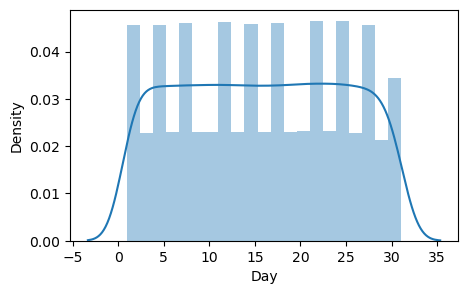

In [13]:
plt.figure(figsize=(5,3))
sns.distplot(data["Day"])
plt.show()

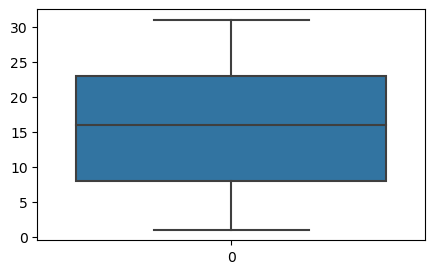

In [14]:
plt.figure(figsize=(5,3))
sns.boxplot(data["Day"])
plt.show()

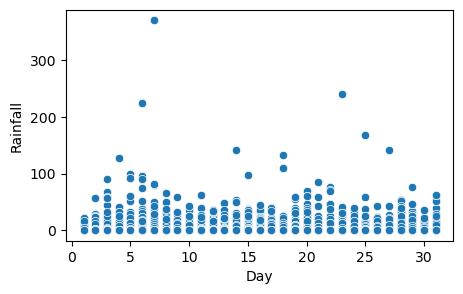

In [15]:
#NO outliers 
plt.figure(figsize=(5,3))
sns.scatterplot(x=data['Day'],y=data['Rainfall'])
plt.show()

<Figure size 500x300 with 0 Axes>

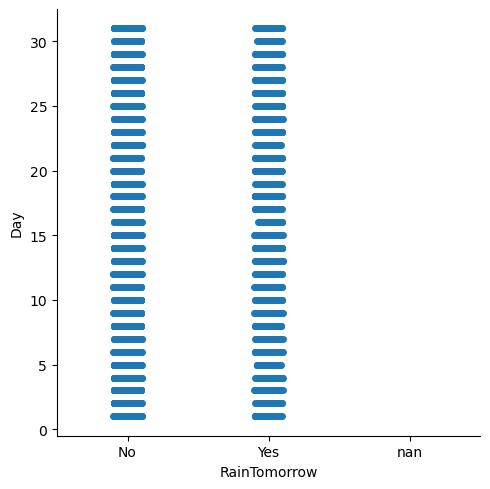

In [16]:
plt.figure(figsize=(5,3))
sns.catplot(x=data['RainTomorrow'],y=data['Day'])
plt.show()

In [31]:
#Not so significant relation can be seen with both the labels

In [17]:
data['Month'].value_counts()

Month
6     818
5     801
3     761
1     753
12    741
7     732
8     682
10    655
11    653
2     620
9     609
4     600
Name: count, dtype: int64

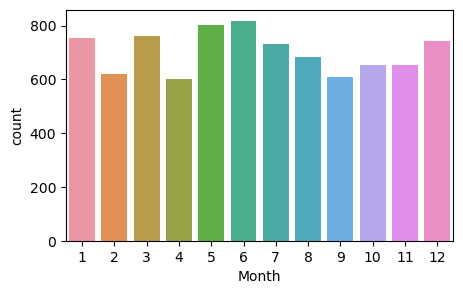

In [18]:
plt.figure(figsize=(5,3))
sns.countplot(x=data['Month'])
plt.show()

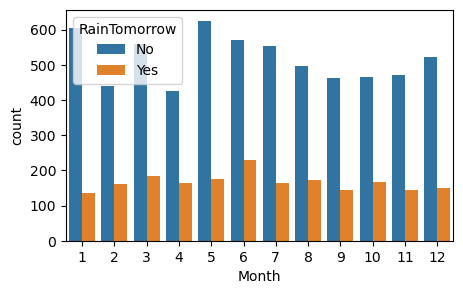

In [19]:
plt.figure(figsize=(5,3))
sns.countplot(x=data['Month'],hue=data['RainTomorrow'])
plt.show()

The month of 5,6 have the most chances of getting the rain as in this season the raindall is at it's peak

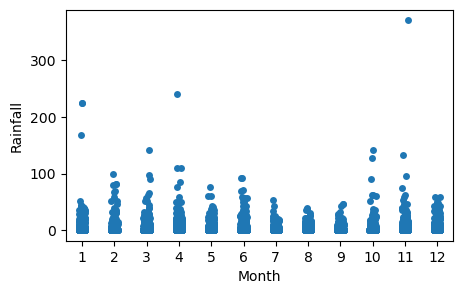

In [20]:
plt.figure(figsize=(5,3))
sns.stripplot(x=data['Month'],y=data['Rainfall'])
plt.show()

In [21]:
data['Year'].value_counts()

Year
2011    1468
2010    1443
2009    1238
2014     959
2012     905
2016     732
2015     653
2013     543
2017     391
2008      93
Name: count, dtype: int64

We could combine the 2008 and 2009 together as 2008 has very less value count but this can disturb the property and lead to information loss which we will not do at all

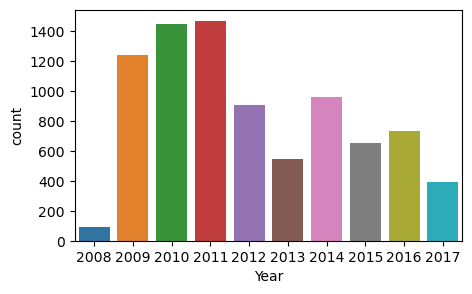

In [22]:
plt.figure(figsize=(5,3))
sns.countplot(x=data['Year'])
plt.show()

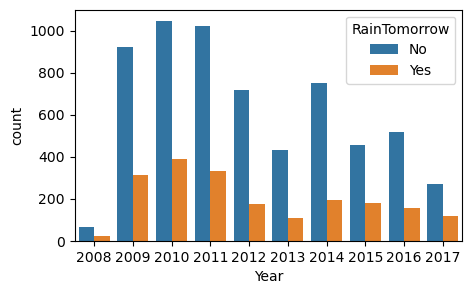

In [23]:
plt.figure(figsize=(5,3))
sns.countplot(x=data['Year'],hue=data['RainTomorrow'])
plt.show()

The year 2009,2010 have the most chances of getting the rain tommorow

<Figure size 500x300 with 0 Axes>

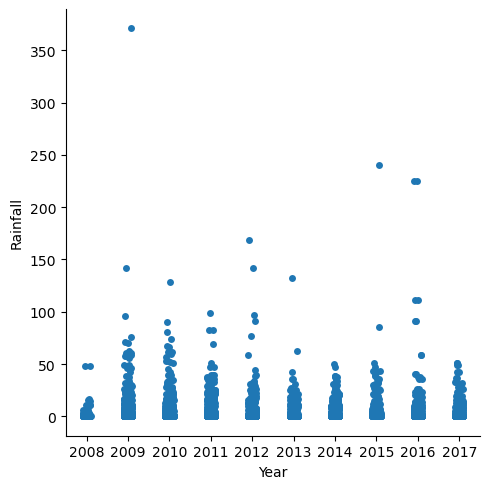

In [24]:
plt.figure(figsize=(5,3))
sns.catplot(x=data['Year'],y=data['Rainfall'])
plt.show()

In [25]:
data.head()

Date Location  MinTemp  MaxTemp  Rainfall  Evaporation  Sunshine  \
0 2008-12-01   Albury     13.4     22.9       0.6          NaN       NaN   
1 2008-12-02   Albury      7.4     25.1       0.0          NaN       NaN   
2 2008-12-03   Albury     12.9     25.7       0.0          NaN       NaN   
3 2008-12-04   Albury      9.2     28.0       0.0          NaN       NaN   
4 2008-12-05   Albury     17.5     32.3       1.0          NaN       NaN   

  WindGustDir  WindGustSpeed WindDir9am WindDir3pm  WindSpeed9am  \
0           W           44.0          W        WNW          20.0   
1         WNW           44.0        NNW        WSW           4.0   
2         WSW           46.0          W        WSW          19.0   
3          NE           24.0         SE          E          11.0   
4           W           41.0        ENE         NW           7.0   

   WindSpeed3pm  Humidity9am  Humidity3pm  Pressure9am  Pressure3pm  Cloud9am  \
0          24.0         71.0         22.0       1007.7       1007.1       8.0   
1          22.0         44.0         25.0       1010.6       1007.8       NaN   
2          26.0         38.0         30.0       1007.6       1008.7       NaN   
3           9.0         45.0         16.0       1017.6       1012.8       NaN   
4          20.0         82.0         33.0       1010.8       1006.0       7.0   

   Cloud3pm  Temp9am  Temp3pm RainToday RainTomorrow  Day  Month  Year  
0       NaN     16.9     21.8        No           No    1     12  2008  
1       NaN     17.2     24.3        No           No    2     12  2008  
2       2.0     21.0     23.2        No           No    3     12  2008  
3       NaN     18.1     26.5        No           No    4     12  2008  
4       8.0     17.8     29.7        No           No    5     12  2008

#Now what we can do it we can delete the date columns as we have extracted all the information from it and now it is of no use at all

In [26]:
data=data.drop(columns='Date')
data.head()

Location  MinTemp  MaxTemp  Rainfall  Evaporation  Sunshine WindGustDir  \
0   Albury     13.4     22.9       0.6          NaN       NaN           W   
1   Albury      7.4     25.1       0.0          NaN       NaN         WNW   
2   Albury     12.9     25.7       0.0          NaN       NaN         WSW   
3   Albury      9.2     28.0       0.0          NaN       NaN          NE   
4   Albury     17.5     32.3       1.0          NaN       NaN           W   

   WindGustSpeed WindDir9am WindDir3pm  WindSpeed9am  WindSpeed3pm  \
0           44.0          W        WNW          20.0          24.0   
1           44.0        NNW        WSW           4.0          22.0   
2           46.0          W        WSW          19.0          26.0   
3           24.0         SE          E          11.0           9.0   
4           41.0        ENE         NW           7.0          20.0   

   Humidity9am  Humidity3pm  Pressure9am  Pressure3pm  Cloud9am  Cloud3pm  \
0         71.0         22.0       1007.7       1007.1       8.0       NaN   
1         44.0         25.0       1010.6       1007.8       NaN       NaN   
2         38.0         30.0       1007.6       1008.7       NaN       2.0   
3         45.0         16.0       1017.6       1012.8       NaN       NaN   
4         82.0         33.0       1010.8       1006.0       7.0       8.0   

   Temp9am  Temp3pm RainToday RainTomorrow  Day  Month  Year  
0     16.9     21.8        No           No    1     12  2008  
1     17.2     24.3        No           No    2     12  2008  
2     21.0     23.2        No           No    3     12  2008  
3     18.1     26.5        No           No    4     12  2008  
4     17.8     29.7        No           No    5     12  2008

In [27]:
#Location
data['Location'].value_counts()

Location
Melbourne       1622
Williamtown     1230
PerthAirport    1204
Albury           907
Newcastle        822
CoffsHarbour     611
Brisbane         579
Penrith          482
Wollongong       474
Darwin           250
Adelaide         205
Uluru             39
Name: count, dtype: int64

In [28]:
data['Location'].isna().sum()

0

In this column the uluru is nearest to the adelade so we will add the uluru to the adelade because uluru has the least value counts

In [29]:
data['Location']=data['Location'].replace('Uluru','Adelaide')
data['Location'].value_counts()

Location
Melbourne       1622
Williamtown     1230
PerthAirport    1204
Albury           907
Newcastle        822
CoffsHarbour     611
Brisbane         579
Penrith          482
Wollongong       474
Darwin           250
Adelaide         244
Name: count, dtype: int64

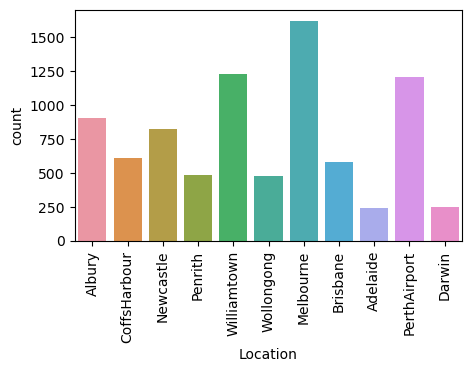

In [30]:
plt.figure(figsize=(5,3))
sns.countplot(x=data['Location'])
plt.xticks(rotation=90)
plt.show()

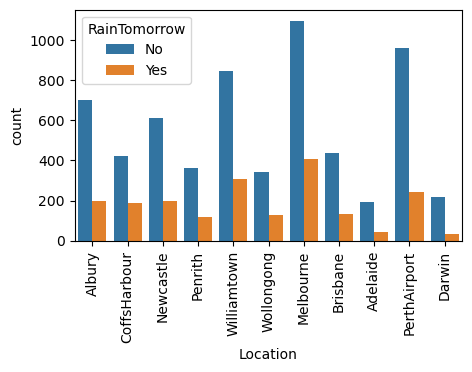

In [31]:
plt.figure(figsize=(5,3))
sns.countplot(x=data['Location'],hue=data['RainTomorrow'])
plt.xticks(rotation=90)
plt.show()

Melbourne has the highest chance of getting the rain

<Figure size 500x300 with 0 Axes>

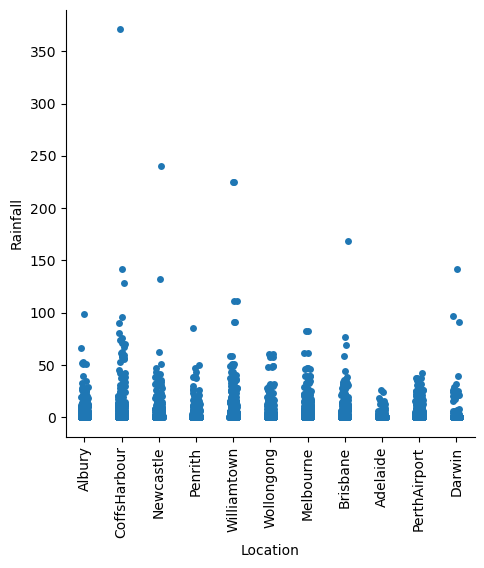

In [32]:
plt.figure(figsize=(5,3))
sns.catplot(x=data['Location'],y=data['Rainfall'])
plt.xticks(rotation=90)
plt.show()

In [33]:
#We have to encode this also
from sklearn.preprocessing import LabelEncoder,OneHotEncoder
one_hot=OneHotEncoder(sparse=False)
lab_enc=LabelEncoder()

In [34]:
data.head()

Location  MinTemp  MaxTemp  Rainfall  Evaporation  Sunshine WindGustDir  \
0   Albury     13.4     22.9       0.6          NaN       NaN           W   
1   Albury      7.4     25.1       0.0          NaN       NaN         WNW   
2   Albury     12.9     25.7       0.0          NaN       NaN         WSW   
3   Albury      9.2     28.0       0.0          NaN       NaN          NE   
4   Albury     17.5     32.3       1.0          NaN       NaN           W   

   WindGustSpeed WindDir9am WindDir3pm  WindSpeed9am  WindSpeed3pm  \
0           44.0          W        WNW          20.0          24.0   
1           44.0        NNW        WSW           4.0          22.0   
2           46.0          W        WSW          19.0          26.0   
3           24.0         SE          E          11.0           9.0   
4           41.0        ENE         NW           7.0          20.0   

   Humidity9am  Humidity3pm  Pressure9am  Pressure3pm  Cloud9am  Cloud3pm  \
0         71.0         22.0       1007.7       1007.1       8.0       NaN   
1         44.0         25.0       1010.6       1007.8       NaN       NaN   
2         38.0         30.0       1007.6       1008.7       NaN       2.0   
3         45.0         16.0       1017.6       1012.8       NaN       NaN   
4         82.0         33.0       1010.8       1006.0       7.0       8.0   

   Temp9am  Temp3pm RainToday RainTomorrow  Day  Month  Year  
0     16.9     21.8        No           No    1     12  2008  
1     17.2     24.3        No           No    2     12  2008  
2     21.0     23.2        No           No    3     12  2008  
3     18.1     26.5        No           No    4     12  2008  
4     17.8     29.7        No           No    5     12  2008

#We have to make two models here and we will have to encode using the one hot encoder only because there is a regression problem
here also and the linear models perform better here and they are not able to work well with the label encoded columns

In [35]:
a=one_hot.fit_transform(data[['Location']])

In [36]:

a=pd.DataFrame(a,columns=['loc1','loc2','loc3','loc4','loc5','loc6','loc7','loc8','loc9','loc10','loc11'])

In [37]:
data=pd.concat([a,data],axis=1)
data=data.drop(columns='Location')
data

loc1  loc2  loc3  loc4  loc5  loc6  loc7  loc8  loc9  loc10  loc11  \
0      0.0   1.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0    0.0    0.0   
1      0.0   1.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0    0.0    0.0   
2      0.0   1.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0    0.0    0.0   
3      0.0   1.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0    0.0    0.0   
4      0.0   1.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0    0.0    0.0   
...    ...   ...   ...   ...   ...   ...   ...   ...   ...    ...    ...   
8420   1.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0    0.0    0.0   
8421   1.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0    0.0    0.0   
8422   1.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0    0.0    0.0   
8423   1.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0    0.0    0.0   
8424   1.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0    0.0    0.0   

      MinTemp  MaxTemp  Rainfall  Evaporation  Sunshine WindGustDir  \
0        13.4     22.9       0.6          NaN       NaN           W   
1         7.4     25.1       0.0          NaN       NaN         WNW   
2        12.9     25.7       0.0          NaN       NaN         WSW   
3         9.2     28.0       0.0          NaN       NaN          NE   
4        17.5     32.3       1.0          NaN       NaN           W   
...       ...      ...       ...          ...       ...         ...   
8420      2.8     23.4       0.0          NaN       NaN           E   
8421      3.6     25.3       0.0          NaN       NaN         NNW   
8422      5.4     26.9       0.0          NaN       NaN           N   
8423      7.8     27.0       0.0          NaN       NaN          SE   
8424     14.9      NaN       0.0          NaN       NaN         NaN   

      WindGustSpeed WindDir9am WindDir3pm  WindSpeed9am  WindSpeed3pm  \
0              44.0          W        WNW          20.0          24.0   
1              44.0        NNW        WSW           4.0          22.0   
2              46.0          W        WSW          19.0          26.0   
3              24.0         SE          E          11.0           9.0   
4              41.0        ENE         NW           7.0          20.0   
...             ...        ...        ...           ...           ...   
8420           31.0         SE        ENE          13.0          11.0   
8421           22.0         SE          N          13.0           9.0   
8422           37.0         SE        WNW           9.0           9.0   
8423           28.0        SSE          N          13.0           7.0   
8424            NaN        ESE        ESE          17.0          17.0   

      Humidity9am  Humidity3pm  Pressure9am  Pressure3pm  Cloud9am  Cloud3pm  \
0            71.0         22.0       1007.7       1007.1       8.0       NaN   
1            44.0         25.0       1010.6       1007.8       NaN       NaN   
2            38.0         30.0       1007.6       1008.7       NaN       2.0   
3            45.0         16.0       1017.6       1012.8       NaN       NaN   
4            82.0         33.0       1010.8       1006.0       7.0       8.0   
...           ...          ...          ...          ...       ...       ...   
8420         51.0         24.0       1024.6       1020.3       NaN       NaN   
8421         56.0         21.0       1023.5       1019.1       NaN       NaN   
8422         53.0         24.0       1021.0       1016.8       NaN       NaN   
8423         51.0         24.0       1019.4       1016.5       3.0       2.0   
8424         62.0         36.0       1020.2       1017.9       8.0       8.0   

      Temp9am  Temp3pm RainToday RainTomorrow  Day  Month  Year  
0        16.9     21.8        No           No    1     12  2008  
1        17.2     24.3        No           No    2     12  2008  
2        21.0     23.2        No           No    3     12  2008  
3        18.1     26.5        No           No    4     12  2008  
4        17.8     29.7        No           No    5     12  2008  
...   

In [38]:
data['MaxTemp'].value_counts()

MaxTemp
19.0    87
23.8    75
19.8    74
25.0    71
22.0    68
        ..
11.2     1
43.1     1
42.7     1
42.9     1
43.5     1
Name: count, Length: 331, dtype: int64

In [39]:
data['MinTemp'].isna().sum()

75

In [40]:
from sklearn.impute import KNNImputer
knn_imp=KNNImputer(n_neighbors=5)

In [41]:
  data[['MaxTemp','Day','Month']]=   knn_imp.fit_transform(data[['MaxTemp','Day','Month']])

In [42]:
data['MaxTemp'].isna().sum()

0

In [85]:
#We used the knnimpiter and used the day and month as a reference for the knn_imp

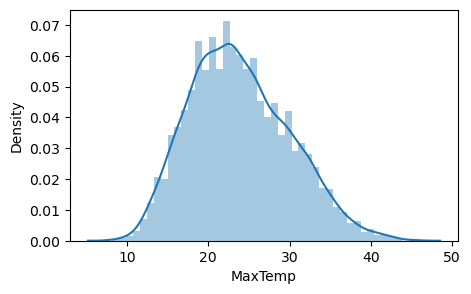

In [43]:
plt.figure(figsize=(5,3))
sns.distplot(data['MaxTemp'])
plt.show()

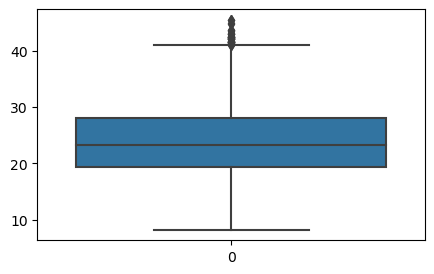

In [44]:
plt.figure(figsize=(5,3))
sns.boxplot(data['MaxTemp'])
plt.show()

In [45]:
#So the maxtemp has outiers with it we will treat this later on
column_outlier=['MaxTemp']

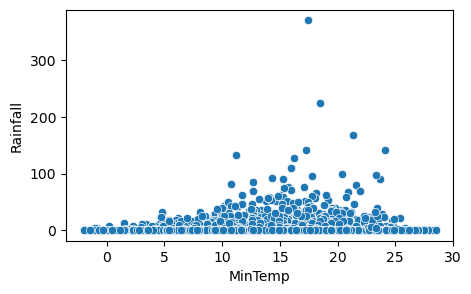

In [46]:
plt.figure(figsize=(5,3))
sns.scatterplot(x=data['MinTemp'],y=data['Rainfall'])
plt.show()

<Figure size 500x300 with 0 Axes>

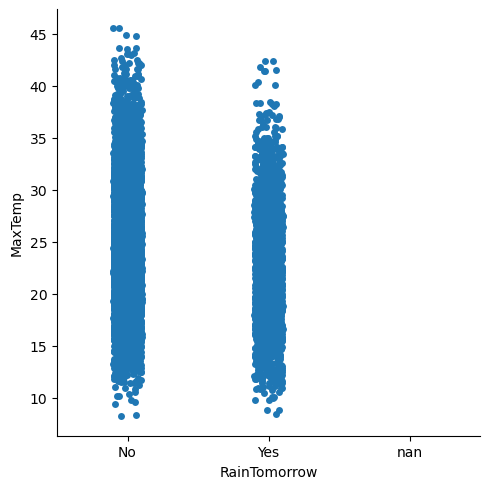

In [47]:
plt.figure(figsize=(5,3))
sns.catplot(x=data['RainTomorrow'],y=data['MaxTemp'])
plt.show()

When the temperature is more than the rainfall chances are low

In [48]:
data['MinTemp'].isna().sum()

75

In [49]:
data[['MaxTemp','Day','Month','MinTemp']]=   knn_imp.fit_transform(data[['MaxTemp','Day','Month','MinTemp']])

In [50]:
data['MinTemp'].isna().sum()

0

In [51]:
data['MinTemp'].value_counts()

MinTemp
12.00    74
13.20    71
13.80    69
12.70    68
14.80    67
         ..
15.92     1
15.28     1
12.56     1
17.74     1
26.00     1
Name: count, Length: 332, dtype: int64

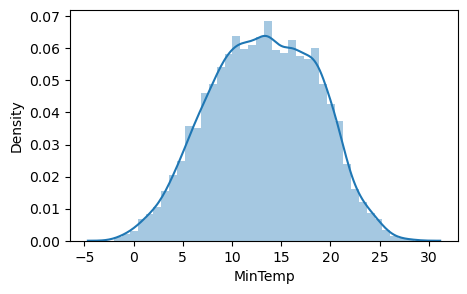

In [52]:
#It is also a continous columns
plt.figure(figsize=(5,3))
sns.distplot(data['MinTemp'])
plt.show()

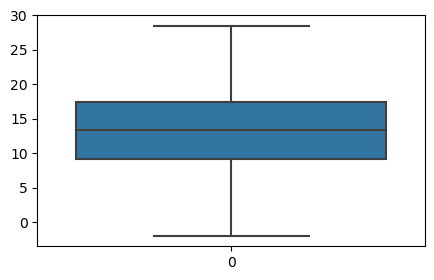

In [53]:
plt.figure(figsize=(5,3))
sns.boxplot(data['MinTemp'])
plt.show()

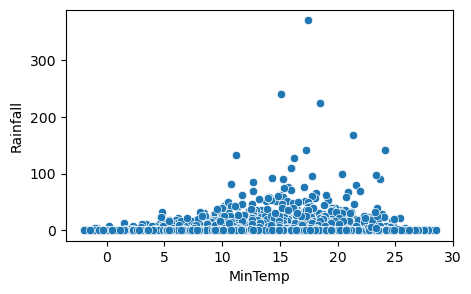

In [54]:
plt.figure(figsize=(5,3))
sns.scatterplot(x=data['MinTemp'],y=data['Rainfall'])
plt.show()

In [55]:
plt.figure(figsize=(5,3))
sns.catplot(x=data['MinTemp'],y=data['RainTomorrow'])
plt.show()

<Figure size 500x300 with 0 Axes>

In [56]:
data.head()

loc1  loc2  loc3  loc4  loc5  loc6  loc7  loc8  loc9  loc10  loc11  \
0   0.0   1.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0    0.0    0.0   
1   0.0   1.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0    0.0    0.0   
2   0.0   1.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0    0.0    0.0   
3   0.0   1.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0    0.0    0.0   
4   0.0   1.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0    0.0    0.0   

   MinTemp  MaxTemp  Rainfall  Evaporation  Sunshine WindGustDir  \
0     13.4     22.9       0.6          NaN       NaN           W   
1      7.4     25.1       0.0          NaN       NaN         WNW   
2     12.9     25.7       0.0          NaN       NaN         WSW   
3      9.2     28.0       0.0          NaN       NaN          NE   
4     17.5     32.3       1.0          NaN       NaN           W   

   WindGustSpeed WindDir9am WindDir3pm  WindSpeed9am  WindSpeed3pm  \
0           44.0          W        WNW          20.0          24.0   
1           44.0        NNW        WSW           4.0          22.0   
2           46.0          W        WSW          19.0          26.0   
3           24.0         SE          E          11.0           9.0   
4           41.0        ENE         NW           7.0          20.0   

   Humidity9am  Humidity3pm  Pressure9am  Pressure3pm  Cloud9am  Cloud3pm  \
0         71.0         22.0       1007.7       1007.1       8.0       NaN   
1         44.0         25.0       1010.6       1007.8       NaN       NaN   
2         38.0         30.0       1007.6       1008.7       NaN       2.0   
3         45.0         16.0       1017.6       1012.8       NaN       NaN   
4         82.0         33.0       1010.8       1006.0       7.0       8.0   

   Temp9am  Temp3pm RainToday RainTomorrow  Day  Month  Year  
0     16.9     21.8        No           No  1.0   12.0  2008  
1     17.2     24.3        No           No  2.0   12.0  2008  
2     21.0     23.2        No           No  3.0   12.0  2008  
3     18.1     26.5        No           No  4.0   12.0  2008  
4     17.8     29.7        No           No  5.0   12.0  2008

In [57]:
data.isna().sum()

loc1                0
loc2                0
loc3                0
loc4                0
loc5                0
loc6                0
loc7                0
loc8                0
loc9                0
loc10               0
loc11               0
MinTemp             0
MaxTemp             0
Rainfall          240
Evaporation      3512
Sunshine         3994
WindGustDir       991
WindGustSpeed     991
WindDir9am        829
WindDir3pm        308
WindSpeed9am       76
WindSpeed3pm      107
Humidity9am        59
Humidity3pm       102
Pressure9am      1309
Pressure3pm      1312
Cloud9am         2421
Cloud3pm         2455
Temp9am            56
Temp3pm            96
RainToday         240
RainTomorrow      239
Day                 0
Month               0
Year                0
dtype: int64

In [58]:
data['Rainfall'].isna().sum()

240

In [59]:
data[['MaxTemp','Day','Month','MinTemp','Rainfall']]=   knn_imp.fit_transform(data[['MaxTemp','Day','Month','MinTemp','Rainfall']])

In [60]:
data['Rainfall'].isna().sum()

0

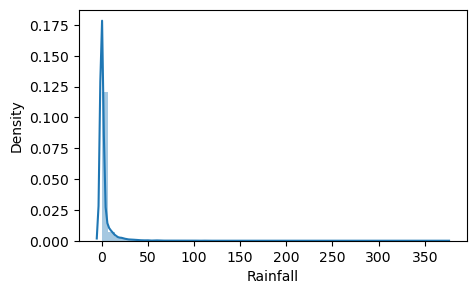

In [61]:
plt.figure(figsize=(5,3))
sns.distplot(data['Rainfall'])
plt.show()

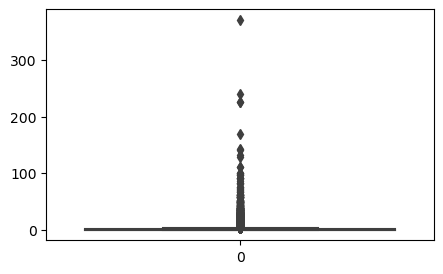

In [62]:
plt.figure(figsize=(5,3))
sns.boxplot(data['Rainfall'])
plt.show()

In [63]:
data.head()

loc1  loc2  loc3  loc4  loc5  loc6  loc7  loc8  loc9  loc10  loc11  \
0   0.0   1.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0    0.0    0.0   
1   0.0   1.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0    0.0    0.0   
2   0.0   1.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0    0.0    0.0   
3   0.0   1.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0    0.0    0.0   
4   0.0   1.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0    0.0    0.0   

   MinTemp  MaxTemp  Rainfall  Evaporation  Sunshine WindGustDir  \
0     13.4     22.9       0.6          NaN       NaN           W   
1      7.4     25.1       0.0          NaN       NaN         WNW   
2     12.9     25.7       0.0          NaN       NaN         WSW   
3      9.2     28.0       0.0          NaN       NaN          NE   
4     17.5     32.3       1.0          NaN       NaN           W   

   WindGustSpeed WindDir9am WindDir3pm  WindSpeed9am  WindSpeed3pm  \
0           44.0          W        WNW          20.0          24.0   
1           44.0        NNW        WSW           4.0          22.0   
2           46.0          W        WSW          19.0          26.0   
3           24.0         SE          E          11.0           9.0   
4           41.0        ENE         NW           7.0          20.0   

   Humidity9am  Humidity3pm  Pressure9am  Pressure3pm  Cloud9am  Cloud3pm  \
0         71.0         22.0       1007.7       1007.1       8.0       NaN   
1         44.0         25.0       1010.6       1007.8       NaN       NaN   
2         38.0         30.0       1007.6       1008.7       NaN       2.0   
3         45.0         16.0       1017.6       1012.8       NaN       NaN   
4         82.0         33.0       1010.8       1006.0       7.0       8.0   

   Temp9am  Temp3pm RainToday RainTomorrow  Day  Month  Year  
0     16.9     21.8        No           No  1.0   12.0  2008  
1     17.2     24.3        No           No  2.0   12.0  2008  
2     21.0     23.2        No           No  3.0   12.0  2008  
3     18.1     26.5        No           No  4.0   12.0  2008  
4     17.8     29.7        No           No  5.0   12.0  2008

In [64]:
data['Rainfall'].isna().sum()

0

In [65]:
data['Rainfall'].value_counts()

Rainfall
0.00     5360
0.20      410
0.40      177
0.60      116
1.20       86
         ... 
42.80       1
76.00       1
6.76        1
0.24        1
40.00       1
Name: count, Length: 315, dtype: int64

In [121]:
#Let us see the distribution of this column which is our one of the label also

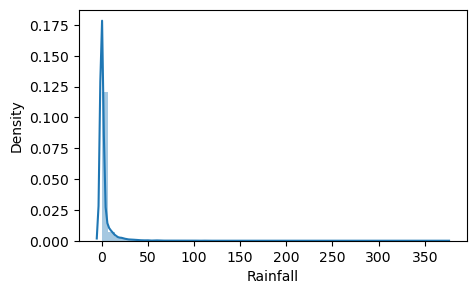

In [66]:
plt.figure(figsize=(5,3))
sns.distplot(data['Rainfall'])
plt.show()

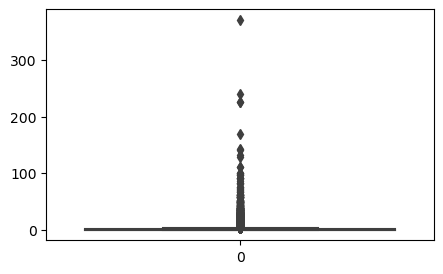

In [67]:
plt.figure(figsize=(5,3))
sns.boxplot(data['Rainfall'])
plt.show()

In [125]:
#A lot of outliers are here 
#Let us see the power transformation of this whether this has outlier or not

In [68]:
from sklearn.preprocessing import PowerTransformer
pt = PowerTransformer(method='yeo-johnson')

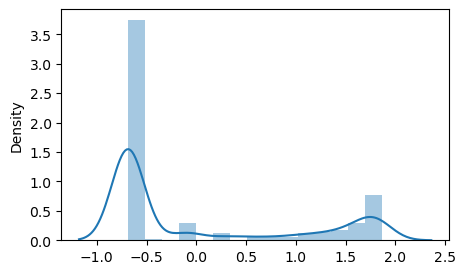

In [69]:
plt.figure(figsize=(5,3))
sns.distplot(pt.fit_transform(data[['Rainfall']]))
plt.show()

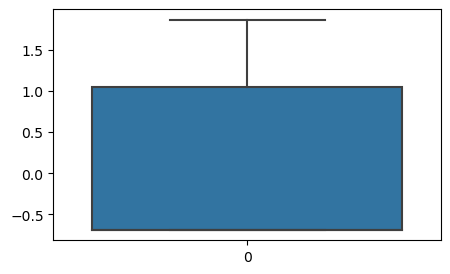

In [70]:
plt.figure(figsize=(5,3))
sns.boxplot(pt.fit_transform(data[['Rainfall']]))
plt.show()

In [71]:
transformed=pt.fit_transform(data[['Rainfall']])
transformed=pd.DataFrame(transformed,columns=['transformed_rainfall'])

<Figure size 500x300 with 0 Axes>

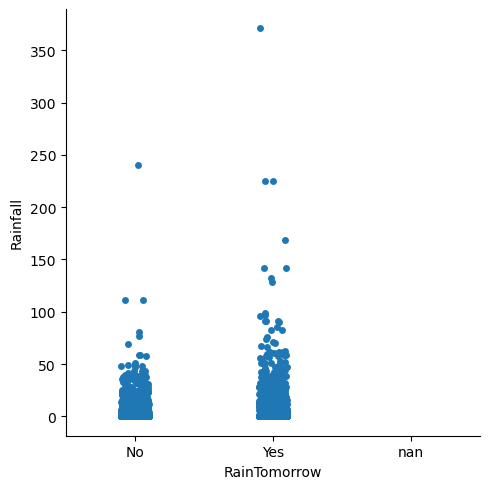

In [72]:
plt.figure(figsize=(5,3))
sns.catplot(x=data['RainTomorrow'],y=data['Rainfall'])
plt.show()

In [73]:
#When the rainfall is heavy than the chances of getting the rain is high
plt.figure(figsize=(5,3))
sns.catplot(x=data['RainTomorrow'],y=transformed['transformed_rainfall'])
plt.show()

<Figure size 500x300 with 0 Axes>

#The relation has drastically changed a lot
#We will use both the columns and see which gives better results
#We can also categorie them on the basis of the amount of rainfall which can be better also

In [74]:
data['Rainfall'].value_counts()

Rainfall
0.00     5360
0.20      410
0.40      177
0.60      116
1.20       86
         ... 
42.80       1
76.00       1
6.76        1
0.24        1
40.00       1
Name: count, Length: 315, dtype: int64

In [75]:
pd.set_option('display.max_rows',None)

In [76]:
data['Rainfall'].value_counts().sort_index()

Rainfall
0.00      5360
0.04         3
0.08         3
0.10        29
0.12         2
0.16         1
0.20       410
0.24         1
0.28         2
0.32         2
0.40       177
0.48         2
0.50         7
0.60       116
0.70         3
0.80        82
0.88         2
1.00        79
1.04         5
1.12         6
1.12         2
1.16         2
1.20        86
1.24         2
1.24         1
1.32         1
1.36         2
1.40        84
1.44         3
1.48         2
1.50         3
1.52         2
1.60        55
1.64         2
1.68         1
1.70         1
1.80        67
1.90         2
1.92         2
1.96         3
2.00        62
2.08         2
2.10         2
2.12         2
2.16         2
2.20        47
2.30         2
2.32         1
2.40        47
2.44         2
2.48         1
2.50         2
2.52         2
2.60        45
2.68         2
2.80        42
2.90         2
3.00        39
3.00         2
3.20        39
3.36         2
3.40        36
3.60        33
3.80        51
3.92         2
3.96         1
4

In [ ]:
#We will categorize it if the model does not gives a good result

In [77]:
data.head()

loc1  loc2  loc3  loc4  loc5  loc6  loc7  loc8  loc9  loc10  loc11  \
0   0.0   1.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0    0.0    0.0   
1   0.0   1.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0    0.0    0.0   
2   0.0   1.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0    0.0    0.0   
3   0.0   1.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0    0.0    0.0   
4   0.0   1.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0    0.0    0.0   

   MinTemp  MaxTemp  Rainfall  Evaporation  Sunshine WindGustDir  \
0     13.4     22.9       0.6          NaN       NaN           W   
1      7.4     25.1       0.0          NaN       NaN         WNW   
2     12.9     25.7       0.0          NaN       NaN         WSW   
3      9.2     28.0       0.0          NaN       NaN          NE   
4     17.5     32.3       1.0          NaN       NaN           W   

   WindGustSpeed WindDir9am WindDir3pm  WindSpeed9am  WindSpeed3pm  \
0           44.0          W        WNW          20.0          24.0   
1           44.0        NNW        WSW           4.0          22.0   
2           46.0          W        WSW          19.0          26.0   
3           24.0         SE          E          11.0           9.0   
4           41.0        ENE         NW           7.0          20.0   

   Humidity9am  Humidity3pm  Pressure9am  Pressure3pm  Cloud9am  Cloud3pm  \
0         71.0         22.0       1007.7       1007.1       8.0       NaN   
1         44.0         25.0       1010.6       1007.8       NaN       NaN   
2         38.0         30.0       1007.6       1008.7       NaN       2.0   
3         45.0         16.0       1017.6       1012.8       NaN       NaN   
4         82.0         33.0       1010.8       1006.0       7.0       8.0   

   Temp9am  Temp3pm RainToday RainTomorrow  Day  Month  Year  
0     16.9     21.8        No           No  1.0   12.0  2008  
1     17.2     24.3        No           No  2.0   12.0  2008  
2     21.0     23.2        No           No  3.0   12.0  2008  
3     18.1     26.5        No           No  4.0   12.0  2008  
4     17.8     29.7        No           No  5.0   12.0  2008

In [78]:
pd.set_option('display.max_rows',10)
data['Evaporation'].value_counts()

Evaporation
4.0     180
3.0     163
2.4     147
2.2     146
2.6     143
       ... 
17.0      1
18.6      1
22.4      1
19.2      1
0.7       1
Name: count, Length: 116, dtype: int64

In [79]:
data['Evaporation'].isna().sum()

3512

In [80]:
#This much null values are here
data[['MaxTemp','Evaporation','Month','MinTemp','Rainfall']]=   knn_imp.fit_transform(data[['MaxTemp','Evaporation','Month','MinTemp','Rainfall']])

In [81]:
data['Evaporation'].isna().sum()

0

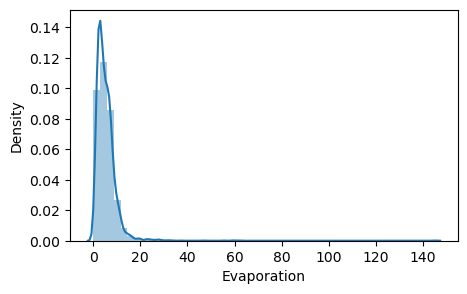

In [82]:
plt.figure(figsize=(5,3))
sns.distplot(data['Evaporation'])
plt.show()

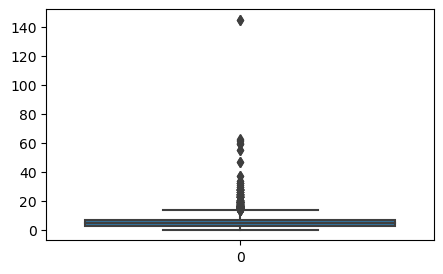

In [83]:
plt.figure(figsize=(5,3))
sns.boxplot(data['Evaporation'])
plt.show()

In [85]:
column_outlier.append('Evaporation')
column_outlier

['MaxTemp', 'Evaporation']

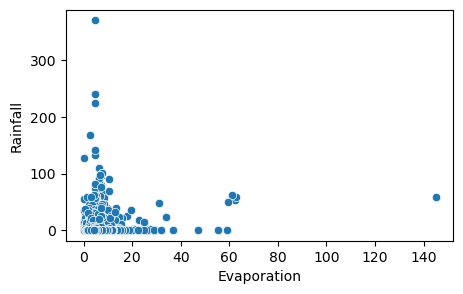

In [86]:
#Outliers are definately there
plt.figure(figsize=(5,3))
sns.scatterplot(x=data['Evaporation'],y=data['Rainfall'])
plt.show()

In [ ]:
#Less evaporation results in more rain

In [87]:
data['Sunshine'].isna().sum()

3994

In [88]:
data[['MaxTemp','Sunshine','Month','MinTemp','Rainfall']]=   knn_imp.fit_transform(data[['MaxTemp','Sunshine','Month','MinTemp','Rainfall']])

In [89]:
data['Sunshine'].isna().sum()

0

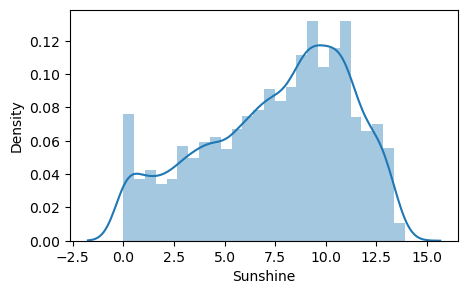

In [90]:
plt.figure(figsize=(5,3))
sns.distplot(data['Sunshine'])
plt.show()

In [91]:
plt.figure(figsize=(5,3))
sns.boxplot(data['Sunshine'])
plt.show()

In [92]:
plt.figure(figsize=(5,3))
sns.scatterplot(x=data['Sunshine'],y=data['Rainfall'])
plt.show()

In [ ]:
#Here is a negative relation wihch is quite expected also

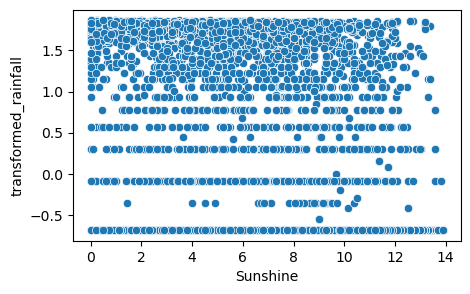

In [93]:
plt.figure(figsize=(5,3))
sns.scatterplot(x=data['Sunshine'],y=transformed['transformed_rainfall'])
plt.show()

#the transformation is indeed destroying the relation which we can definately see here.
That is why we did not changed the label with transformed columns

In [94]:
data['WindGustDir'].isna().sum()

991

In [95]:
data['WindGustDir'].value_counts()

WindGustDir
N      713
SSE    578
S      577
SW     572
E      557
      ... 
NW     383
NE     353
NNE    343
ESE    302
NNW    219
Name: count, Length: 16, dtype: int64

In [96]:
#So this is a categorical columns so no need of the knn inputer it will be filled by the mode
from sklearn.impute import SimpleImputer
si=SimpleImputer(strategy='most_frequent')

In [97]:
data['WindGustDir']=data['WindGustDir'].fillna(value=data['WindGustDir'].mode()[0])

In [98]:
data['WindGustDir'].isna().sum()

0

In [99]:
data['WindGustDir'].value_counts()

WindGustDir
N      1704
SSE     578
S       577
SW      572
E       557
       ... 
NW      383
NE      353
NNE     343
ESE     302
NNW     219
Name: count, Length: 16, dtype: int64

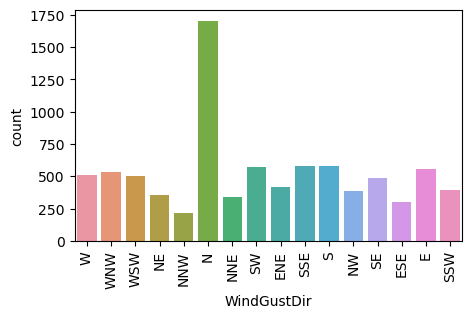

In [100]:
plt.figure(figsize=(5,3))
sns.countplot(x=data['WindGustDir'])
plt.xticks(rotation=90)
plt.show()

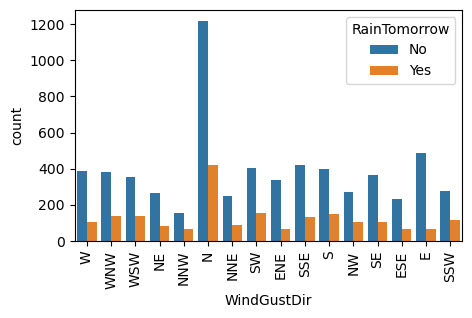

In [101]:
plt.figure(figsize=(5,3))
sns.countplot(x=data['WindGustDir'],hue=data['RainTomorrow'])
plt.xticks(rotation=90)
plt.show()

<Figure size 500x300 with 0 Axes>

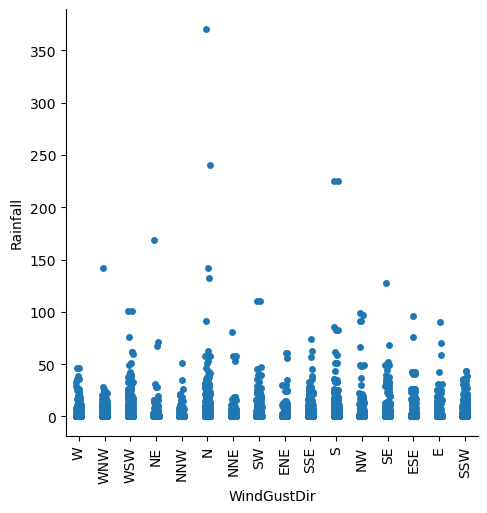

In [102]:
plt.figure(figsize=(5,3))
sns.catplot(x=data['WindGustDir'],y=data['Rainfall'])
plt.xticks(rotation=90)
plt.show()

In [103]:
a=one_hot.fit_transform(data[['WindGustDir']])
a=pd.DataFrame(a,columns=['wind1','wind2','wind3','wind4','wind5','wind6','wind7','wind8','wind9','wind10','wind11','wind12','wind13','wind14','wind15','wind16'])
data=pd.concat([a,data],axis=1)
data=data.drop(columns='WindGustDir')
data

wind1  wind2  wind3  wind4  wind5  wind6  wind7  wind8  wind9  wind10  \
0       0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0     0.0   
1       0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0     0.0   
2       0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0     0.0   
3       0.0    0.0    0.0    0.0    1.0    0.0    0.0    0.0    0.0     0.0   
4       0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0     0.0   
...     ...    ...    ...    ...    ...    ...    ...    ...    ...     ...   
8420    1.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0     0.0   
8421    0.0    0.0    0.0    0.0    0.0    0.0    1.0    0.0    0.0     0.0   
8422    0.0    0.0    0.0    1.0    0.0    0.0    0.0    0.0    0.0     0.0   
8423    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0     1.0   
8424    0.0    0.0    0.0    1.0    0.0    0.0    0.0    0.0    0.0     0.0   

      wind11  wind12  wind13  wind14  wind15  wind16  loc1  loc2  loc3  loc4  \
0        0.0     0.0     0.0     1.0     0.0     0.0   0.0   1.0   0.0   0.0   
1        0.0     0.0     0.0     0.0     1.0     0.0   0.0   1.0   0.0   0.0   
2        0.0     0.0     0.0     0.0     0.0     1.0   0.0   1.0   0.0   0.0   
3        0.0     0.0     0.0     0.0     0.0     0.0   0.0   1.0   0.0   0.0   
4        0.0     0.0     0.0     1.0     0.0     0.0   0.0   1.0   0.0   0.0   
...      ...     ...     ...     ...     ...     ...   ...   ...   ...   ...   
8420     0.0     0.0     0.0     0.0     0.0     0.0   1.0   0.0   0.0   0.0   
8421     0.0     0.0     0.0     0.0     0.0     0.0   1.0   0.0   0.0   0.0   
8422     0.0     0.0     0.0     0.0     0.0     0.0   1.0   0.0   0.0   0.0   
8423     0.0     0.0     0.0     0.0     0.0     0.0   1.0   0.0   0.0   0.0   
8424     0.0     0.0     0.0     0.0     0.0     0.0   1.0   0.0   0.0   0.0   

      loc5  loc6  loc7  loc8  loc9  loc10  loc11  MinTemp  MaxTemp  Rainfall  \
0      0.0   0.0   0.0   0.0   0.0    0.0    0.0     13.4    22.90       0.6   
1      0.0   0.0   0.0   0.0   0.0    0.0    0.0      7.4    25.10       0.0   
2      0.0   0.0   0.0   0.0   0.0    0.0    0.0     12.9    25.70       0.0   
3      0.0   0.0   0.0   0.0   0.0    0.0    0.0      9.2    28.00       0.0   
4      0.0   0.0   0.0   0.0   0.0    0.0    0.0     17.5    32.30       1.0   
...    ...   ...   ...   ...   ...    ...    ...      ...      ...       ...   
8420   0.0   0.0   0.0   0.0   0.0    0.0    0.0      2.8    23.40       0.0   
8421   0.0   0.0   0.0   0.0   0.0    0.0    0.0      3.6    25.30       0.0   
8422   0.0   0.0   0.0   0.0   0.0    0.0    0.0      5.4    26.90       0.0   
8423   0.0   0.0   0.0   0.0   0.0    0.0    0.0      7.8    27.00       0.0   
8424   0.0   0.0   0.0   0.0   0.0    0.0    0.0     14.9    16.36       0.0   

      Evaporation  Sunshine  WindGustSpeed WindDir9am WindDir3pm  \
0            6.08     11.64           44.0          W        WNW   
1            6.20     11.70           44.0        NNW        WSW   
2            4.64     10.80           46.0          W        WSW   
3            7.24     12.30           24.0         SE          E   
4           10.00     11.30           41.0        ENE         NW   
...           ...       ...            ...        ...        ...   
8420         2.12      9.18           31.0         SE        ENE   
8421         2.04      9.28           22.0         SE          N   
8422         3.56      8.76           37.0         SE        WNW   
8423         2.96      8.32           28.0        SSE          N   
8424         4.44      0.48            NaN        ESE        ESE   

      WindSpeed9am  WindSpeed3pm  Humidity9am  Humidity3pm  Pressure9am  \
0             20.0          24.0         71.0         22.0       1007.7   
1              4.0          22.0         44.0         25.0       1010.6   
2             19.0          26.0         38.0         30.0       1007.6   
3             11.0

In [104]:
data['WindGustSpeed'].value_counts()

WindGustSpeed
39.0     441
35.0     435
37.0     422
33.0     408
31.0     396
        ... 
87.0       3
7.0        2
102.0      2
100.0      2
107.0      1
Name: count, Length: 52, dtype: int64

<Figure size 500x300 with 0 Axes>

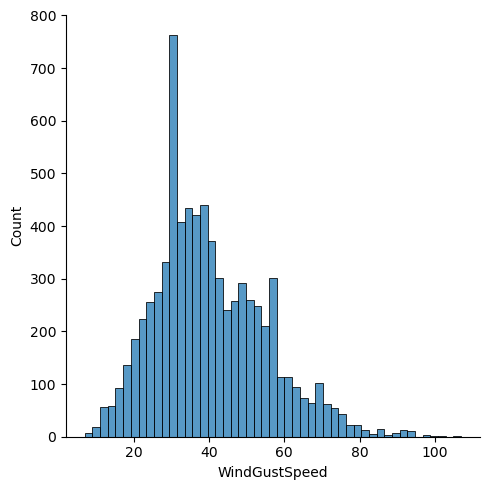

In [105]:
plt.figure(figsize=(5,3))
sns.displot(x=data['WindGustSpeed'])
plt.show()

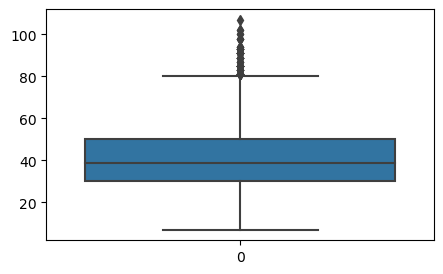

In [106]:
plt.figure(figsize=(5,3))
sns.boxplot(data['WindGustSpeed'])
plt.show()

In [107]:
#It has a few outliers
column_outlier.append('WindGustSpeed')
column_outlier

['MaxTemp', 'Evaporation', 'WindGustSpeed']

In [108]:
plt.figure(figsize=(5,3))
sns.scatterplot(x=data['WindGustSpeed'],y=data['Rainfall'])
plt.show()

In [ ]:
#When the windgustspeed is more than the rainfall seems to be increasing

In [109]:
plt.figure(figsize=(5,3))
sns.catplot(x=data['RainTomorrow'],y=data['WindGustSpeed'])
plt.show()

<Figure size 500x300 with 0 Axes>

In [110]:
data.head()

wind1  wind2  wind3  wind4  wind5  wind6  wind7  wind8  wind9  wind10  \
0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0     0.0   
1    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0     0.0   
2    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0     0.0   
3    0.0    0.0    0.0    0.0    1.0    0.0    0.0    0.0    0.0     0.0   
4    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0     0.0   

   wind11  wind12  wind13  wind14  wind15  wind16  loc1  loc2  loc3  loc4  \
0     0.0     0.0     0.0     1.0     0.0     0.0   0.0   1.0   0.0   0.0   
1     0.0     0.0     0.0     0.0     1.0     0.0   0.0   1.0   0.0   0.0   
2     0.0     0.0     0.0     0.0     0.0     1.0   0.0   1.0   0.0   0.0   
3     0.0     0.0     0.0     0.0     0.0     0.0   0.0   1.0   0.0   0.0   
4     0.0     0.0     0.0     1.0     0.0     0.0   0.0   1.0   0.0   0.0   

   loc5  loc6  loc7  loc8  loc9  loc10  loc11  MinTemp  MaxTemp  Rainfall  \
0   0.0   0.0   0.0   0.0   0.0    0.0    0.0     13.4     22.9       0.6   
1   0.0   0.0   0.0   0.0   0.0    0.0    0.0      7.4     25.1       0.0   
2   0.0   0.0   0.0   0.0   0.0    0.0    0.0     12.9     25.7       0.0   
3   0.0   0.0   0.0   0.0   0.0    0.0    0.0      9.2     28.0       0.0   
4   0.0   0.0   0.0   0.0   0.0    0.0    0.0     17.5     32.3       1.0   

   Evaporation  Sunshine  WindGustSpeed WindDir9am WindDir3pm  WindSpeed9am  \
0         6.08     11.64           44.0          W        WNW          20.0   
1         6.20     11.70           44.0        NNW        WSW           4.0   
2         4.64     10.80           46.0          W        WSW          19.0   
3         7.24     12.30           24.0         SE          E          11.0   
4        10.00     11.30           41.0        ENE         NW           7.0   

   WindSpeed3pm  Humidity9am  Humidity3pm  Pressure9am  Pressure3pm  Cloud9am  \
0          24.0         71.0         22.0       1007.7       1007.1       8.0   
1          22.0         44.0         25.0       1010.6       1007.8       NaN   
2          26.0         38.0         30.0       1007.6       1008.7       NaN   
3           9.0         45.0         16.0       1017.6       1012.8       NaN   
4          20.0         82.0         33.0       1010.8       1006.0       7.0   

   Cloud3pm  Temp9am  Temp3pm RainToday RainTomorrow  Day  Month  Year  
0       NaN     16.9     21.8        No           No  1.0   12.0  2008  
1       NaN     17.2     24.3        No           No  2.0   12.0  2008  
2       2.0     21.0     23.2        No           No  3.0   12.0  2008  
3       NaN     18.1     26.5        No           No  4.0   12.0  2008  
4       8.0     17.8     29.7        No           No  5.0   12.0  2008

In [111]:
data.isna().sum()

wind1             0
wind2             0
wind3             0
wind4             0
wind5             0
               ... 
RainToday       240
RainTomorrow    239
Day               0
Month             0
Year              0
Length: 50, dtype: int64

In [112]:
pd.set_option('display.max_rows',50)

In [113]:
data.isna().sum()

wind1               0
wind2               0
wind3               0
wind4               0
wind5               0
wind6               0
wind7               0
wind8               0
wind9               0
wind10              0
wind11              0
wind12              0
wind13              0
wind14              0
wind15              0
wind16              0
loc1                0
loc2                0
loc3                0
loc4                0
loc5                0
loc6                0
loc7                0
loc8                0
loc9                0
loc10               0
loc11               0
MinTemp             0
MaxTemp             0
Rainfall            0
Evaporation         0
Sunshine            0
WindGustSpeed     991
WindDir9am        829
WindDir3pm        308
WindSpeed9am       76
WindSpeed3pm      107
Humidity9am        59
Humidity3pm       102
Pressure9am      1309
Pressure3pm      1312
Cloud9am         2421
Cloud3pm         2455
Temp9am            56
Temp3pm            96
RainToday 

In [114]:
data.head()

wind1  wind2  wind3  wind4  wind5  wind6  wind7  wind8  wind9  wind10  \
0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0     0.0   
1    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0     0.0   
2    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0     0.0   
3    0.0    0.0    0.0    0.0    1.0    0.0    0.0    0.0    0.0     0.0   
4    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0     0.0   

   wind11  wind12  wind13  wind14  wind15  wind16  loc1  loc2  loc3  loc4  \
0     0.0     0.0     0.0     1.0     0.0     0.0   0.0   1.0   0.0   0.0   
1     0.0     0.0     0.0     0.0     1.0     0.0   0.0   1.0   0.0   0.0   
2     0.0     0.0     0.0     0.0     0.0     1.0   0.0   1.0   0.0   0.0   
3     0.0     0.0     0.0     0.0     0.0     0.0   0.0   1.0   0.0   0.0   
4     0.0     0.0     0.0     1.0     0.0     0.0   0.0   1.0   0.0   0.0   

   loc5  loc6  loc7  loc8  loc9  loc10  loc11  MinTemp  MaxTemp  Rainfall  \
0   0.0   0.0   0.0   0.0   0.0    0.0    0.0     13.4     22.9       0.6   
1   0.0   0.0   0.0   0.0   0.0    0.0    0.0      7.4     25.1       0.0   
2   0.0   0.0   0.0   0.0   0.0    0.0    0.0     12.9     25.7       0.0   
3   0.0   0.0   0.0   0.0   0.0    0.0    0.0      9.2     28.0       0.0   
4   0.0   0.0   0.0   0.0   0.0    0.0    0.0     17.5     32.3       1.0   

   Evaporation  Sunshine  WindGustSpeed WindDir9am WindDir3pm  WindSpeed9am  \
0         6.08     11.64           44.0          W        WNW          20.0   
1         6.20     11.70           44.0        NNW        WSW           4.0   
2         4.64     10.80           46.0          W        WSW          19.0   
3         7.24     12.30           24.0         SE          E          11.0   
4        10.00     11.30           41.0        ENE         NW           7.0   

   WindSpeed3pm  Humidity9am  Humidity3pm  Pressure9am  Pressure3pm  Cloud9am  \
0          24.0         71.0         22.0       1007.7       1007.1       8.0   
1          22.0         44.0         25.0       1010.6       1007.8       NaN   
2          26.0         38.0         30.0       1007.6       1008.7       NaN   
3           9.0         45.0         16.0       1017.6       1012.8       NaN   
4          20.0         82.0         33.0       1010.8       1006.0       7.0   

   Cloud3pm  Temp9am  Temp3pm RainToday RainTomorrow  Day  Month  Year  
0       NaN     16.9     21.8        No           No  1.0   12.0  2008  
1       NaN     17.2     24.3        No           No  2.0   12.0  2008  
2       2.0     21.0     23.2        No           No  3.0   12.0  2008  
3       NaN     18.1     26.5        No           No  4.0   12.0  2008  
4       8.0     17.8     29.7        No           No  5.0   12.0  2008

In [115]:
data['WindGustSpeed'].isna().sum()

991

In [116]:
data['WindGustSpeed'].value_counts()

WindGustSpeed
39.0     441
35.0     435
37.0     422
33.0     408
31.0     396
        ... 
87.0       3
7.0        2
102.0      2
100.0      2
107.0      1
Name: count, Length: 52, dtype: int64

In [117]:
data[['MaxTemp','WindGustSpeed','Month','MinTemp','Rainfall']]=   knn_imp.fit_transform(data[['MaxTemp','WindGustSpeed','Month','MinTemp','Rainfall']])

In [118]:
data['WindGustSpeed'].isna().sum()

0

In [119]:
plt.figure(figsize=(5,3))
sns.distplot(data['WindGustSpeed'])
plt.show()

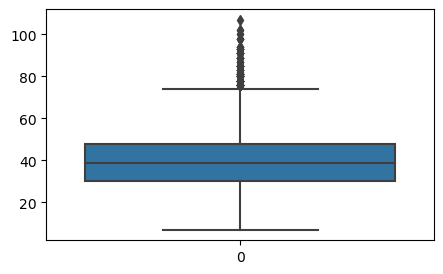

In [120]:
plt.figure(figsize=(5,3))
sns.boxplot(data['WindGustSpeed'])
plt.show()

In [122]:
column_outlier.append('WindGustSpeed')
column_outlier

['MaxTemp', 'Evaporation', 'WindGustSpeed', 'WindGustSpeed']

In [200]:
#There are definately outliers

In [121]:
data.isna().sum()

wind1               0
wind2               0
wind3               0
wind4               0
wind5               0
wind6               0
wind7               0
wind8               0
wind9               0
wind10              0
wind11              0
wind12              0
wind13              0
wind14              0
wind15              0
wind16              0
loc1                0
loc2                0
loc3                0
loc4                0
loc5                0
loc6                0
loc7                0
loc8                0
loc9                0
loc10               0
loc11               0
MinTemp             0
MaxTemp             0
Rainfall            0
Evaporation         0
Sunshine            0
WindGustSpeed       0
WindDir9am        829
WindDir3pm        308
WindSpeed9am       76
WindSpeed3pm      107
Humidity9am        59
Humidity3pm       102
Pressure9am      1309
Pressure3pm      1312
Cloud9am         2421
Cloud3pm         2455
Temp9am            56
Temp3pm            96
RainToday 

In [123]:
data['WindDir9am'].isna().sum()

829

In [124]:
data['WindDir9am'].value_counts()

WindDir9am
N      906
SW     704
NW     625
WSW    543
SE     505
WNW    480
SSW    467
ENE    433
NNE    430
W      414
NE     409
S      402
E      380
SSE    365
NNW    280
ESE    253
Name: count, dtype: int64

In [125]:
#This is a a categorical columns and needs to be encoded using the mode
data['WindDir9am']=data['WindDir9am'].fillna(value=data['WindDir9am'].mode()[0])

In [126]:
data['WindDir9am'].isna().sum()

0

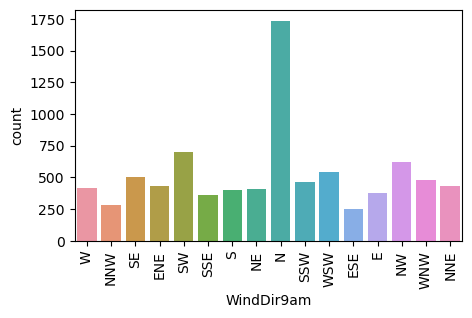

In [127]:
plt.figure(figsize=(5,3))
sns.countplot(x=data['WindDir9am'])
plt.xticks(rotation=90)
plt.show()

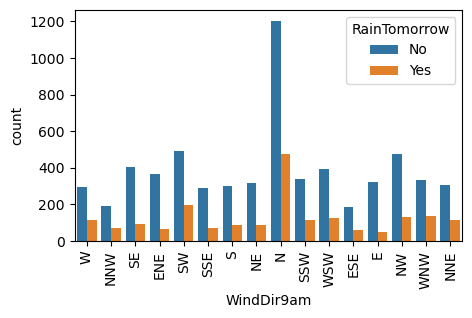

In [128]:
plt.figure(figsize=(5,3))
sns.countplot(x=data['WindDir9am'],hue=data['RainTomorrow'])
plt.xticks(rotation=90)
plt.show()

When the wind direction is towards the north than the chances of the rain is the highest

In [129]:
plt.figure(figsize=(5,3))
sns.catplot(x=data['WindDir9am'],y=data['Rainfall'])
plt.xticks(rotation=90)
plt.show()

<Figure size 500x300 with 0 Axes>

<Figure size 500x300 with 0 Axes>

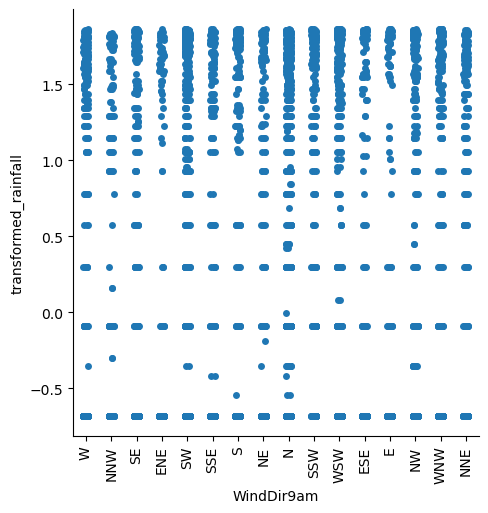

In [130]:
plt.figure(figsize=(5,3))
sns.catplot(x=data['WindDir9am'],y=transformed['transformed_rainfall'])
plt.xticks(rotation=90)
plt.show()

In [131]:
a=one_hot.fit_transform(data[['WindDir9am']])
a=pd.DataFrame(a,columns=['wind1','wind2','wind3','wind4','wind5','wind6','wind7','wind8','wind9','wind10','wind11','wind12','wind13','wind14','wind15','wind16'])
data=pd.concat([a,data],axis=1)
data=data.drop(columns='WindDir9am')
data

wind1  wind2  wind3  wind4  wind5  wind6  wind7  wind8  wind9  wind10  \
0       0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0     0.0   
1       0.0    0.0    0.0    0.0    0.0    0.0    1.0    0.0    0.0     0.0   
2       0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0     0.0   
3       0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0     1.0   
4       0.0    1.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0     0.0   
...     ...    ...    ...    ...    ...    ...    ...    ...    ...     ...   
8420    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0     1.0   
8421    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0     1.0   
8422    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0     1.0   
8423    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0     0.0   
8424    0.0    0.0    1.0    0.0    0.0    0.0    0.0    0.0    0.0     0.0   

      wind11  wind12  wind13  wind14  wind15  wind16  wind1  wind2  wind3  \
0        0.0     0.0     0.0     1.0     0.0     0.0    0.0    0.0    0.0   
1        0.0     0.0     0.0     0.0     0.0     0.0    0.0    0.0    0.0   
2        0.0     0.0     0.0     1.0     0.0     0.0    0.0    0.0    0.0   
3        0.0     0.0     0.0     0.0     0.0     0.0    0.0    0.0    0.0   
4        0.0     0.0     0.0     0.0     0.0     0.0    0.0    0.0    0.0   
...      ...     ...     ...     ...     ...     ...    ...    ...    ...   
8420     0.0     0.0     0.0     0.0     0.0     0.0    1.0    0.0    0.0   
8421     0.0     0.0     0.0     0.0     0.0     0.0    0.0    0.0    0.0   
8422     0.0     0.0     0.0     0.0     0.0     0.0    0.0    0.0    0.0   
8423     1.0     0.0     0.0     0.0     0.0     0.0    0.0    0.0    0.0   
8424     0.0     0.0     0.0     0.0     0.0     0.0    0.0    0.0    0.0   

      wind4  wind5  wind6  wind7  wind8  wind9  wind10  wind11  wind12  \
0       0.0    0.0    0.0    0.0    0.0    0.0     0.0     0.0     0.0   
1       0.0    0.0    0.0    0.0    0.0    0.0     0.0     0.0     0.0   
2       0.0    0.0    0.0    0.0    0.0    0.0     0.0     0.0     0.0   
3       0.0    1.0    0.0    0.0    0.0    0.0     0.0     0.0     0.0   
4       0.0    0.0    0.0    0.0    0.0    0.0     0.0     0.0     0.0   
...     ...    ...    ...    ...    ...    ...     ...     ...     ...   
8420    0.0    0.0    0.0    0.0    0.0    0.0     0.0     0.0     0.0   
8421    0.0    0.0    0.0    1.0    0.0    0.0     0.0     0.0     0.0   
8422    1.0    0.0    0.0    0.0    0.0    0.0     0.0     0.0     0.0   
8423    0.0    0.0    0.0    0.0    0.0    0.0     1.0     0.0     0.0   
8424    1.0    0.0    0.0    0.0    0.0    0.0     0.0     0.0     0.0   

      wind13  wind14  wind15  wind16  loc1  loc2  loc3  loc4  loc5  loc6  \
0        0.0     1.0     0.0     0.0   0.0   1.0   0.0   0.0   0.0   0.0   
1        0.0     0.0     1.0     0.0   0.0   1.0   0.0   0.0   0.0   0.0   
2        0.0     0.0     0.0     1.0   0.0   1.0   0.0   0.0   0.0   0.0   
3        0.0     0.0     0.0     0.0   0.0   1.0   0.0   0.0   0.0   0.0   
4        0.0     1.0     0.0     0.0   0.0   1.0   0.0   0.0   0.0   0.0   
...      ...     ...     ...     ...   ...   ...   ...   ...   ...   ...   
8420     0.0     0.0     0.0     0.0   1.0   0.0   0.0   0.0   0.0   0.0   
8421     0.0     0.0     0.0     0.0   1.0   0.0   0.0   0.0   0.0   0.0   
8422     0.0     0.0     0.0     0.0   1.0   0.0   0.0   0.0   0.0   0.0   
8423     0.0     0.0     0.0     0.0   1.0   0.0   0.0   0.0   0.0   0.0   
8424     0.0     0.0     0.0     0.0   1.0   0.0   0.0   0.0   0.0   0.0   

      loc7  loc8  loc9  loc10  loc11  MinTemp  MaxTemp  Rainfall  Evaporation  \
0      0.0   0.0   0.0    0.0    0.0     13.4    22.90       0.6         6.08   
1      0.0   0.0   0.0    0.0    0.0      7.4    25.10       0.0         6.20   
2      0.0   0.0   0.0    0.0    0.0     12.9    25.70       0.0         4.64   
3     

In [132]:
data['WindDir3pm'].isna().sum()

308

In [133]:
data['WindDir3pm'].value_counts()

WindDir3pm
SE     813
S      742
SSE    623
WSW    580
NE     544
N      524
SW     494
WNW    487
NW     468
W      462
ESE    462
E      460
ENE    417
SSW    370
NNE    365
NNW    306
Name: count, dtype: int64

In [134]:
data['WindDir3pm']=data['WindDir3pm'].fillna(value=data['WindDir3pm'].mode()[0])

In [135]:
data['WindDir3pm'].isna().sum()

0

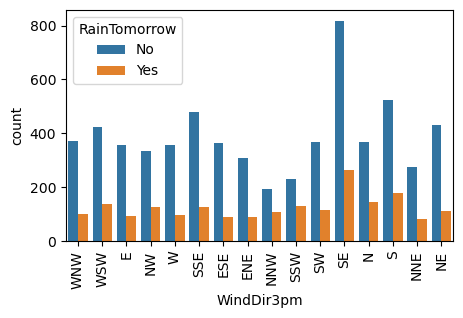

In [136]:
plt.figure(figsize=(5,3))
sns.countplot(x=data['WindDir3pm'],hue=data['RainTomorrow'])
plt.xticks(rotation=90)
plt.show()

When the direction is towards the SE than the chances of having the rain is most.

<Figure size 500x300 with 0 Axes>

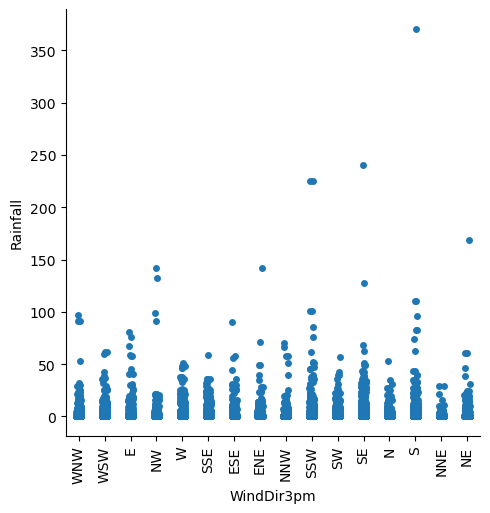

In [137]:
plt.figure(figsize=(5,3))
sns.catplot(x=data['WindDir3pm'],y=data['Rainfall'])
plt.xticks(rotation=90)
plt.show()

In [138]:
#Encoding
a=one_hot.fit_transform(data[['WindDir3pm']])
a=pd.DataFrame(a,columns=['wind1','wind2','wind3','wind4','wind5','wind6','wind7','wind8','wind9','wind10','wind11','wind12','wind13','wind14','wind15','wind16'])
data=pd.concat([a,data],axis=1)
data=data.drop(columns='WindDir3pm')
data

wind1  wind2  wind3  wind4  wind5  wind6  wind7  wind8  wind9  wind10  \
0       0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0     0.0   
1       0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0     0.0   
2       0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0     0.0   
3       1.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0     0.0   
4       0.0    0.0    0.0    0.0    0.0    0.0    0.0    1.0    0.0     0.0   
...     ...    ...    ...    ...    ...    ...    ...    ...    ...     ...   
8420    0.0    1.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0     0.0   
8421    0.0    0.0    0.0    1.0    0.0    0.0    0.0    0.0    0.0     0.0   
8422    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0     0.0   
8423    0.0    0.0    0.0    1.0    0.0    0.0    0.0    0.0    0.0     0.0   
8424    0.0    0.0    1.0    0.0    0.0    0.0    0.0    0.0    0.0     0.0   

      wind11  wind12  wind13  wind14  wind15  wind16  wind1  wind2  wind3  \
0        0.0     0.0     0.0     0.0     1.0     0.0    0.0    0.0    0.0   
1        0.0     0.0     0.0     0.0     0.0     1.0    0.0    0.0    0.0   
2        0.0     0.0     0.0     0.0     0.0     1.0    0.0    0.0    0.0   
3        0.0     0.0     0.0     0.0     0.0     0.0    0.0    0.0    0.0   
4        0.0     0.0     0.0     0.0     0.0     0.0    0.0    1.0    0.0   
...      ...     ...     ...     ...     ...     ...    ...    ...    ...   
8420     0.0     0.0     0.0     0.0     0.0     0.0    0.0    0.0    0.0   
8421     0.0     0.0     0.0     0.0     0.0     0.0    0.0    0.0    0.0   
8422     0.0     0.0     0.0     0.0     1.0     0.0    0.0    0.0    0.0   
8423     0.0     0.0     0.0     0.0     0.0     0.0    0.0    0.0    0.0   
8424     0.0     0.0     0.0     0.0     0.0     0.0    0.0    0.0    1.0   

      wind4  wind5  wind6  wind7  wind8  wind9  wind10  wind11  wind12  \
0       0.0    0.0    0.0    0.0    0.0    0.0     0.0     0.0     0.0   
1       0.0    0.0    0.0    1.0    0.0    0.0     0.0     0.0     0.0   
2       0.0    0.0    0.0    0.0    0.0    0.0     0.0     0.0     0.0   
3       0.0    0.0    0.0    0.0    0.0    0.0     1.0     0.0     0.0   
4       0.0    0.0    0.0    0.0    0.0    0.0     0.0     0.0     0.0   
...     ...    ...    ...    ...    ...    ...     ...     ...     ...   
8420    0.0    0.0    0.0    0.0    0.0    0.0     1.0     0.0     0.0   
8421    0.0    0.0    0.0    0.0    0.0    0.0     1.0     0.0     0.0   
8422    0.0    0.0    0.0    0.0    0.0    0.0     1.0     0.0     0.0   
8423    0.0    0.0    0.0    0.0    0.0    0.0     0.0     1.0     0.0   
8424    0.0    0.0    0.0    0.0    0.0    0.0     0.0     0.0     0.0   

      wind13  wind14  wind15  wind16  wind1  wind2  wind3  wind4  wind5  \
0        0.0     1.0     0.0     0.0    0.0    0.0    0.0    0.0    0.0   
1        0.0     0.0     0.0     0.0    0.0    0.0    0.0    0.0    0.0   
2        0.0     1.0     0.0     0.0    0.0    0.0    0.0    0.0    0.0   
3        0.0     0.0     0.0     0.0    0.0    0.0    0.0    0.0    1.0   
4        0.0     0.0     0.0     0.0    0.0    0.0    0.0    0.0    0.0   
...      ...     ...     ...     ...    ...    ...    ...    ...    ...   
8420     0.0     0.0     0.0     0.0    1.0    0.0    0.0    0.0    0.0   
8421     0.0     0.0     0.0     0.0    0.0    0.0    0.0    0.0    0.0   
8422     0.0     0.0     0.0     0.0    0.0    0.0    0.0    1.0    0.0   
8423     0.0     0.0     0.0     0.0    0.0    0.0    0.0    0.0    0.0   
8424     0.0     0.0     0.0     0.0    0.0    0.0    0.0    1.0    0.0   

      wind6  wind7  wind8  wind9  wind10  wind11  wind12  wind13  wind14  \
0       0.0    0.0    0.0    0.0     0.0     0.0     0.0     0.0     1.0   
1       0.0    0.0    0.0    0.0     0.0     0.0     0.0     0.0     0.0   
2       0.0    0.0    0.0    0.0     0.0     0.0     0.0     0.0     0.0   
3       0.0    0.0    0.0    0.0     0

I know a lot of columns have been formed because of the one hot encoding but now the rest of the columns are continous only. Now none of the column i categorical.

In [139]:
data.head()

wind1  wind2  wind3  wind4  wind5  wind6  wind7  wind8  wind9  wind10  \
0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0     0.0   
1    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0     0.0   
2    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0     0.0   
3    1.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0     0.0   
4    0.0    0.0    0.0    0.0    0.0    0.0    0.0    1.0    0.0     0.0   

   wind11  wind12  wind13  wind14  wind15  wind16  wind1  wind2  wind3  wind4  \
0     0.0     0.0     0.0     0.0     1.0     0.0    0.0    0.0    0.0    0.0   
1     0.0     0.0     0.0     0.0     0.0     1.0    0.0    0.0    0.0    0.0   
2     0.0     0.0     0.0     0.0     0.0     1.0    0.0    0.0    0.0    0.0   
3     0.0     0.0     0.0     0.0     0.0     0.0    0.0    0.0    0.0    0.0   
4     0.0     0.0     0.0     0.0     0.0     0.0    0.0    1.0    0.0    0.0   

   wind5  wind6  wind7  wind8  wind9  wind10  wind11  wind12  wind13  wind14  \
0    0.0    0.0    0.0    0.0    0.0     0.0     0.0     0.0     0.0     1.0   
1    0.0    0.0    1.0    0.0    0.0     0.0     0.0     0.0     0.0     0.0   
2    0.0    0.0    0.0    0.0    0.0     0.0     0.0     0.0     0.0     1.0   
3    0.0    0.0    0.0    0.0    0.0     1.0     0.0     0.0     0.0     0.0   
4    0.0    0.0    0.0    0.0    0.0     0.0     0.0     0.0     0.0     0.0   

   wind15  wind16  wind1  wind2  wind3  wind4  wind5  wind6  wind7  wind8  \
0     0.0     0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0   
1     0.0     0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0   
2     0.0     0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0   
3     0.0     0.0    0.0    0.0    0.0    0.0    1.0    0.0    0.0    0.0   
4     0.0     0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0   

   wind9  wind10  wind11  wind12  wind13  wind14  wind15  wind16  loc1  loc2  \
0    0.0     0.0     0.0     0.0     0.0     1.0     0.0     0.0   0.0   1.0   
1    0.0     0.0     0.0     0.0     0.0     0.0     1.0     0.0   0.0   1.0   
2    0.0     0.0     0.0     0.0     0.0     0.0     0.0     1.0   0.0   1.0   
3    0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0   0.0   1.0   
4    0.0     0.0     0.0     0.0     0.0     1.0     0.0     0.0   0.0   1.0   

   loc3  loc4  loc5  loc6  loc7  loc8  loc9  loc10  loc11  MinTemp  MaxTemp  \
0   0.0   0.0   0.0   0.0   0.0   0.0   0.0    0.0    0.0     13.4     22.9   
1   0.0   0.0   0.0   0.0   0.0   0.0   0.0    0.0    0.0      7.4     25.1   
2   0.0   0.0   0.0   0.0   0.0   0.0   0.0    0.0    0.0     12.9     25.7   
3   0.0   0.0   0.0   0.0   0.0   0.0   0.0    0.0    0.0      9.2     28.0   
4   0.0   0.0   0.0   0.0   0.0   0.0   0.0    0.0    0.0     17.5     32.3   

   Rainfall  Evaporation  Sunshine  WindGustSpeed  WindSpeed9am  WindSpeed3pm  \
0       0.6         6.08     11.64           44.0          20.0          24.0   
1       0.0         6.20     11.70           44.0           4.0          22.0   
2       0.0         4.64     10.80           46.0          19.0          26.0   
3       0.0         7.24     12.30           24.0          11.0           9.0   
4       1.0        10.00     11.30           41.0           7.0          20.0   

   Humidity9am  Humidity3pm  Pressure9am  Pressure3pm  Cloud9am  Cloud3pm  \
0         71.0         22.0       1007.7       1007.1       8.0       NaN   
1         44.0         25.0       1010.6       1007.8       NaN       NaN   
2         38.0         30.0       1007.6       1008.7       NaN       2.0   
3         45.0         16.0       1017.6       1012.8       NaN       NaN   
4         82.0         33.0       1010.8       1006.0       7.0       8.0   

   Temp9am  Temp3pm RainToday RainTomorrow  Day  Month  Year  
0     16.9     21.8        No           No  1.0   12.0  2008  
1     17.2     24.3        No           No  2.0   12.0  2008  
2     21.0     23.2 

In [140]:
data.isna().sum()

wind1             0
wind2             0
wind3             0
wind4             0
wind5             0
               ... 
RainToday       240
RainTomorrow    239
Day               0
Month             0
Year              0
Length: 80, dtype: int64

In [142]:
pd.set_option('display.max_rows',90)

In [144]:
data.head()

wind1  wind2  wind3  wind4  wind5  wind6  wind7  wind8  wind9  wind10  \
0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0     0.0   
1    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0     0.0   
2    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0     0.0   
3    1.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0     0.0   
4    0.0    0.0    0.0    0.0    0.0    0.0    0.0    1.0    0.0     0.0   

   wind11  wind12  wind13  wind14  wind15  wind16  wind1  wind2  wind3  wind4  \
0     0.0     0.0     0.0     0.0     1.0     0.0    0.0    0.0    0.0    0.0   
1     0.0     0.0     0.0     0.0     0.0     1.0    0.0    0.0    0.0    0.0   
2     0.0     0.0     0.0     0.0     0.0     1.0    0.0    0.0    0.0    0.0   
3     0.0     0.0     0.0     0.0     0.0     0.0    0.0    0.0    0.0    0.0   
4     0.0     0.0     0.0     0.0     0.0     0.0    0.0    1.0    0.0    0.0   

   wind5  wind6  wind7  wind8  wind9  wind10  wind11  wind12  wind13  wind14  \
0    0.0    0.0    0.0    0.0    0.0     0.0     0.0     0.0     0.0     1.0   
1    0.0    0.0    1.0    0.0    0.0     0.0     0.0     0.0     0.0     0.0   
2    0.0    0.0    0.0    0.0    0.0     0.0     0.0     0.0     0.0     1.0   
3    0.0    0.0    0.0    0.0    0.0     1.0     0.0     0.0     0.0     0.0   
4    0.0    0.0    0.0    0.0    0.0     0.0     0.0     0.0     0.0     0.0   

   wind15  wind16  wind1  wind2  wind3  wind4  wind5  wind6  wind7  wind8  \
0     0.0     0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0   
1     0.0     0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0   
2     0.0     0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0   
3     0.0     0.0    0.0    0.0    0.0    0.0    1.0    0.0    0.0    0.0   
4     0.0     0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0   

   wind9  wind10  wind11  wind12  wind13  wind14  wind15  wind16  loc1  loc2  \
0    0.0     0.0     0.0     0.0     0.0     1.0     0.0     0.0   0.0   1.0   
1    0.0     0.0     0.0     0.0     0.0     0.0     1.0     0.0   0.0   1.0   
2    0.0     0.0     0.0     0.0     0.0     0.0     0.0     1.0   0.0   1.0   
3    0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0   0.0   1.0   
4    0.0     0.0     0.0     0.0     0.0     1.0     0.0     0.0   0.0   1.0   

   loc3  loc4  loc5  loc6  loc7  loc8  loc9  loc10  loc11  MinTemp  MaxTemp  \
0   0.0   0.0   0.0   0.0   0.0   0.0   0.0    0.0    0.0     13.4     22.9   
1   0.0   0.0   0.0   0.0   0.0   0.0   0.0    0.0    0.0      7.4     25.1   
2   0.0   0.0   0.0   0.0   0.0   0.0   0.0    0.0    0.0     12.9     25.7   
3   0.0   0.0   0.0   0.0   0.0   0.0   0.0    0.0    0.0      9.2     28.0   
4   0.0   0.0   0.0   0.0   0.0   0.0   0.0    0.0    0.0     17.5     32.3   

   Rainfall  Evaporation  Sunshine  WindGustSpeed  WindSpeed9am  WindSpeed3pm  \
0       0.6         6.08     11.64           44.0          20.0          24.0   
1       0.0         6.20     11.70           44.0           4.0          22.0   
2       0.0         4.64     10.80           46.0          19.0          26.0   
3       0.0         7.24     12.30           24.0          11.0           9.0   
4       1.0        10.00     11.30           41.0           7.0          20.0   

   Humidity9am  Humidity3pm  Pressure9am  Pressure3pm  Cloud9am  Cloud3pm  \
0         71.0         22.0       1007.7       1007.1       8.0       NaN   
1         44.0         25.0       1010.6       1007.8       NaN       NaN   
2         38.0         30.0       1007.6       1008.7       NaN       2.0   
3         45.0         16.0       1017.6       1012.8       NaN       NaN   
4         82.0         33.0       1010.8       1006.0       7.0       8.0   

   Temp9am  Temp3pm RainToday RainTomorrow  Day  Month  Year  
0     16.9     21.8        No           No  1.0   12.0  2008  
1     17.2     24.3        No           No  2.0   12.0  2008  
2     21.0     23.2 

In [145]:
data.isna().sum()

wind1               0
wind2               0
wind3               0
wind4               0
wind5               0
wind6               0
wind7               0
wind8               0
wind9               0
wind10              0
wind11              0
wind12              0
wind13              0
wind14              0
wind15              0
wind16              0
wind1               0
wind2               0
wind3               0
wind4               0
wind5               0
wind6               0
wind7               0
wind8               0
wind9               0
wind10              0
wind11              0
wind12              0
wind13              0
wind14              0
wind15              0
wind16              0
wind1               0
wind2               0
wind3               0
wind4               0
wind5               0
wind6               0
wind7               0
wind8               0
wind9               0
wind10              0
wind11              0
wind12              0
wind13              0
wind14    

In [146]:
data['WindSpeed9am'].isna().sum()

76

In [147]:
data['WindSpeed9am'].value_counts()

WindSpeed9am
9.0     803
0.0     752
13.0    708
4.0     610
11.0    607
7.0     572
6.0     515
17.0    481
15.0    467
19.0    430
20.0    427
24.0    312
22.0    279
2.0     258
28.0    229
26.0    208
31.0    153
30.0    114
35.0     77
33.0     70
37.0     58
41.0     49
39.0     35
44.0     29
43.0     28
46.0     26
52.0     16
50.0     10
56.0      8
54.0      6
48.0      6
61.0      2
57.0      2
63.0      2
Name: count, dtype: int64

In [148]:
#Since it is continous columns so knn imputer will be the best to fill the null values here and we use some other columns also
#for the reference purpose for better imputing
data[['MaxTemp','WindSpeed9am','Month','MinTemp','Rainfall']]=   knn_imp.fit_transform(data[['MaxTemp','WindSpeed9am','Month','MinTemp','Rainfall']])

In [149]:
data['WindSpeed9am'].isna().sum()

0

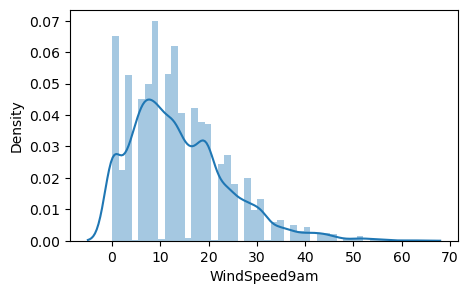

In [151]:
plt.figure(figsize=(5,3))
sns.distplot(data['WindSpeed9am'])
plt.show()

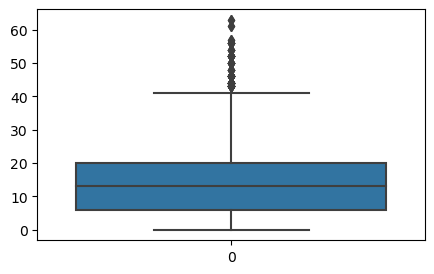

In [152]:
plt.figure(figsize=(5,3))
sns.boxplot(data['WindSpeed9am'])
plt.show()

In [153]:
#Some outliers are definately there
column_outlier.append('WindSpeed9am')
column_outlier

['MaxTemp', 'Evaporation', 'WindGustSpeed', 'WindGustSpeed', 'WindSpeed9am']

In [154]:
plt.figure(figsize=(5,3))
plt.scatter(x=data['WindSpeed9am'],y=data['Rainfall'])
plt.show()

<Figure size 500x300 with 0 Axes>

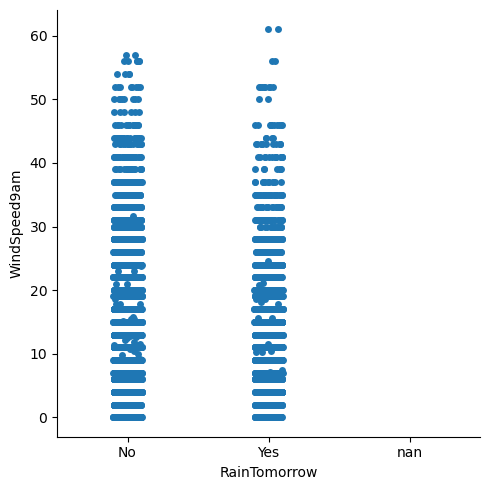

In [156]:
#The rainfall seems to be increasing with the windspeed
plt.figure(figsize=(5,3))
sns.catplot(x=data['RainTomorrow'],y=data['WindSpeed9am'])
plt.show()

In [157]:
plt.figure(figsize=(5,3))
plt.scatter(x=data['WindSpeed9am'],y=transformed['transformed_rainfall'])
plt.show()

#The transformed columns has drastically influenced the relation of the feature column with the label which indeed is not good at all.

In [158]:
data.isna().sum()

wind1               0
wind2               0
wind3               0
wind4               0
wind5               0
wind6               0
wind7               0
wind8               0
wind9               0
wind10              0
wind11              0
wind12              0
wind13              0
wind14              0
wind15              0
wind16              0
wind1               0
wind2               0
wind3               0
wind4               0
wind5               0
wind6               0
wind7               0
wind8               0
wind9               0
wind10              0
wind11              0
wind12              0
wind13              0
wind14              0
wind15              0
wind16              0
wind1               0
wind2               0
wind3               0
wind4               0
wind5               0
wind6               0
wind7               0
wind8               0
wind9               0
wind10              0
wind11              0
wind12              0
wind13              0
wind14    

In [159]:
data['WindSpeed3pm'].isna().sum()

107

In [160]:
data['WindSpeed3pm'].value_counts()

WindSpeed3pm
9.0     724
19.0    639
13.0    599
20.0    594
17.0    555
11.0    534
15.0    524
24.0    511
28.0    458
22.0    457
26.0    378
7.0     331
4.0     287
30.0    279
31.0    266
6.0     240
0.0     199
33.0    170
35.0    137
37.0    125
39.0     80
2.0      58
41.0     45
43.0     34
46.0     29
44.0     18
50.0     12
48.0     11
52.0      9
56.0      7
54.0      2
61.0      2
57.0      2
65.0      1
83.0      1
Name: count, dtype: int64

In [161]:
#Again a continous columns so we will be using the knn imputer for this also
data[['MaxTemp','WindSpeed3pm','Month','MinTemp','Rainfall']]=   knn_imp.fit_transform(data[['MaxTemp','WindSpeed3pm','Month','MinTemp','Rainfall']])

In [162]:
data['WindSpeed3pm'].isna().sum()

0

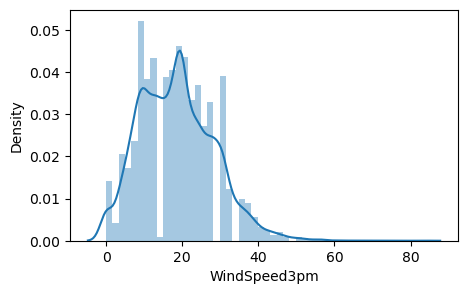

In [163]:
plt.figure(figsize=(5,3))
sns.distplot(data['WindSpeed3pm'])
plt.show()

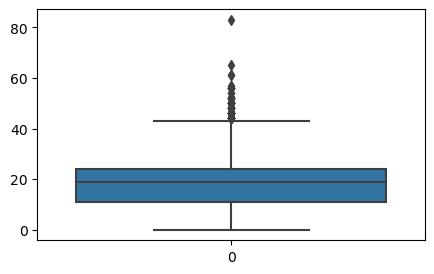

In [164]:
#The data seems to have a normal distribution let us see the boxplot for further details
plt.figure(figsize=(5,3))
sns.boxplot(data['WindSpeed3pm'])
plt.show()

In [165]:
#Some outliers are here
column_outlier.append('WindSpeed3pm')
column_outlier

['MaxTemp',
 'Evaporation',
 'WindGustSpeed',
 'WindGustSpeed',
 'WindSpeed9am',
 'WindSpeed3pm']

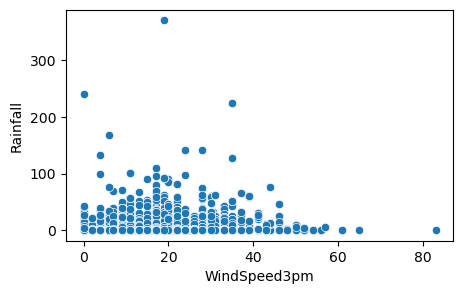

In [166]:
plt.figure(figsize=(5,3))
sns.scatterplot(x=data['WindSpeed3pm'],y=data['Rainfall'])
plt.show()

<Figure size 500x300 with 0 Axes>

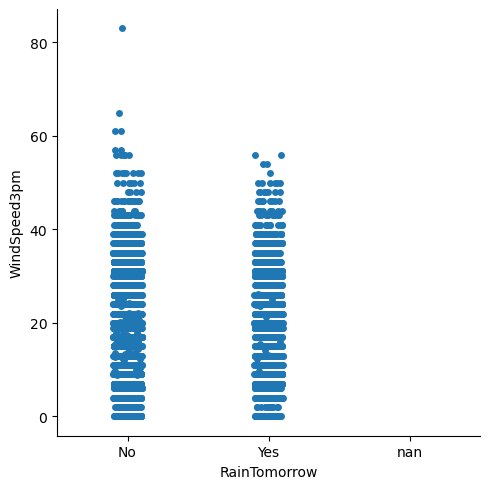

In [170]:
#There is a positive relation between the windspeed and the rainfall
plt.figure(figsize=(5,3))
sns.catplot(x=data['RainTomorrow'],y=data['WindSpeed3pm'])
plt.show()

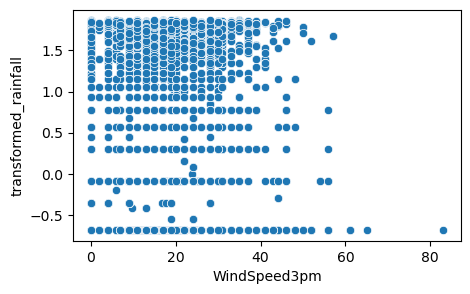

In [171]:
plt.figure(figsize=(5,3))
sns.scatterplot(x=data['WindSpeed3pm'],y=transformed['transformed_rainfall'])
plt.show()

#Regardless of the fact that the transformed column has no outlier and the normal rainfall column is full of outliers the ralation between the columns and the raninfall is much more significant in the default column as compared to the transformed column. That is why we have not added the transformed columns. We will add if the default columns does not gives a good result.

In [172]:
data.isna().sum()

wind1               0
wind2               0
wind3               0
wind4               0
wind5               0
wind6               0
wind7               0
wind8               0
wind9               0
wind10              0
wind11              0
wind12              0
wind13              0
wind14              0
wind15              0
wind16              0
wind1               0
wind2               0
wind3               0
wind4               0
wind5               0
wind6               0
wind7               0
wind8               0
wind9               0
wind10              0
wind11              0
wind12              0
wind13              0
wind14              0
wind15              0
wind16              0
wind1               0
wind2               0
wind3               0
wind4               0
wind5               0
wind6               0
wind7               0
wind8               0
wind9               0
wind10              0
wind11              0
wind12              0
wind13              0
wind14    

In [173]:
data['Humidity9am'].value_counts()

Humidity9am
73.0     205
62.0     202
68.0     199
74.0     195
70.0     188
67.0     188
71.0     187
69.0     187
63.0     185
76.0     184
66.0     183
75.0     182
60.0     182
61.0     178
65.0     177
64.0     176
78.0     169
82.0     168
55.0     158
72.0     153
57.0     153
58.0     151
83.0     145
56.0     138
79.0     137
59.0     136
84.0     136
77.0     135
80.0     134
51.0     129
54.0     128
87.0     126
81.0     125
85.0     124
89.0     123
86.0     120
52.0     116
49.0     108
53.0     108
50.0     106
91.0     106
88.0     104
95.0      97
48.0      97
47.0      96
92.0      96
93.0      90
94.0      89
90.0      88
99.0      86
46.0      85
45.0      84
97.0      82
98.0      82
96.0      78
44.0      76
43.0      71
42.0      67
41.0      60
40.0      50
38.0      47
36.0      43
39.0      40
34.0      34
37.0      34
35.0      33
32.0      27
33.0      22
29.0      22
30.0      21
100.0     20
31.0      16
28.0      16
27.0      12
23.0      11
25.0       9


In [174]:
data[['MaxTemp','Humidity9am','Month','MinTemp','Rainfall']]=   knn_imp.fit_transform(data[['MaxTemp','Humidity9am','Month','MinTemp','Rainfall']])

In [175]:
#Continous column is there that is why we have used the knn imputer for this
data['Humidity9am'].isna().sum()

0

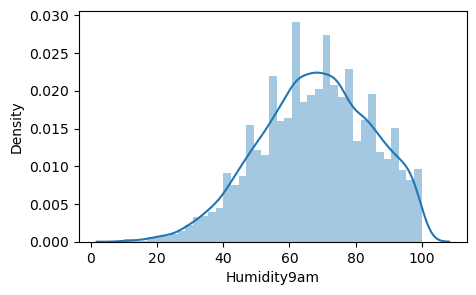

In [187]:
plt.figure(figsize=(5,3))
sns.distplot(data['Humidity9am'])
plt.show()

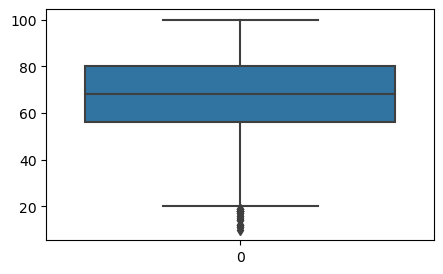

In [177]:
plt.figure(figsize=(5,3))
sns.boxplot(data['Humidity9am'])
plt.show()

In [178]:
#Some outliers 
column_outlier.append('Humidity9am')
column_outlier

['MaxTemp',
 'Evaporation',
 'WindGustSpeed',
 'WindGustSpeed',
 'WindSpeed9am',
 'WindSpeed3pm',
 'Humidity9am']

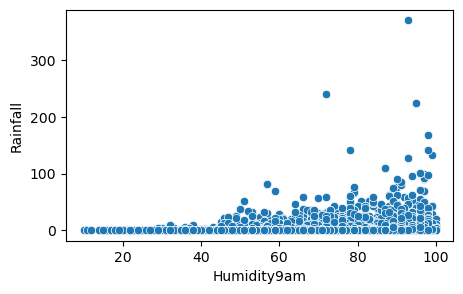

In [179]:
plt.figure(figsize=(5,3))
sns.scatterplot(x=data['Humidity9am'],y=data['Rainfall'])
plt.show()

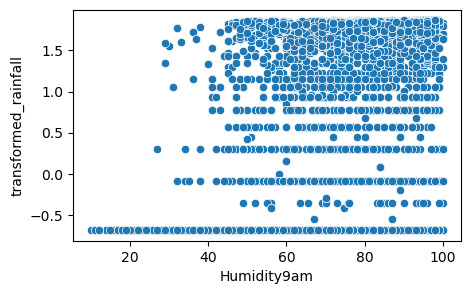

In [180]:
#The rainfall seems to be increasing with the humidity
plt.figure(figsize=(5,3))
sns.scatterplot(x=data['Humidity9am'],y=transformed['transformed_rainfall'])
plt.show()

<Figure size 500x300 with 0 Axes>

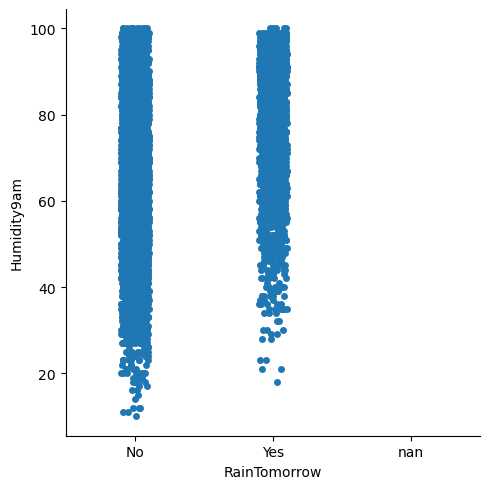

In [181]:
plt.figure(figsize=(5,3))
sns.catplot(x=data['RainTomorrow'],y=data['Humidity9am'])
plt.show()

In [182]:
data.isna().sum()

wind1               0
wind2               0
wind3               0
wind4               0
wind5               0
wind6               0
wind7               0
wind8               0
wind9               0
wind10              0
wind11              0
wind12              0
wind13              0
wind14              0
wind15              0
wind16              0
wind1               0
wind2               0
wind3               0
wind4               0
wind5               0
wind6               0
wind7               0
wind8               0
wind9               0
wind10              0
wind11              0
wind12              0
wind13              0
wind14              0
wind15              0
wind16              0
wind1               0
wind2               0
wind3               0
wind4               0
wind5               0
wind6               0
wind7               0
wind8               0
wind9               0
wind10              0
wind11              0
wind12              0
wind13              0
wind14    

In [183]:
data['Humidity3pm'].isna().sum()

102

In [184]:
data['Humidity3pm'].value_counts()

Humidity3pm
55.0    195
48.0    194
51.0    194
46.0    193
54.0    193
       ... 
8.0      11
7.0       9
98.0      7
99.0      3
6.0       3
Name: count, Length: 94, dtype: int64

In [185]:
#Again continous column and again the knn_imputer will be used
data[['MaxTemp','Humidity3pm','Month','MinTemp','Rainfall']]=   knn_imp.fit_transform(data[['MaxTemp','Humidity3pm','Month','MinTemp','Rainfall']])

In [188]:
data['Humidity3pm'].isna().sum()

0

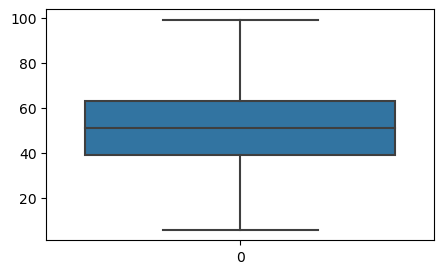

In [189]:
plt.figure(figsize=(5,3))
sns.boxplot(data['Humidity3pm'])
plt.show()

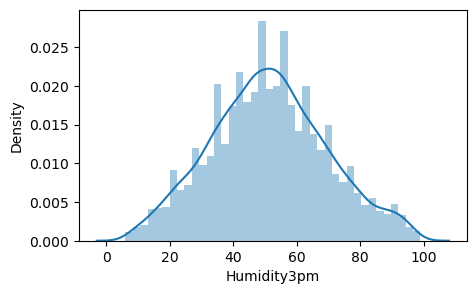

In [190]:
plt.figure(figsize=(5,3))
sns.distplot(data['Humidity3pm'])
plt.show()

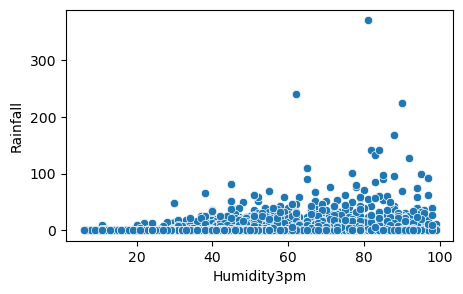

In [191]:
#A perfect normal distribution with no outliers
plt.figure(figsize=(5,3))
sns.scatterplot(x=data['Humidity3pm'],y=data['Rainfall'])
plt.show()

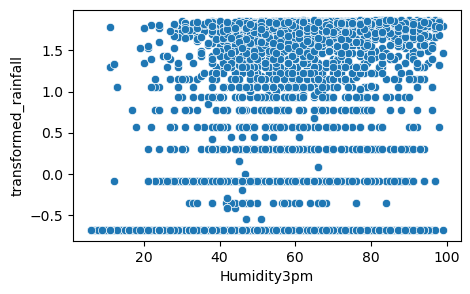

In [192]:
plt.figure(figsize=(5,3))
sns.scatterplot(x=data['Humidity3pm'],y=transformed['transformed_rainfall'])
plt.show()

<Figure size 500x300 with 0 Axes>

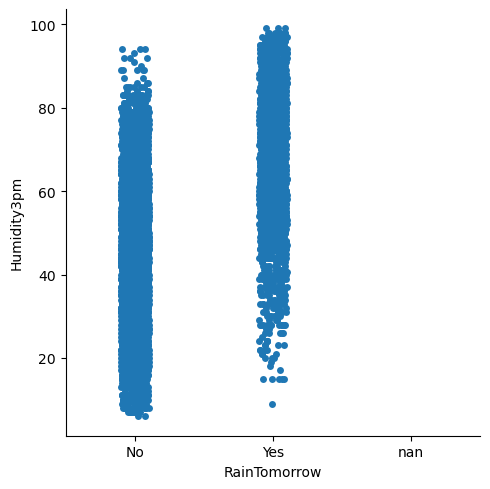

In [193]:
plt.figure(figsize=(5,3))
sns.catplot(x=data['RainTomorrow'],y=data['Humidity3pm'])
plt.show()

In [194]:
data.isna().sum()

wind1               0
wind2               0
wind3               0
wind4               0
wind5               0
wind6               0
wind7               0
wind8               0
wind9               0
wind10              0
wind11              0
wind12              0
wind13              0
wind14              0
wind15              0
wind16              0
wind1               0
wind2               0
wind3               0
wind4               0
wind5               0
wind6               0
wind7               0
wind8               0
wind9               0
wind10              0
wind11              0
wind12              0
wind13              0
wind14              0
wind15              0
wind16              0
wind1               0
wind2               0
wind3               0
wind4               0
wind5               0
wind6               0
wind7               0
wind8               0
wind9               0
wind10              0
wind11              0
wind12              0
wind13              0
wind14    

In [195]:
data['Pressure9am'].value_counts()

Pressure9am
1014.8    58
1019.2    55
1016.1    54
1019.6    53
1020.0    49
          ..
1037.3     1
997.8      1
1036.9     1
1036.3     1
1033.6     1
Name: count, Length: 384, dtype: int64

In [196]:
data[['MaxTemp','Pressure9am','Month','MinTemp','Rainfall']]=   knn_imp.fit_transform(data[['MaxTemp','Pressure9am','Month','MinTemp','Rainfall']])

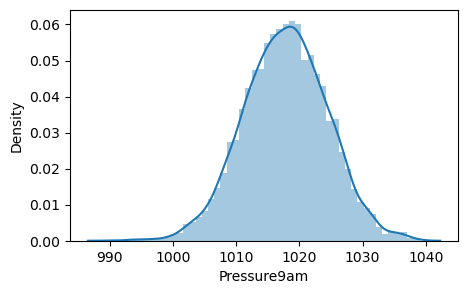

In [197]:
plt.figure(figsize=(5,3))
sns.distplot(data['Pressure9am'])
plt.show()

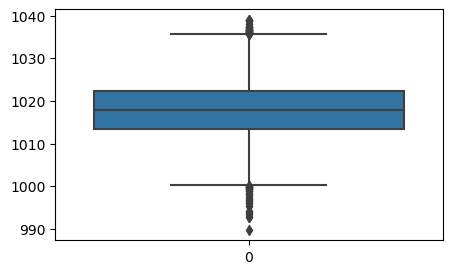

In [198]:
plt.figure(figsize=(5,3))
sns.boxplot(data['Pressure9am'])
plt.show()

In [204]:
column_outlier.append('Pressure9am')
column_outlier

['MaxTemp',
 'Evaporation',
 'WindGustSpeed',
 'WindGustSpeed',
 'WindSpeed9am',
 'WindSpeed3pm',
 'Humidity9am',
 'Pressure9am']

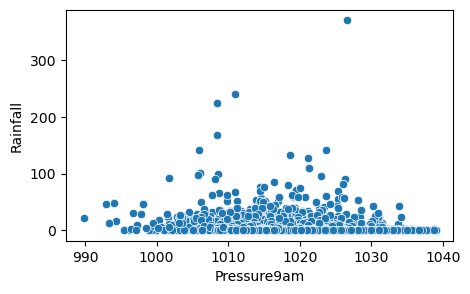

In [199]:
#Outliers are there is the lower and upper side also
plt.figure(figsize=(5,3))
sns.scatterplot(x=data['Pressure9am'],y=data['Rainfall'])
plt.show()

In [200]:
#The rainfall is increasing with pressure
data.isna().sum()

wind1               0
wind2               0
wind3               0
wind4               0
wind5               0
wind6               0
wind7               0
wind8               0
wind9               0
wind10              0
wind11              0
wind12              0
wind13              0
wind14              0
wind15              0
wind16              0
wind1               0
wind2               0
wind3               0
wind4               0
wind5               0
wind6               0
wind7               0
wind8               0
wind9               0
wind10              0
wind11              0
wind12              0
wind13              0
wind14              0
wind15              0
wind16              0
wind1               0
wind2               0
wind3               0
wind4               0
wind5               0
wind6               0
wind7               0
wind8               0
wind9               0
wind10              0
wind11              0
wind12              0
wind13              0
wind14    

In [201]:
data[['MaxTemp','Pressure3pm','Month','MinTemp','Rainfall']]=   knn_imp.fit_transform(data[['MaxTemp','Pressure3pm','Month','MinTemp','Rainfall']])

In [202]:
data['Pressure3pm'].isna().sum()

0

In [203]:
data['Pressure3pm'].value_counts()

Pressure3pm
1017.80    65
1018.00    61
1017.90    55
1017.50    54
1011.10    53
           ..
1016.98     1
1011.02     1
1011.44     1
1016.22     1
1029.50     1
Name: count, Length: 1027, dtype: int64

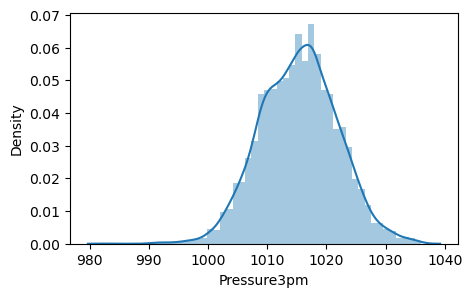

In [205]:
plt.figure(figsize=(5,3))
sns.distplot(data['Pressure3pm'])
plt.show()

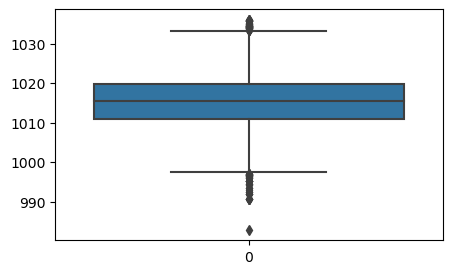

In [206]:
plt.figure(figsize=(5,3))
sns.boxplot(data['Pressure3pm'])
plt.show()

In [207]:
column_outlier.append('Pressure3pm')

In [208]:
column_outlier

['MaxTemp',
 'Evaporation',
 'WindGustSpeed',
 'WindGustSpeed',
 'WindSpeed9am',
 'WindSpeed3pm',
 'Humidity9am',
 'Pressure9am',
 'Pressure3pm']

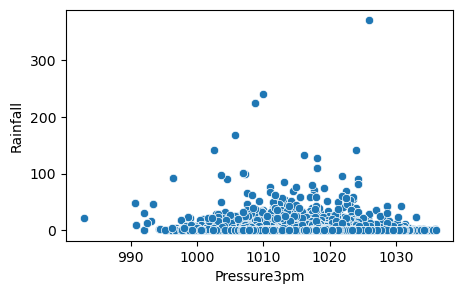

In [209]:
plt.figure(figsize=(5,3))
sns.scatterplot(x=data['Pressure3pm'],y=data['Rainfall'])
plt.show()

#The rainfall seems to be increasing but pressure

In [210]:
data.isna().sum()

wind1               0
wind2               0
wind3               0
wind4               0
wind5               0
wind6               0
wind7               0
wind8               0
wind9               0
wind10              0
wind11              0
wind12              0
wind13              0
wind14              0
wind15              0
wind16              0
wind1               0
wind2               0
wind3               0
wind4               0
wind5               0
wind6               0
wind7               0
wind8               0
wind9               0
wind10              0
wind11              0
wind12              0
wind13              0
wind14              0
wind15              0
wind16              0
wind1               0
wind2               0
wind3               0
wind4               0
wind5               0
wind6               0
wind7               0
wind8               0
wind9               0
wind10              0
wind11              0
wind12              0
wind13              0
wind14    

In [211]:
data['Cloud9am'].value_counts()

Cloud9am
7.0    1418
1.0    1038
8.0    1015
0.0     554
6.0     551
5.0     414
3.0     384
2.0     357
4.0     273
Name: count, dtype: int64

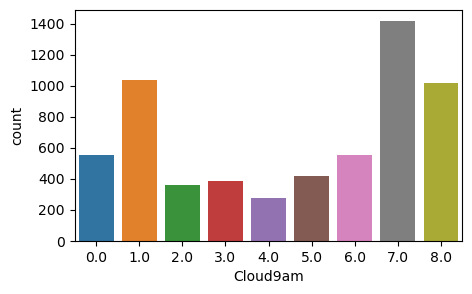

In [212]:
#This is a categorical columns and is already encoded
plt.figure(figsize=(5,3))
sns.countplot(x=data['Cloud9am'])
plt.show()

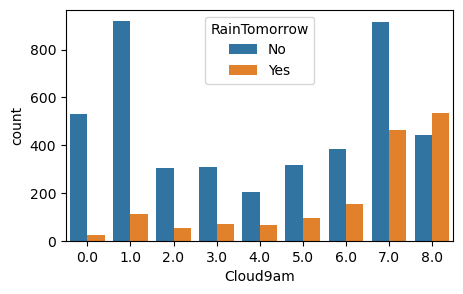

In [213]:
plt.figure(figsize=(5,3))
sns.countplot(x=data['Cloud9am'],hue=data['RainTomorrow'])
plt.show()

When the cloud cover is more than the chances of getting the rain is also high

<Figure size 500x300 with 0 Axes>

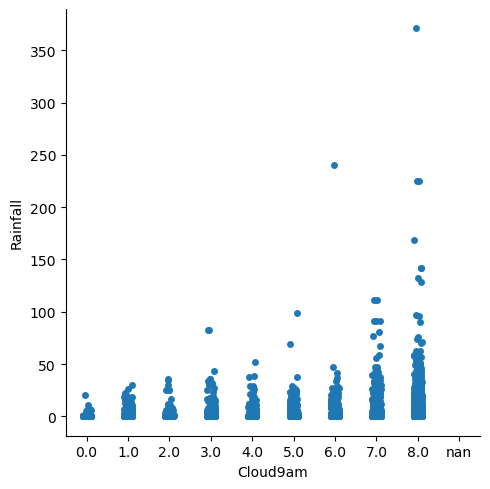

In [214]:
plt.figure(figsize=(5,3))
sns.catplot(x=data['Cloud9am'],y=data['Rainfall'])
plt.show()

In [218]:
data['Cloud9am'].isna().sum()

2421

In [226]:
knn_imp=KNNImputer(n_neighbors=1)

In [227]:
a=knn_imp.fit_transform(data[['MaxTemp','Cloud9am','Month','MinTemp','Rainfall']])
a=pd.DataFrame(a)
a

0    1     2     3    4
0     22.90  8.0  12.0  13.4  0.6
1     25.10  1.0  12.0   7.4  0.0
2     25.70  2.0  12.0  12.9  0.0
3     28.00  0.0  12.0   9.2  0.0
4     32.30  7.0  12.0  17.5  1.0
...     ...  ...   ...   ...  ...
8420  23.40  6.0   6.0   2.8  0.0
8421  25.30  6.0   6.0   3.6  0.0
8422  26.90  7.0   6.0   5.4  0.0
8423  27.00  3.0   6.0   7.8  0.0
8424  16.36  8.0   6.0  14.9  0.0

[8425 rows x 5 columns]

In [228]:
a[1].value_counts()

1
7.0    1934
1.0    1520
8.0    1386
0.0     920
6.0     736
5.0     544
3.0     528
2.0     494
4.0     363
Name: count, dtype: int64

This was a categorical column with over 2k nulls and if we would have used the simple imputer than we would have over sampled one class but with neigbours=1 the knn_imputer filled the nulls in all values

In [229]:
data['Cloud9am']=a[1]

In [230]:
data['Cloud9am'].value_counts()

Cloud9am
7.0    1934
1.0    1520
8.0    1386
0.0     920
6.0     736
5.0     544
3.0     528
2.0     494
4.0     363
Name: count, dtype: int64

In [231]:
#NOw let us encode this using the one hot
a=one_hot.fit_transform(data[['Cloud9am']])
a=pd.DataFrame(a,columns=['cloud1','cloud2','cloud3','cloud4','cloud5','cloud6','cloud7','cloud8','cloud9'])
data=pd.concat([a,data],axis=1)
data=data.drop(columns='Cloud9am')
data

cloud1  cloud2  cloud3  cloud4  cloud5  cloud6  cloud7  cloud8  cloud9  \
0        0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0     1.0   
1        0.0     1.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0   
2        0.0     0.0     1.0     0.0     0.0     0.0     0.0     0.0     0.0   
3        1.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0   
4        0.0     0.0     0.0     0.0     0.0     0.0     0.0     1.0     0.0   
...      ...     ...     ...     ...     ...     ...     ...     ...     ...   
8420     0.0     0.0     0.0     0.0     0.0     0.0     1.0     0.0     0.0   
8421     0.0     0.0     0.0     0.0     0.0     0.0     1.0     0.0     0.0   
8422     0.0     0.0     0.0     0.0     0.0     0.0     0.0     1.0     0.0   
8423     0.0     0.0     0.0     1.0     0.0     0.0     0.0     0.0     0.0   
8424     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0     1.0   

      wind1  wind2  wind3  wind4  wind5  wind6  wind7  wind8  wind9  wind10  \
0       0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0     0.0   
1       0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0     0.0   
2       0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0     0.0   
3       1.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0     0.0   
4       0.0    0.0    0.0    0.0    0.0    0.0    0.0    1.0    0.0     0.0   
...     ...    ...    ...    ...    ...    ...    ...    ...    ...     ...   
8420    0.0    1.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0     0.0   
8421    0.0    0.0    0.0    1.0    0.0    0.0    0.0    0.0    0.0     0.0   
8422    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0     0.0   
8423    0.0    0.0    0.0    1.0    0.0    0.0    0.0    0.0    0.0     0.0   
8424    0.0    0.0    1.0    0.0    0.0    0.0    0.0    0.0    0.0     0.0   

      wind11  wind12  wind13  wind14  wind15  wind16  wind1  wind2  wind3  \
0        0.0     0.0     0.0     0.0     1.0     0.0    0.0    0.0    0.0   
1        0.0     0.0     0.0     0.0     0.0     1.0    0.0    0.0    0.0   
2        0.0     0.0     0.0     0.0     0.0     1.0    0.0    0.0    0.0   
3        0.0     0.0     0.0     0.0     0.0     0.0    0.0    0.0    0.0   
4        0.0     0.0     0.0     0.0     0.0     0.0    0.0    1.0    0.0   
...      ...     ...     ...     ...     ...     ...    ...    ...    ...   
8420     0.0     0.0     0.0     0.0     0.0     0.0    0.0    0.0    0.0   
8421     0.0     0.0     0.0     0.0     0.0     0.0    0.0    0.0    0.0   
8422     0.0     0.0     0.0     0.0     1.0     0.0    0.0    0.0    0.0   
8423     0.0     0.0     0.0     0.0     0.0     0.0    0.0    0.0    0.0   
8424     0.0     0.0     0.0     0.0     0.0     0.0    0.0    0.0    1.0   

      wind4  wind5  wind6  wind7  wind8  wind9  wind10  wind11  wind12  \
0       0.0    0.0    0.0    0.0    0.0    0.0     0.0     0.0     0.0   
1       0.0    0.0    0.0    1.0    0.0    0.0     0.0     0.0     0.0   
2       0.0    0.0    0.0    0.0    0.0    0.0     0.0     0.0     0.0   
3       0.0    0.0    0.0    0.0    0.0    0.0     1.0     0.0     0.0   
4       0.0    0.0    0.0    0.0    0.0    0.0     0.0     0.0     0.0   
...     ...    ...    ...    ...    ...    ...     ...     ...     ...   
8420    0.0    0.0    0.0    0.0    0.0    0.0     1.0     0.0     0.0   
8421    0.0    0.0    0.0    0.0    0.0    0.0     1.0     0.0     0.0   
8422    0.0    0.0    0.0    0.0    0.0    0.0     1.0     0.0     0.0   
8423    0.0    0.0    0.0    0.0    0.0    0.0     0.0     1.0     0.0   
8424    0.0    0.0    0.0    0.0    0.0    0.0     0.0     0.0     0.0   

      wind13  wind14  wind15  wind16  wind1  wind2  wind3  wind4  wind5  \
0        0.0     1.0     0.0     0.0    0.0    0.0    0.0    0.0    0.0   
1        0.0     0.0     0.0     0.0    0.0    0.0    0.0    0.0    0.0   
2        0.0     1.0     0.0     0.0    0.0    0.0    0.0

In [232]:
data['Cloud3pm'].isna().sum()

2455

In [233]:
a=knn_imp.fit_transform(data[['MaxTemp','Cloud3pm','Month','MinTemp','Rainfall']])
a=pd.DataFrame(a)
a

0    1     2     3    4
0     22.90  5.0  12.0  13.4  0.6
1     25.10  5.0  12.0   7.4  0.0
2     25.70  2.0  12.0  12.9  0.0
3     28.00  4.0  12.0   9.2  0.0
4     32.30  8.0  12.0  17.5  1.0
...     ...  ...   ...   ...  ...
8420  23.40  2.0   6.0   2.8  0.0
8421  25.30  2.0   6.0   3.6  0.0
8422  26.90  3.0   6.0   5.4  0.0
8423  27.00  2.0   6.0   7.8  0.0
8424  16.36  8.0   6.0  14.9  0.0

[8425 rows x 5 columns]

In [234]:
a[1].value_counts()

1
7.0    1782
1.0    1602
8.0    1138
6.0     868
5.0     699
2.0     691
3.0     597
0.0     567
4.0     481
Name: count, dtype: int64

In [235]:
data['Cloud3pm'].value_counts()

Cloud3pm
7.0    1294
1.0    1077
8.0     863
6.0     597
5.0     522
2.0     508
3.0     411
4.0     351
0.0     347
Name: count, dtype: int64

In [236]:
data['Cloud3pm']=a[1]
data['Cloud3pm'].isna().sum()

0

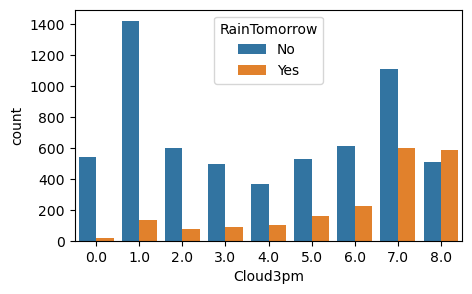

In [237]:
plt.figure(figsize=(5,3))
sns.countplot(x=data['Cloud3pm'],hue=data['RainTomorrow'])
plt.show()

In [238]:
#Here also the chances of rain is increasing with the cloud cover

<Figure size 500x300 with 0 Axes>

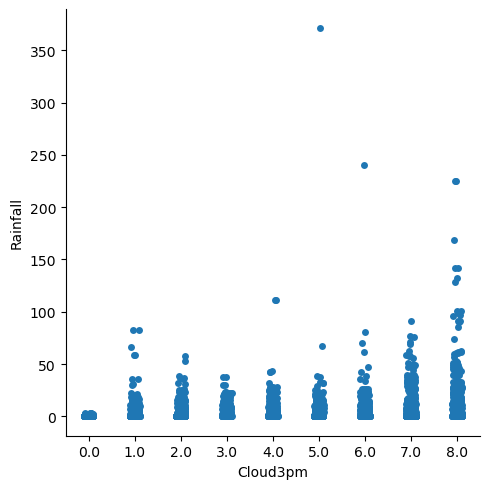

In [239]:
plt.figure(figsize=(5,3))
sns.catplot(x=data['Cloud3pm'],y=data['Rainfall'])
plt.show()

In [240]:
a=one_hot.fit_transform(data[['Cloud3pm']])
a=pd.DataFrame(a,columns=['cloud1','cloud2','cloud3','cloud4','cloud5','cloud6','cloud7','cloud8','cloud9'])
data=pd.concat([a,data],axis=1)
data=data.drop(columns='Cloud3pm')
data

cloud1  cloud2  cloud3  cloud4  cloud5  cloud6  cloud7  cloud8  cloud9  \
0        0.0     0.0     0.0     0.0     0.0     1.0     0.0     0.0     0.0   
1        0.0     0.0     0.0     0.0     0.0     1.0     0.0     0.0     0.0   
2        0.0     0.0     1.0     0.0     0.0     0.0     0.0     0.0     0.0   
3        0.0     0.0     0.0     0.0     1.0     0.0     0.0     0.0     0.0   
4        0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0     1.0   
...      ...     ...     ...     ...     ...     ...     ...     ...     ...   
8420     0.0     0.0     1.0     0.0     0.0     0.0     0.0     0.0     0.0   
8421     0.0     0.0     1.0     0.0     0.0     0.0     0.0     0.0     0.0   
8422     0.0     0.0     0.0     1.0     0.0     0.0     0.0     0.0     0.0   
8423     0.0     0.0     1.0     0.0     0.0     0.0     0.0     0.0     0.0   
8424     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0     1.0   

      cloud1  cloud2  cloud3  cloud4  cloud5  cloud6  cloud7  cloud8  cloud9  \
0        0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0     1.0   
1        0.0     1.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0   
2        0.0     0.0     1.0     0.0     0.0     0.0     0.0     0.0     0.0   
3        1.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0   
4        0.0     0.0     0.0     0.0     0.0     0.0     0.0     1.0     0.0   
...      ...     ...     ...     ...     ...     ...     ...     ...     ...   
8420     0.0     0.0     0.0     0.0     0.0     0.0     1.0     0.0     0.0   
8421     0.0     0.0     0.0     0.0     0.0     0.0     1.0     0.0     0.0   
8422     0.0     0.0     0.0     0.0     0.0     0.0     0.0     1.0     0.0   
8423     0.0     0.0     0.0     1.0     0.0     0.0     0.0     0.0     0.0   
8424     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0     1.0   

      wind1  wind2  wind3  wind4  wind5  wind6  wind7  wind8  wind9  wind10  \
0       0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0     0.0   
1       0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0     0.0   
2       0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0     0.0   
3       1.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0     0.0   
4       0.0    0.0    0.0    0.0    0.0    0.0    0.0    1.0    0.0     0.0   
...     ...    ...    ...    ...    ...    ...    ...    ...    ...     ...   
8420    0.0    1.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0     0.0   
8421    0.0    0.0    0.0    1.0    0.0    0.0    0.0    0.0    0.0     0.0   
8422    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0     0.0   
8423    0.0    0.0    0.0    1.0    0.0    0.0    0.0    0.0    0.0     0.0   
8424    0.0    0.0    1.0    0.0    0.0    0.0    0.0    0.0    0.0     0.0   

      wind11  wind12  wind13  wind14  wind15  wind16  wind1  wind2  wind3  \
0        0.0     0.0     0.0     0.0     1.0     0.0    0.0    0.0    0.0   
1        0.0     0.0     0.0     0.0     0.0     1.0    0.0    0.0    0.0   
2        0.0     0.0     0.0     0.0     0.0     1.0    0.0    0.0    0.0   
3        0.0     0.0     0.0     0.0     0.0     0.0    0.0    0.0    0.0   
4        0.0     0.0     0.0     0.0     0.0     0.0    0.0    1.0    0.0   
...      ...     ...     ...     ...     ...     ...    ...    ...    ...   
8420     0.0     0.0     0.0     0.0     0.0     0.0    0.0    0.0    0.0   
8421     0.0     0.0     0.0     0.0     0.0     0.0    0.0    0.0    0.0   
8422     0.0     0.0     0.0     0.0     1.0     0.0    0.0    0.0    0.0   
8423     0.0     0.0     0.0     0.0     0.0     0.0    0.0    0.0    0.0   
8424     0.0     0.0     0.0     0.0     0.0     0.0    0.0    0.0    1.0   

      wind4  wind5  wind6  wind7  wind8  wind9  wind10  wind11  wind12  \
0       0.0    0.0    0.0    0.0    0.0    0.0     0.0     0.0     0.0   
1       0.0    0.0    0.0    1.0    0.0    0.0     0.0     0.0

In [241]:
data['Temp9am'].isna().sum()

56

In [242]:
data['Temp9am'].value_counts()

Temp9am
14.8    77
18.0    73
18.3    71
17.5    69
20.6    68
        ..
2.5      1
2.0      1
3.4      1
5.2      1
30.2     1
Name: count, Length: 304, dtype: int64

In [243]:
knn_imp=KNNImputer(n_neighbors=5)

In [244]:
data[['MaxTemp','Temp9am','Month','MinTemp','Rainfall']]=   knn_imp.fit_transform(data[['MaxTemp','Temp9am','Month','MinTemp','Rainfall']])

In [245]:
data['Temp9am'].isna().sum()

0

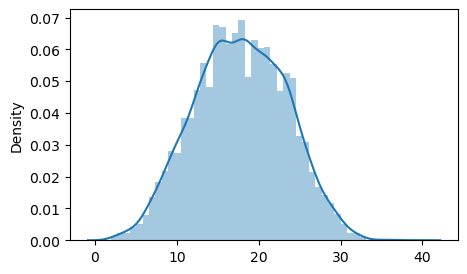

In [247]:
plt.figure(figsize=(5,3))
sns.distplot(x=data['Temp9am'])
plt.show()

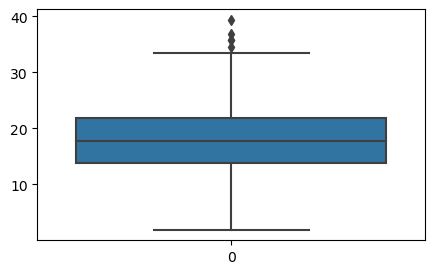

In [249]:
plt.figure(figsize=(5,3))
sns.boxplot(data['Temp9am'])
plt.show()

In [250]:
column_outlier.append('Temp9am')

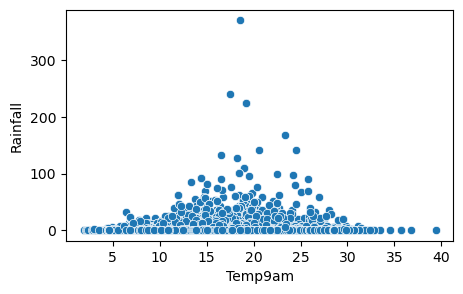

In [251]:
plt.figure(figsize=(5,3))
sns.scatterplot(x=data['Temp9am'],y=data['Rainfall'])
plt.show()

Increase in temperature results in an increase in the rainfall

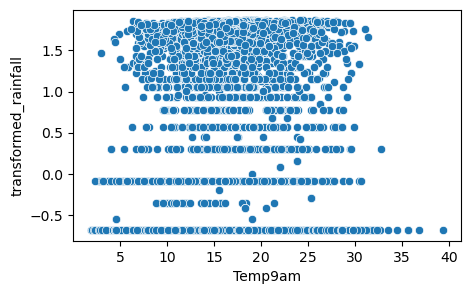

In [252]:
plt.figure(figsize=(5,3))
sns.scatterplot(x=data['Temp9am'],y=transformed['transformed_rainfall'])
plt.show()

<Figure size 500x300 with 0 Axes>

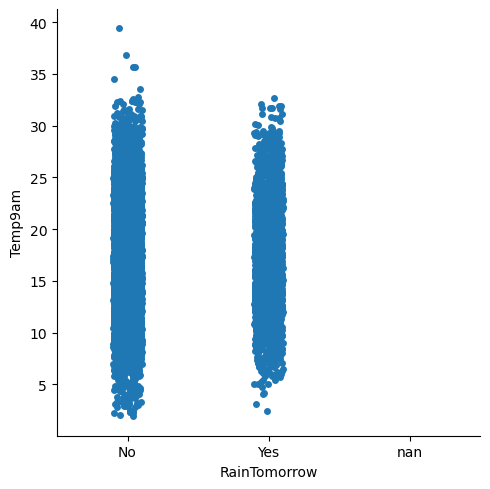

In [253]:
plt.figure(figsize=(5,3))
sns.catplot(x=data['RainTomorrow'],y=data['Temp9am'])
plt.show()

In [254]:
data.isna().sum()

cloud1            0
cloud2            0
cloud3            0
cloud4            0
cloud5            0
               ... 
RainToday       240
RainTomorrow    239
Day               0
Month             0
Year              0
Length: 96, dtype: int64

In [255]:
pd.set_option('display.max_rows',100)

In [256]:
data.isna().sum()

cloud1             0
cloud2             0
cloud3             0
cloud4             0
cloud5             0
cloud6             0
cloud7             0
cloud8             0
cloud9             0
cloud1             0
cloud2             0
cloud3             0
cloud4             0
cloud5             0
cloud6             0
cloud7             0
cloud8             0
cloud9             0
wind1              0
wind2              0
wind3              0
wind4              0
wind5              0
wind6              0
wind7              0
wind8              0
wind9              0
wind10             0
wind11             0
wind12             0
wind13             0
wind14             0
wind15             0
wind16             0
wind1              0
wind2              0
wind3              0
wind4              0
wind5              0
wind6              0
wind7              0
wind8              0
wind9              0
wind10             0
wind11             0
wind12             0
wind13             0
wind14       

In [257]:
data['Temp3pm'].value_counts()

Temp3pm
19.2    78
22.5    77
19.0    75
21.7    72
18.5    72
        ..
37.4     1
8.7      1
36.7     1
8.6      1
42.4     1
Name: count, Length: 328, dtype: int64

In [258]:
data[['MaxTemp','Temp3pm','Month','MinTemp','Rainfall']]=   knn_imp.fit_transform(data[['MaxTemp','Temp3pm','Month','MinTemp','Rainfall']])

In [259]:
data['Temp3pm'].isna().sum()

0

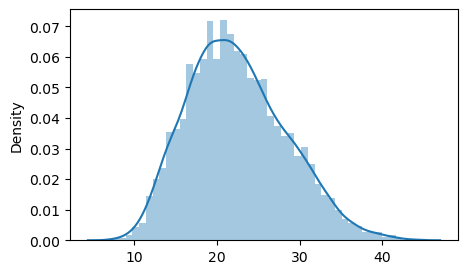

In [260]:
plt.figure(figsize=(5,3))
sns.distplot(x=data['Temp3pm'])
plt.show()

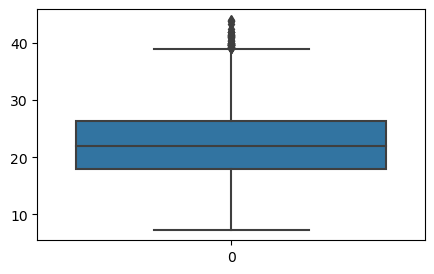

In [262]:
plt.figure(figsize=(5,3))
sns.boxplot(data['Temp3pm'])
plt.show()

In [264]:
column_outlier.append('Temp3pm')

In [265]:
column_outlier

['MaxTemp',
 'Evaporation',
 'WindGustSpeed',
 'WindGustSpeed',
 'WindSpeed9am',
 'WindSpeed3pm',
 'Humidity9am',
 'Pressure9am',
 'Pressure3pm',
 'Temp9am',
 'Temp3pm']

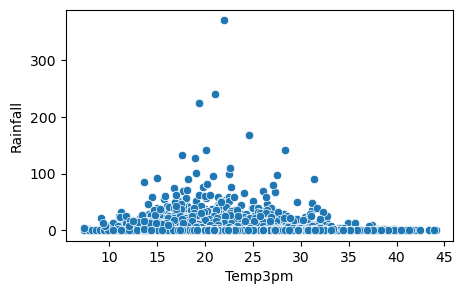

In [266]:
plt.figure(figsize=(5,3))
sns.scatterplot(x=data['Temp3pm'],y=data['Rainfall'])
plt.show()

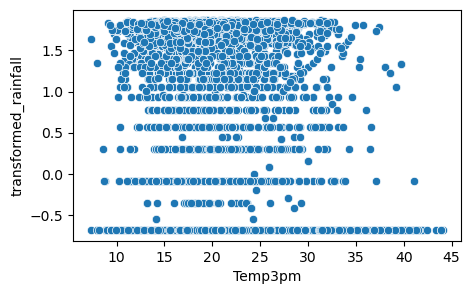

In [267]:
plt.figure(figsize=(5,3))
sns.scatterplot(x=data['Temp3pm'],y=transformed['transformed_rainfall'])
plt.show()

<Figure size 500x300 with 0 Axes>

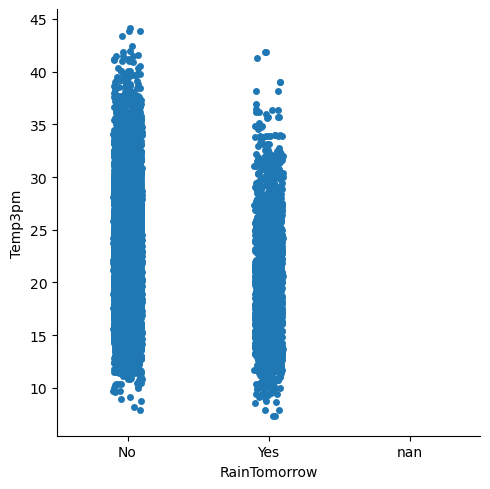

In [268]:
plt.figure(figsize=(5,3))
sns.catplot(x=data['RainTomorrow'],y=data['Temp3pm'])
plt.show()

In [269]:
data.isna().sum()

cloud1             0
cloud2             0
cloud3             0
cloud4             0
cloud5             0
cloud6             0
cloud7             0
cloud8             0
cloud9             0
cloud1             0
cloud2             0
cloud3             0
cloud4             0
cloud5             0
cloud6             0
cloud7             0
cloud8             0
cloud9             0
wind1              0
wind2              0
wind3              0
wind4              0
wind5              0
wind6              0
wind7              0
wind8              0
wind9              0
wind10             0
wind11             0
wind12             0
wind13             0
wind14             0
wind15             0
wind16             0
wind1              0
wind2              0
wind3              0
wind4              0
wind5              0
wind6              0
wind7              0
wind8              0
wind9              0
wind10             0
wind11             0
wind12             0
wind13             0
wind14       

In [270]:
data['RainToday'].isna().sum()

240

In [271]:
data['RainToday'].value_counts()

RainToday
No     6195
Yes    1990
Name: count, dtype: int64

In [275]:
date=pd.read_csv('https://raw.githubusercontent.com/FlipRoboTechnologies/ML_-Datasets/main/Rainfall%20Forecast/Rainfall.csv')

In [278]:
date['RainToday'].value_counts()

RainToday
No     6195
Yes    1990
Name: count, dtype: int64

In [279]:
data['RainToday'].value_counts()

RainToday
0    6195
1    1990
2     240
Name: count, dtype: int64

In [280]:
data['RainToday']=date['RainToday']

In [281]:
data['RainToday'].value_counts()

RainToday
No     6195
Yes    1990
Name: count, dtype: int64

In [282]:
data['RainToday'].isna().sum()

240

In [285]:
data['RainToday']=data['RainToday'].replace({'No':0,'Yes':1})

In [286]:
data['RainToday'].value_counts() #After this we can use the knn imputer for this also

RainToday
0.0    6195
1.0    1990
Name: count, dtype: int64

In [287]:
data['RainToday'].isna().sum()

240

In [288]:
knn_imp=KNNImputer(n_neighbors=1)

In [289]:
a=knn_imp.fit_transform(data[['MaxTemp','RainToday','Month','MinTemp','Rainfall']])
a=pd.DataFrame(a)
a

0    1     2     3    4
0     22.90  0.0  12.0  13.4  0.6
1     25.10  0.0  12.0   7.4  0.0
2     25.70  0.0  12.0  12.9  0.0
3     28.00  0.0  12.0   9.2  0.0
4     32.30  0.0  12.0  17.5  1.0
...     ...  ...   ...   ...  ...
8420  23.40  0.0   6.0   2.8  0.0
8421  25.30  0.0   6.0   3.6  0.0
8422  26.90  0.0   6.0   5.4  0.0
8423  27.00  0.0   6.0   7.8  0.0
8424  16.36  0.0   6.0  14.9  0.0

[8425 rows x 5 columns]

In [290]:
a[1].value_counts()

1
0.0    6297
1.0    2128
Name: count, dtype: int64

#If we would have used the mode than the  entire nulls would have been filled with the 0. But with the use of knn we can fill the values in both of the classes which will be quite good for us.

In [291]:
data['RainToday']=a[1]
data['RainToday'].value_counts()

RainToday
0.0    6297
1.0    2128
Name: count, dtype: int64

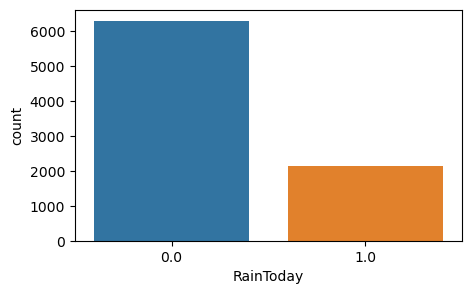

In [292]:
plt.figure(figsize=(5,3))
sns.countplot(x=data['RainToday'])
plt.show()

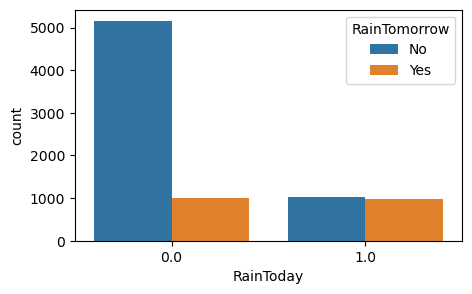

In [293]:
plt.figure(figsize=(5,3))
sns.countplot(x=data['RainToday'],hue=data['RainTomorrow'])
plt.show()

#There is a very strong relation and this was expected also

<Figure size 500x300 with 0 Axes>

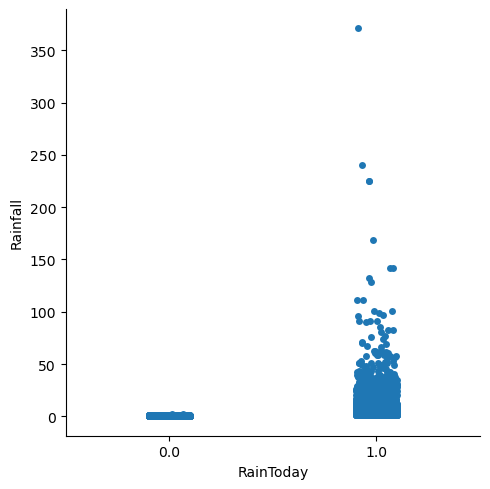

In [294]:
plt.figure(figsize=(5,3))
sns.catplot(x=data['RainToday'],y=data['Rainfall'])
plt.show()

#Here also the relation is very very high

In [295]:
#Encoding
a=one_hot.fit_transform(data[['RainToday']])
a=pd.DataFrame(a,columns=['Raintoday1','Raintoday2'])
data=pd.concat([a,data],axis=1)
data=data.drop(columns='RainToday')
data

Raintoday1  Raintoday2  cloud1  cloud2  cloud3  cloud4  cloud5  cloud6  \
0            1.0         0.0     0.0     0.0     0.0     0.0     0.0     1.0   
1            1.0         0.0     0.0     0.0     0.0     0.0     0.0     1.0   
2            1.0         0.0     0.0     0.0     1.0     0.0     0.0     0.0   
3            1.0         0.0     0.0     0.0     0.0     0.0     1.0     0.0   
4            1.0         0.0     0.0     0.0     0.0     0.0     0.0     0.0   
...          ...         ...     ...     ...     ...     ...     ...     ...   
8420         1.0         0.0     0.0     0.0     1.0     0.0     0.0     0.0   
8421         1.0         0.0     0.0     0.0     1.0     0.0     0.0     0.0   
8422         1.0         0.0     0.0     0.0     0.0     1.0     0.0     0.0   
8423         1.0         0.0     0.0     0.0     1.0     0.0     0.0     0.0   
8424         1.0         0.0     0.0     0.0     0.0     0.0     0.0     0.0   

      cloud7  cloud8  cloud9  cloud1  cloud2  cloud3  cloud4  cloud5  cloud6  \
0        0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0   
1        0.0     0.0     0.0     0.0     1.0     0.0     0.0     0.0     0.0   
2        0.0     0.0     0.0     0.0     0.0     1.0     0.0     0.0     0.0   
3        0.0     0.0     0.0     1.0     0.0     0.0     0.0     0.0     0.0   
4        0.0     0.0     1.0     0.0     0.0     0.0     0.0     0.0     0.0   
...      ...     ...     ...     ...     ...     ...     ...     ...     ...   
8420     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0   
8421     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0   
8422     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0   
8423     0.0     0.0     0.0     0.0     0.0     0.0     1.0     0.0     0.0   
8424     0.0     0.0     1.0     0.0     0.0     0.0     0.0     0.0     0.0   

      cloud7  cloud8  cloud9  wind1  wind2  wind3  wind4  wind5  wind6  wind7  \
0        0.0     0.0     1.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0   
1        0.0     0.0     0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0   
2        0.0     0.0     0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0   
3        0.0     0.0     0.0    1.0    0.0    0.0    0.0    0.0    0.0    0.0   
4        0.0     1.0     0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0   
...      ...     ...     ...    ...    ...    ...    ...    ...    ...    ...   
8420     1.0     0.0     0.0    0.0    1.0    0.0    0.0    0.0    0.0    0.0   
8421     1.0     0.0     0.0    0.0    0.0    0.0    1.0    0.0    0.0    0.0   
8422     0.0     1.0     0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0   
8423     0.0     0.0     0.0    0.0    0.0    0.0    1.0    0.0    0.0    0.0   
8424     0.0     0.0     1.0    0.0    0.0    1.0    0.0    0.0    0.0    0.0   

      wind8  wind9  wind10  wind11  wind12  wind13  wind14  wind15  wind16  \
0       0.0    0.0     0.0     0.0     0.0     0.0     0.0     1.0     0.0   
1       0.0    0.0     0.0     0.0     0.0     0.0     0.0     0.0     1.0   
2       0.0    0.0     0.0     0.0     0.0     0.0     0.0     0.0     1.0   
3       0.0    0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0   
4       1.0    0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0   
...     ...    ...     ...     ...     ...     ...     ...     ...     ...   
8420    0.0    0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0   
8421    0.0    0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0   
8422    0.0    0.0     0.0     0.0     0.0     0.0     0.0     1.0     0.0   
8423    0.0    0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0   
8424    0.0    0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0   

      wind1  wind2  wind3  wind4  wind5  wind6  wind7  wind8  wind9  wind10  \
0       0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0     0.0   
1       0.0    0

In [296]:
data.isna().sum()

Raintoday1         0
Raintoday2         0
cloud1             0
cloud2             0
cloud3             0
cloud4             0
cloud5             0
cloud6             0
cloud7             0
cloud8             0
cloud9             0
cloud1             0
cloud2             0
cloud3             0
cloud4             0
cloud5             0
cloud6             0
cloud7             0
cloud8             0
cloud9             0
wind1              0
wind2              0
wind3              0
wind4              0
wind5              0
wind6              0
wind7              0
wind8              0
wind9              0
wind10             0
wind11             0
wind12             0
wind13             0
wind14             0
wind15             0
wind16             0
wind1              0
wind2              0
wind3              0
wind4              0
wind5              0
wind6              0
wind7              0
wind8              0
wind9              0
wind10             0
wind11             0
wind12       

In [320]:
date['RainTomorrow'].isna().sum()

239

In [321]:
data['RainTomorrow']=date['RainTomorrow']

In [322]:
data.isna().sum()

Raintomorrow1      0
Raintomorrow2      0
Raintoday1         0
Raintoday2         0
cloud1             0
cloud2             0
cloud3             0
cloud4             0
cloud5             0
cloud6             0
cloud7             0
cloud8             0
cloud9             0
cloud1             0
cloud2             0
cloud3             0
cloud4             0
cloud5             0
cloud6             0
cloud7             0
cloud8             0
cloud9             0
wind1              0
wind2              0
wind3              0
wind4              0
wind5              0
wind6              0
wind7              0
wind8              0
wind9              0
wind10             0
wind11             0
wind12             0
wind13             0
wind14             0
wind15             0
wind16             0
wind1              0
wind2              0
wind3              0
wind4              0
wind5              0
wind6              0
wind7              0
wind8              0
wind9              0
wind10       

In [324]:
data=data.drop(columns=['Raintomorrow1', 'Raintomorrow2'])
data.isna().sum()

Raintoday1         0
Raintoday2         0
cloud1             0
cloud2             0
cloud3             0
cloud4             0
cloud5             0
cloud6             0
cloud7             0
cloud8             0
cloud9             0
cloud1             0
cloud2             0
cloud3             0
cloud4             0
cloud5             0
cloud6             0
cloud7             0
cloud8             0
cloud9             0
wind1              0
wind2              0
wind3              0
wind4              0
wind5              0
wind6              0
wind7              0
wind8              0
wind9              0
wind10             0
wind11             0
wind12             0
wind13             0
wind14             0
wind15             0
wind16             0
wind1              0
wind2              0
wind3              0
wind4              0
wind5              0
wind6              0
wind7              0
wind8              0
wind9              0
wind10             0
wind11             0
wind12       

In [325]:
data['RainTomorrow'].value_counts()

RainTomorrow
No     6195
Yes    1991
Name: count, dtype: int64

In [326]:
data['RainTomorrow']=data['RainTomorrow'].replace({'No':0,'Yes':1})

In [327]:
data['RainTomorrow'].value_counts()

RainTomorrow
0.0    6195
1.0    1991
Name: count, dtype: int64

In [328]:
a=knn_imp.fit_transform(data[['MaxTemp','RainTomorrow','Month','MinTemp','Rainfall']])
a=pd.DataFrame(a)
a

0    1     2     3    4
0     22.90  0.0  12.0  13.4  0.6
1     25.10  0.0  12.0   7.4  0.0
2     25.70  0.0  12.0  12.9  0.0
3     28.00  0.0  12.0   9.2  0.0
4     32.30  0.0  12.0  17.5  1.0
...     ...  ...   ...   ...  ...
8420  23.40  0.0   6.0   2.8  0.0
8421  25.30  0.0   6.0   3.6  0.0
8422  26.90  0.0   6.0   5.4  0.0
8423  27.00  0.0   6.0   7.8  0.0
8424  16.36  1.0   6.0  14.9  0.0

[8425 rows x 5 columns]

In [329]:
a[1].value_counts()

1
0.0    6353
1.0    2072
Name: count, dtype: int64

In [330]:
#All the values have been imputed accordingly
data['RainTomorrow']=a[1]
data.isna().sum()

Raintoday1       0
Raintoday2       0
cloud1           0
cloud2           0
cloud3           0
cloud4           0
cloud5           0
cloud6           0
cloud7           0
cloud8           0
cloud9           0
cloud1           0
cloud2           0
cloud3           0
cloud4           0
cloud5           0
cloud6           0
cloud7           0
cloud8           0
cloud9           0
wind1            0
wind2            0
wind3            0
wind4            0
wind5            0
wind6            0
wind7            0
wind8            0
wind9            0
wind10           0
wind11           0
wind12           0
wind13           0
wind14           0
wind15           0
wind16           0
wind1            0
wind2            0
wind3            0
wind4            0
wind5            0
wind6            0
wind7            0
wind8            0
wind9            0
wind10           0
wind11           0
wind12           0
wind13           0
wind14           0
wind15           0
wind16           0
wind1       

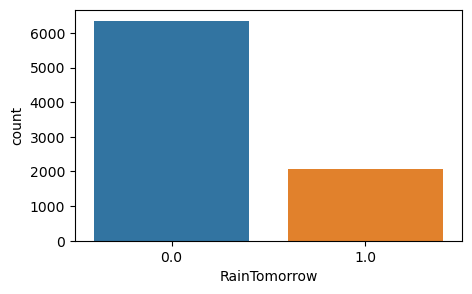

In [331]:
#NO nulls left now
plt.figure(figsize=(5,3))
sns.countplot(x=data['RainTomorrow'])
plt.show()

#Definately a imbalance we will make the model using the default dataset if we do not get a good accuracy than we will make the label balanced and than make the model

In [332]:
plt.figure(figsize=(5,3))
sns.catplot(x=data['RainTomorrow'],y=data['Rainfall'])
plt.show()

<Figure size 500x300 with 0 Axes>

<Figure size 500x300 with 0 Axes>

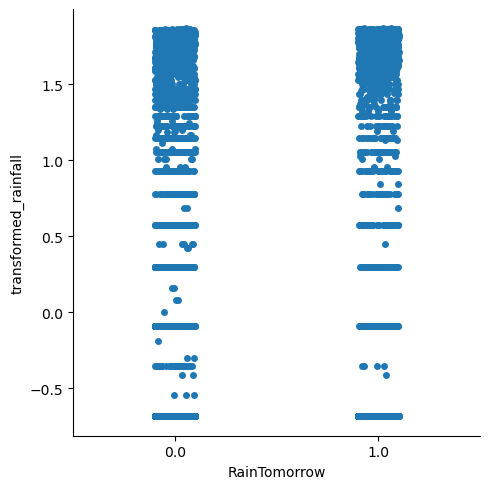

In [333]:
#A very good relation can be clearly seen here
plt.figure(figsize=(5,3))
sns.catplot(x=data['RainTomorrow'],y=transformed['transformed_rainfall'])
plt.show()

In [334]:
#Encoding
a=one_hot.fit_transform(data[['RainTomorrow']])
a=pd.DataFrame(a,columns=['Raintommorow1','Raintommorow2'])
data=pd.concat([a,data],axis=1)
data
#We have encoded the raintomorrow column but we have not deleted it because for one columns it is feature and for other it is
#a label so.

Raintommorow1  Raintommorow2  Raintoday1  Raintoday2  cloud1  cloud2  \
0               1.0            0.0         1.0         0.0     0.0     0.0   
1               1.0            0.0         1.0         0.0     0.0     0.0   
2               1.0            0.0         1.0         0.0     0.0     0.0   
3               1.0            0.0         1.0         0.0     0.0     0.0   
4               1.0            0.0         1.0         0.0     0.0     0.0   
...             ...            ...         ...         ...     ...     ...   
8420            1.0            0.0         1.0         0.0     0.0     0.0   
8421            1.0            0.0         1.0         0.0     0.0     0.0   
8422            1.0            0.0         1.0         0.0     0.0     0.0   
8423            1.0            0.0         1.0         0.0     0.0     0.0   
8424            0.0            1.0         1.0         0.0     0.0     0.0   

      cloud3  cloud4  cloud5  cloud6  cloud7  cloud8  cloud9  cloud1  cloud2  \
0        0.0     0.0     0.0     1.0     0.0     0.0     0.0     0.0     0.0   
1        0.0     0.0     0.0     1.0     0.0     0.0     0.0     0.0     1.0   
2        1.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0   
3        0.0     0.0     1.0     0.0     0.0     0.0     0.0     1.0     0.0   
4        0.0     0.0     0.0     0.0     0.0     0.0     1.0     0.0     0.0   
...      ...     ...     ...     ...     ...     ...     ...     ...     ...   
8420     1.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0   
8421     1.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0   
8422     0.0     1.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0   
8423     1.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0   
8424     0.0     0.0     0.0     0.0     0.0     0.0     1.0     0.0     0.0   

      cloud3  cloud4  cloud5  cloud6  cloud7  cloud8  cloud9  wind1  wind2  \
0        0.0     0.0     0.0     0.0     0.0     0.0     1.0    0.0    0.0   
1        0.0     0.0     0.0     0.0     0.0     0.0     0.0    0.0    0.0   
2        1.0     0.0     0.0     0.0     0.0     0.0     0.0    0.0    0.0   
3        0.0     0.0     0.0     0.0     0.0     0.0     0.0    1.0    0.0   
4        0.0     0.0     0.0     0.0     0.0     1.0     0.0    0.0    0.0   
...      ...     ...     ...     ...     ...     ...     ...    ...    ...   
8420     0.0     0.0     0.0     0.0     1.0     0.0     0.0    0.0    1.0   
8421     0.0     0.0     0.0     0.0     1.0     0.0     0.0    0.0    0.0   
8422     0.0     0.0     0.0     0.0     0.0     1.0     0.0    0.0    0.0   
8423     0.0     1.0     0.0     0.0     0.0     0.0     0.0    0.0    0.0   
8424     0.0     0.0     0.0     0.0     0.0     0.0     1.0    0.0    0.0   

      wind3  wind4  wind5  wind6  wind7  wind8  wind9  wind10  wind11  wind12  \
0       0.0    0.0    0.0    0.0    0.0    0.0    0.0     0.0     0.0     0.0   
1       0.0    0.0    0.0    0.0    0.0    0.0    0.0     0.0     0.0     0.0   
2       0.0    0.0    0.0    0.0    0.0    0.0    0.0     0.0     0.0     0.0   
3       0.0    0.0    0.0    0.0    0.0    0.0    0.0     0.0     0.0     0.0   
4       0.0    0.0    0.0    0.0    0.0    1.0    0.0     0.0     0.0     0.0   
...     ...    ...    ...    ...    ...    ...    ...     ...     ...     ...   
8420    0.0    0.0    0.0    0.0    0.0    0.0    0.0     0.0     0.0     0.0   
8421    0.0    1.0    0.0    0.0    0.0    0.0    0.0     0.0     0.0     0.0   
8422    0.0    0.0    0.0    0.0    0.0    0.0    0.0     0.0     0.0     0.0   
8423    0.0    1.0    0.0    0.0    0.0    0.0    0.0     0.0     0.0     0.0   
8424    1.0    0.0    0.0    0.0    0.0    0.0    0.0     0.0     0.0     0.0   

      wind13  wind14  wind15  wind16  wind1  wind2  wind3  wind4  wind5  \
0        0.0     0.0     1.0     0.0    0.0    0.0    0.0    0.0    0.0   
1        0.0     0.0     0.0     1.0    0.0    0

In [335]:
data.isna().sum()

Raintommorow1    0
Raintommorow2    0
Raintoday1       0
Raintoday2       0
cloud1           0
cloud2           0
cloud3           0
cloud4           0
cloud5           0
cloud6           0
cloud7           0
cloud8           0
cloud9           0
cloud1           0
cloud2           0
cloud3           0
cloud4           0
cloud5           0
cloud6           0
cloud7           0
cloud8           0
cloud9           0
wind1            0
wind2            0
wind3            0
wind4            0
wind5            0
wind6            0
wind7            0
wind8            0
wind9            0
wind10           0
wind11           0
wind12           0
wind13           0
wind14           0
wind15           0
wind16           0
wind1            0
wind2            0
wind3            0
wind4            0
wind5            0
wind6            0
wind7            0
wind8            0
wind9            0
wind10           0
wind11           0
wind12           0
wind13           0
wind14           0
wind15      

#All the nulls have been treaed properly so now let us proceed to the outlier detection procedure
#We have seen outliers in some columns which we will treat now.

In [336]:
from scipy.stats import zscore

In [337]:
data[column_outlier]

MaxTemp  Evaporation  WindGustSpeed  WindGustSpeed  WindSpeed9am  \
0       22.90         6.08           44.0           44.0          20.0   
1       25.10         6.20           44.0           44.0           4.0   
2       25.70         4.64           46.0           46.0          19.0   
3       28.00         7.24           24.0           24.0          11.0   
4       32.30        10.00           41.0           41.0           7.0   
...       ...          ...            ...            ...           ...   
8420    23.40         2.12           31.0           31.0          13.0   
8421    25.30         2.04           22.0           22.0          13.0   
8422    26.90         3.56           37.0           37.0           9.0   
8423    27.00         2.96           28.0           28.0          13.0   
8424    16.36         4.44           32.8           32.8          17.0   

      WindSpeed3pm  Humidity9am  Pressure9am  Pressure3pm  Temp9am  Temp3pm  
0             24.0         71.0       1007.7       1007.1     16.9     21.8  
1             22.0         44.0       1010.6       1007.8     17.2     24.3  
2             26.0         38.0       1007.6       1008.7     21.0     23.2  
3              9.0         45.0       1017.6       1012.8     18.1     26.5  
4             20.0         82.0       1010.8       1006.0     17.8     29.7  
...            ...          ...          ...          ...      ...      ...  
8420          11.0         51.0       1024.6       1020.3     10.1     22.4  
8421           9.0         56.0       1023.5       1019.1     10.9     24.5  
8422           9.0         53.0       1021.0       1016.8     12.5     26.1  
8423           7.0         51.0       1019.4       1016.5     15.1     26.0  
8424          17.0         62.0       1020.2       1017.9     15.0     20.9  

[8425 rows x 11 columns]

In [341]:
#11 continous columns with outliers have been detected . We will treat then accordingly with zscore
Zscore=np.abs(zscore(data[column_outlier]))

In [343]:
index=np.where(Zscore>3)[0]

In [344]:
len(index)

454

In [347]:
#SO there are 454 rows with atleast one outlier let us see how much % it is for the whole data
(len(index)/data.shape[0])*100

5.388724035608308

#so it is 5% only we can delete it but we will also keep the default dataset and will use it if the deleted dataset does not gives a good result.

In [348]:
index

array([   8,   12,   12,   24,   44,   44,   52,   52,   52,   60,   60,
         61,   61,   62,   62,   62,   62,   67,   68,   68,  123,  123,
        267,  267,  296,  346,  352,  371,  378,  381,  381,  381,  405,
        406,  407,  407,  563,  563,  568,  683,  683,  713,  748,  980,
        980,  980, 1151, 1189, 1535, 1587, 1632, 1641, 1644, 1665, 1665,
       1673, 1696, 1898, 1903, 1945, 2016, 2027, 2028, 2043, 2074, 2186,
       2219, 2219, 2230, 2472, 2478, 2485, 2496, 2500, 2500, 2503, 2505,
       2505, 2527, 2527, 2534, 2541, 2835, 2849, 2855, 2859, 2863, 2869,
       2877, 2882, 2883, 2891, 2897, 2905, 2911, 2919, 2933, 2939, 2947,
       2953, 2961, 2967, 2975, 2989, 3059, 3059, 3066, 3066, 3067, 3067,
       3067, 3067, 3068, 3070, 3070, 3082, 3082, 3082, 3082, 3089, 3089,
       3089, 3099, 3099, 3099, 3101, 3141, 3153, 3157, 3164, 3172, 3172,
       3178, 3206, 3212, 3212, 3213, 3221, 3227, 3230, 3234, 3234, 3248,
       3260, 3278, 3278, 3291, 3291, 3302, 3302, 33

In [355]:
#Let us create the full dataset copy which we can use later on
full_dataset=data.copy()

In [358]:
data

Raintommorow1  Raintommorow2  Raintoday1  Raintoday2  cloud1  cloud2  \
0               1.0            0.0         1.0         0.0     0.0     0.0   
1               1.0            0.0         1.0         0.0     0.0     0.0   
2               1.0            0.0         1.0         0.0     0.0     0.0   
3               1.0            0.0         1.0         0.0     0.0     0.0   
4               1.0            0.0         1.0         0.0     0.0     0.0   
...             ...            ...         ...         ...     ...     ...   
8420            1.0            0.0         1.0         0.0     0.0     0.0   
8421            1.0            0.0         1.0         0.0     0.0     0.0   
8422            1.0            0.0         1.0         0.0     0.0     0.0   
8423            1.0            0.0         1.0         0.0     0.0     0.0   
8424            0.0            1.0         1.0         0.0     0.0     0.0   

      cloud3  cloud4  cloud5  cloud6  cloud7  cloud8  cloud9  cloud1  cloud2  \
0        0.0     0.0     0.0     1.0     0.0     0.0     0.0     0.0     0.0   
1        0.0     0.0     0.0     1.0     0.0     0.0     0.0     0.0     1.0   
2        1.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0   
3        0.0     0.0     1.0     0.0     0.0     0.0     0.0     1.0     0.0   
4        0.0     0.0     0.0     0.0     0.0     0.0     1.0     0.0     0.0   
...      ...     ...     ...     ...     ...     ...     ...     ...     ...   
8420     1.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0   
8421     1.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0   
8422     0.0     1.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0   
8423     1.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0   
8424     0.0     0.0     0.0     0.0     0.0     0.0     1.0     0.0     0.0   

      cloud3  cloud4  cloud5  cloud6  cloud7  cloud8  cloud9  wind1  wind2  \
0        0.0     0.0     0.0     0.0     0.0     0.0     1.0    0.0    0.0   
1        0.0     0.0     0.0     0.0     0.0     0.0     0.0    0.0    0.0   
2        1.0     0.0     0.0     0.0     0.0     0.0     0.0    0.0    0.0   
3        0.0     0.0     0.0     0.0     0.0     0.0     0.0    1.0    0.0   
4        0.0     0.0     0.0     0.0     0.0     1.0     0.0    0.0    0.0   
...      ...     ...     ...     ...     ...     ...     ...    ...    ...   
8420     0.0     0.0     0.0     0.0     1.0     0.0     0.0    0.0    1.0   
8421     0.0     0.0     0.0     0.0     1.0     0.0     0.0    0.0    0.0   
8422     0.0     0.0     0.0     0.0     0.0     1.0     0.0    0.0    0.0   
8423     0.0     1.0     0.0     0.0     0.0     0.0     0.0    0.0    0.0   
8424     0.0     0.0     0.0     0.0     0.0     0.0     1.0    0.0    0.0   

      wind3  wind4  wind5  wind6  wind7  wind8  wind9  wind10  wind11  wind12  \
0       0.0    0.0    0.0    0.0    0.0    0.0    0.0     0.0     0.0     0.0   
1       0.0    0.0    0.0    0.0    0.0    0.0    0.0     0.0     0.0     0.0   
2       0.0    0.0    0.0    0.0    0.0    0.0    0.0     0.0     0.0     0.0   
3       0.0    0.0    0.0    0.0    0.0    0.0    0.0     0.0     0.0     0.0   
4       0.0    0.0    0.0    0.0    0.0    1.0    0.0     0.0     0.0     0.0   
...     ...    ...    ...    ...    ...    ...    ...     ...     ...     ...   
8420    0.0    0.0    0.0    0.0    0.0    0.0    0.0     0.0     0.0     0.0   
8421    0.0    1.0    0.0    0.0    0.0    0.0    0.0     0.0     0.0     0.0   
8422    0.0    0.0    0.0    0.0    0.0    0.0    0.0     0.0     0.0     0.0   
8423    0.0    1.0    0.0    0.0    0.0    0.0    0.0     0.0     0.0     0.0   
8424    1.0    0.0    0.0    0.0    0.0    0.0    0.0     0.0     0.0     0.0   

      wind13  wind14  wind15  wind16  wind1  wind2  wind3  wind4  wind5  \
0        0.0     0.0     1.0     0.0    0.0    0.0    0.0    0.0    0.0   
1        0.0     0.0     0.0     1.0    0.0    0

In [359]:
full_dataset

Raintommorow1  Raintommorow2  Raintoday1  Raintoday2  cloud1  cloud2  \
0               1.0            0.0         1.0         0.0     0.0     0.0   
1               1.0            0.0         1.0         0.0     0.0     0.0   
2               1.0            0.0         1.0         0.0     0.0     0.0   
3               1.0            0.0         1.0         0.0     0.0     0.0   
4               1.0            0.0         1.0         0.0     0.0     0.0   
...             ...            ...         ...         ...     ...     ...   
8420            1.0            0.0         1.0         0.0     0.0     0.0   
8421            1.0            0.0         1.0         0.0     0.0     0.0   
8422            1.0            0.0         1.0         0.0     0.0     0.0   
8423            1.0            0.0         1.0         0.0     0.0     0.0   
8424            0.0            1.0         1.0         0.0     0.0     0.0   

      cloud3  cloud4  cloud5  cloud6  cloud7  cloud8  cloud9  cloud1  cloud2  \
0        0.0     0.0     0.0     1.0     0.0     0.0     0.0     0.0     0.0   
1        0.0     0.0     0.0     1.0     0.0     0.0     0.0     0.0     1.0   
2        1.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0   
3        0.0     0.0     1.0     0.0     0.0     0.0     0.0     1.0     0.0   
4        0.0     0.0     0.0     0.0     0.0     0.0     1.0     0.0     0.0   
...      ...     ...     ...     ...     ...     ...     ...     ...     ...   
8420     1.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0   
8421     1.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0   
8422     0.0     1.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0   
8423     1.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0   
8424     0.0     0.0     0.0     0.0     0.0     0.0     1.0     0.0     0.0   

      cloud3  cloud4  cloud5  cloud6  cloud7  cloud8  cloud9  wind1  wind2  \
0        0.0     0.0     0.0     0.0     0.0     0.0     1.0    0.0    0.0   
1        0.0     0.0     0.0     0.0     0.0     0.0     0.0    0.0    0.0   
2        1.0     0.0     0.0     0.0     0.0     0.0     0.0    0.0    0.0   
3        0.0     0.0     0.0     0.0     0.0     0.0     0.0    1.0    0.0   
4        0.0     0.0     0.0     0.0     0.0     1.0     0.0    0.0    0.0   
...      ...     ...     ...     ...     ...     ...     ...    ...    ...   
8420     0.0     0.0     0.0     0.0     1.0     0.0     0.0    0.0    1.0   
8421     0.0     0.0     0.0     0.0     1.0     0.0     0.0    0.0    0.0   
8422     0.0     0.0     0.0     0.0     0.0     1.0     0.0    0.0    0.0   
8423     0.0     1.0     0.0     0.0     0.0     0.0     0.0    0.0    0.0   
8424     0.0     0.0     0.0     0.0     0.0     0.0     1.0    0.0    0.0   

      wind3  wind4  wind5  wind6  wind7  wind8  wind9  wind10  wind11  wind12  \
0       0.0    0.0    0.0    0.0    0.0    0.0    0.0     0.0     0.0     0.0   
1       0.0    0.0    0.0    0.0    0.0    0.0    0.0     0.0     0.0     0.0   
2       0.0    0.0    0.0    0.0    0.0    0.0    0.0     0.0     0.0     0.0   
3       0.0    0.0    0.0    0.0    0.0    0.0    0.0     0.0     0.0     0.0   
4       0.0    0.0    0.0    0.0    0.0    1.0    0.0     0.0     0.0     0.0   
...     ...    ...    ...    ...    ...    ...    ...     ...     ...     ...   
8420    0.0    0.0    0.0    0.0    0.0    0.0    0.0     0.0     0.0     0.0   
8421    0.0    1.0    0.0    0.0    0.0    0.0    0.0     0.0     0.0     0.0   
8422    0.0    0.0    0.0    0.0    0.0    0.0    0.0     0.0     0.0     0.0   
8423    0.0    1.0    0.0    0.0    0.0    0.0    0.0     0.0     0.0     0.0   
8424    1.0    0.0    0.0    0.0    0.0    0.0    0.0     0.0     0.0     0.0   

      wind13  wind14  wind15  wind16  wind1  wind2  wind3  wind4  wind5  \
0        0.0     0.0     1.0     0.0    0.0    0.0    0.0    0.0    0.0   
1        0.0     0.0     0.0     1.0    0.0    0

In [364]:
drop_index=index

In [365]:
len(drop_index)

454

In [366]:
drop_index

array([   8,   12,   12,   24,   44,   44,   52,   52,   52,   60,   60,
         61,   61,   62,   62,   62,   62,   67,   68,   68,  123,  123,
        267,  267,  296,  346,  352,  371,  378,  381,  381,  381,  405,
        406,  407,  407,  563,  563,  568,  683,  683,  713,  748,  980,
        980,  980, 1151, 1189, 1535, 1587, 1632, 1641, 1644, 1665, 1665,
       1673, 1696, 1898, 1903, 1945, 2016, 2027, 2028, 2043, 2074, 2186,
       2219, 2219, 2230, 2472, 2478, 2485, 2496, 2500, 2500, 2503, 2505,
       2505, 2527, 2527, 2534, 2541, 2835, 2849, 2855, 2859, 2863, 2869,
       2877, 2882, 2883, 2891, 2897, 2905, 2911, 2919, 2933, 2939, 2947,
       2953, 2961, 2967, 2975, 2989, 3059, 3059, 3066, 3066, 3067, 3067,
       3067, 3067, 3068, 3070, 3070, 3082, 3082, 3082, 3082, 3089, 3089,
       3089, 3099, 3099, 3099, 3101, 3141, 3153, 3157, 3164, 3172, 3172,
       3178, 3206, 3212, 3212, 3213, 3221, 3227, 3230, 3234, 3234, 3248,
       3260, 3278, 3278, 3291, 3291, 3302, 3302, 33

In [383]:
Zscore=np.abs(zscore(data[column_outlier]))

In [405]:
index=np.where(Zscore>3)

In [391]:
data=data.drop(index=index[0])

In [394]:
data.reset_index(drop=True,inplace=True)

In [395]:
data

Raintommorow1  Raintommorow2  Raintoday1  Raintoday2  cloud1  cloud2  \
0               1.0            0.0         1.0         0.0     0.0     0.0   
1               1.0            0.0         1.0         0.0     0.0     0.0   
2               1.0            0.0         1.0         0.0     0.0     0.0   
3               1.0            0.0         1.0         0.0     0.0     0.0   
4               1.0            0.0         1.0         0.0     0.0     0.0   
...             ...            ...         ...         ...     ...     ...   
8109            1.0            0.0         1.0         0.0     0.0     0.0   
8110            1.0            0.0         1.0         0.0     0.0     0.0   
8111            1.0            0.0         1.0         0.0     0.0     0.0   
8112            1.0            0.0         1.0         0.0     0.0     0.0   
8113            0.0            1.0         1.0         0.0     0.0     0.0   

      cloud3  cloud4  cloud5  cloud6  cloud7  cloud8  cloud9  cloud1  cloud2  \
0        0.0     0.0     0.0     1.0     0.0     0.0     0.0     0.0     0.0   
1        0.0     0.0     0.0     1.0     0.0     0.0     0.0     0.0     1.0   
2        1.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0   
3        0.0     0.0     1.0     0.0     0.0     0.0     0.0     1.0     0.0   
4        0.0     0.0     0.0     0.0     0.0     0.0     1.0     0.0     0.0   
...      ...     ...     ...     ...     ...     ...     ...     ...     ...   
8109     1.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0   
8110     1.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0   
8111     0.0     1.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0   
8112     1.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0   
8113     0.0     0.0     0.0     0.0     0.0     0.0     1.0     0.0     0.0   

      cloud3  cloud4  cloud5  cloud6  cloud7  cloud8  cloud9  wind1  wind2  \
0        0.0     0.0     0.0     0.0     0.0     0.0     1.0    0.0    0.0   
1        0.0     0.0     0.0     0.0     0.0     0.0     0.0    0.0    0.0   
2        1.0     0.0     0.0     0.0     0.0     0.0     0.0    0.0    0.0   
3        0.0     0.0     0.0     0.0     0.0     0.0     0.0    1.0    0.0   
4        0.0     0.0     0.0     0.0     0.0     1.0     0.0    0.0    0.0   
...      ...     ...     ...     ...     ...     ...     ...    ...    ...   
8109     0.0     0.0     0.0     0.0     1.0     0.0     0.0    0.0    1.0   
8110     0.0     0.0     0.0     0.0     1.0     0.0     0.0    0.0    0.0   
8111     0.0     0.0     0.0     0.0     0.0     1.0     0.0    0.0    0.0   
8112     0.0     1.0     0.0     0.0     0.0     0.0     0.0    0.0    0.0   
8113     0.0     0.0     0.0     0.0     0.0     0.0     1.0    0.0    0.0   

      wind3  wind4  wind5  wind6  wind7  wind8  wind9  wind10  wind11  wind12  \
0       0.0    0.0    0.0    0.0    0.0    0.0    0.0     0.0     0.0     0.0   
1       0.0    0.0    0.0    0.0    0.0    0.0    0.0     0.0     0.0     0.0   
2       0.0    0.0    0.0    0.0    0.0    0.0    0.0     0.0     0.0     0.0   
3       0.0    0.0    0.0    0.0    0.0    0.0    0.0     0.0     0.0     0.0   
4       0.0    0.0    0.0    0.0    0.0    1.0    0.0     0.0     0.0     0.0   
...     ...    ...    ...    ...    ...    ...    ...     ...     ...     ...   
8109    0.0    0.0    0.0    0.0    0.0    0.0    0.0     0.0     0.0     0.0   
8110    0.0    1.0    0.0    0.0    0.0    0.0    0.0     0.0     0.0     0.0   
8111    0.0    0.0    0.0    0.0    0.0    0.0    0.0     0.0     0.0     0.0   
8112    0.0    1.0    0.0    0.0    0.0    0.0    0.0     0.0     0.0     0.0   
8113    1.0    0.0    0.0    0.0    0.0    0.0    0.0     0.0     0.0     0.0   

      wind13  wind14  wind15  wind16  wind1  wind2  wind3  wind4  wind5  \
0        0.0     0.0     1.0     0.0    0.0    0.0    0.0    0.0    0.0   
1        0.0     0.0     0.0     1.0    0.0    0

In [396]:
#Deleted all the outliers succesfully

In [399]:
label_categorical=data['RainTomorrow']
label_categorical.value_counts()

RainTomorrow
0.0    6141
1.0    1973
Name: count, dtype: int64

In [400]:
data=data.drop(columns='RainTomorrow')
data

Raintommorow1  Raintommorow2  Raintoday1  Raintoday2  cloud1  cloud2  \
0               1.0            0.0         1.0         0.0     0.0     0.0   
1               1.0            0.0         1.0         0.0     0.0     0.0   
2               1.0            0.0         1.0         0.0     0.0     0.0   
3               1.0            0.0         1.0         0.0     0.0     0.0   
4               1.0            0.0         1.0         0.0     0.0     0.0   
...             ...            ...         ...         ...     ...     ...   
8109            1.0            0.0         1.0         0.0     0.0     0.0   
8110            1.0            0.0         1.0         0.0     0.0     0.0   
8111            1.0            0.0         1.0         0.0     0.0     0.0   
8112            1.0            0.0         1.0         0.0     0.0     0.0   
8113            0.0            1.0         1.0         0.0     0.0     0.0   

      cloud3  cloud4  cloud5  cloud6  cloud7  cloud8  cloud9  cloud1  cloud2  \
0        0.0     0.0     0.0     1.0     0.0     0.0     0.0     0.0     0.0   
1        0.0     0.0     0.0     1.0     0.0     0.0     0.0     0.0     1.0   
2        1.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0   
3        0.0     0.0     1.0     0.0     0.0     0.0     0.0     1.0     0.0   
4        0.0     0.0     0.0     0.0     0.0     0.0     1.0     0.0     0.0   
...      ...     ...     ...     ...     ...     ...     ...     ...     ...   
8109     1.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0   
8110     1.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0   
8111     0.0     1.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0   
8112     1.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0   
8113     0.0     0.0     0.0     0.0     0.0     0.0     1.0     0.0     0.0   

      cloud3  cloud4  cloud5  cloud6  cloud7  cloud8  cloud9  wind1  wind2  \
0        0.0     0.0     0.0     0.0     0.0     0.0     1.0    0.0    0.0   
1        0.0     0.0     0.0     0.0     0.0     0.0     0.0    0.0    0.0   
2        1.0     0.0     0.0     0.0     0.0     0.0     0.0    0.0    0.0   
3        0.0     0.0     0.0     0.0     0.0     0.0     0.0    1.0    0.0   
4        0.0     0.0     0.0     0.0     0.0     1.0     0.0    0.0    0.0   
...      ...     ...     ...     ...     ...     ...     ...    ...    ...   
8109     0.0     0.0     0.0     0.0     1.0     0.0     0.0    0.0    1.0   
8110     0.0     0.0     0.0     0.0     1.0     0.0     0.0    0.0    0.0   
8111     0.0     0.0     0.0     0.0     0.0     1.0     0.0    0.0    0.0   
8112     0.0     1.0     0.0     0.0     0.0     0.0     0.0    0.0    0.0   
8113     0.0     0.0     0.0     0.0     0.0     0.0     1.0    0.0    0.0   

      wind3  wind4  wind5  wind6  wind7  wind8  wind9  wind10  wind11  wind12  \
0       0.0    0.0    0.0    0.0    0.0    0.0    0.0     0.0     0.0     0.0   
1       0.0    0.0    0.0    0.0    0.0    0.0    0.0     0.0     0.0     0.0   
2       0.0    0.0    0.0    0.0    0.0    0.0    0.0     0.0     0.0     0.0   
3       0.0    0.0    0.0    0.0    0.0    0.0    0.0     0.0     0.0     0.0   
4       0.0    0.0    0.0    0.0    0.0    1.0    0.0     0.0     0.0     0.0   
...     ...    ...    ...    ...    ...    ...    ...     ...     ...     ...   
8109    0.0    0.0    0.0    0.0    0.0    0.0    0.0     0.0     0.0     0.0   
8110    0.0    1.0    0.0    0.0    0.0    0.0    0.0     0.0     0.0     0.0   
8111    0.0    0.0    0.0    0.0    0.0    0.0    0.0     0.0     0.0     0.0   
8112    0.0    1.0    0.0    0.0    0.0    0.0    0.0     0.0     0.0     0.0   
8113    1.0    0.0    0.0    0.0    0.0    0.0    0.0     0.0     0.0     0.0   

      wind13  wind14  wind15  wind16  wind1  wind2  wind3  wind4  wind5  \
0        0.0     0.0     1.0     0.0    0.0    0.0    0.0    0.0    0.0   
1        0.0     0.0     0.0     1.0    0.0    0

In [401]:
#Deleted the raintommorow because this time we are making the model for the rainfall
#Let us see the multicollinearity issues in the dataset for this we need to combine the continous columns together
data.columns

Index(['Raintommorow1', 'Raintommorow2', 'Raintoday1', 'Raintoday2', 'cloud1',
       'cloud2', 'cloud3', 'cloud4', 'cloud5', 'cloud6', 'cloud7', 'cloud8',
       'cloud9', 'cloud1', 'cloud2', 'cloud3', 'cloud4', 'cloud5', 'cloud6',
       'cloud7', 'cloud8', 'cloud9', 'wind1', 'wind2', 'wind3', 'wind4',
       'wind5', 'wind6', 'wind7', 'wind8', 'wind9', 'wind10', 'wind11',
       'wind12', 'wind13', 'wind14', 'wind15', 'wind16', 'wind1', 'wind2',
       'wind3', 'wind4', 'wind5', 'wind6', 'wind7', 'wind8', 'wind9', 'wind10',
       'wind11', 'wind12', 'wind13', 'wind14', 'wind15', 'wind16', 'wind1',
       'wind2', 'wind3', 'wind4', 'wind5', 'wind6', 'wind7', 'wind8', 'wind9',
       'wind10', 'wind11', 'wind12', 'wind13', 'wind14', 'wind15', 'wind16',
       'loc1', 'loc2', 'loc3', 'loc4', 'loc5', 'loc6', 'loc7', 'loc8', 'loc9',
       'loc10', 'loc11', 'MinTemp', 'MaxTemp', 'Rainfall', 'Evaporation',
       'Sunshine', 'WindGustSpeed', 'WindSpeed9am', 'WindSpeed3pm',
       'Humidi

In [402]:
continous_columns=['MinTemp', 'MaxTemp', 'Rainfall', 'Evaporation',
       'Sunshine', 'WindGustSpeed', 'WindSpeed9am', 'WindSpeed3pm',
       'Humidity9am', 'Humidity3pm', 'Pressure9am', 'Pressure3pm', 'Temp9am',
       'Temp3pm', 'Day', 'Month', 'Year']

In [403]:
len(continous_columns)

17

17 columns here are continous let us see the relation between them and see whether some are related to one other or not

In [406]:
data[continous_columns]

MinTemp  MaxTemp  Rainfall  Evaporation  Sunshine  WindGustSpeed  \
0        13.4    22.90       0.6         6.08     11.64           44.0   
1         7.4    25.10       0.0         6.20     11.70           44.0   
2        12.9    25.70       0.0         4.64     10.80           46.0   
3         9.2    28.00       0.0         7.24     12.30           24.0   
4        17.5    32.30       1.0        10.00     11.30           41.0   
...       ...      ...       ...          ...       ...            ...   
8109      2.8    23.40       0.0         2.12      9.18           31.0   
8110      3.6    25.30       0.0         2.04      9.28           22.0   
8111      5.4    26.90       0.0         3.56      8.76           37.0   
8112      7.8    27.00       0.0         2.96      8.32           28.0   
8113     14.9    16.36       0.0         4.44      0.48           32.8   

      WindSpeed9am  WindSpeed3pm  Humidity9am  Humidity3pm  Pressure9am  \
0             20.0          24.0         71.0         22.0       1007.7   
1              4.0          22.0         44.0         25.0       1010.6   
2             19.0          26.0         38.0         30.0       1007.6   
3             11.0           9.0         45.0         16.0       1017.6   
4              7.0          20.0         82.0         33.0       1010.8   
...            ...           ...          ...          ...          ...   
8109          13.0          11.0         51.0         24.0       1024.6   
8110          13.0           9.0         56.0         21.0       1023.5   
8111           9.0           9.0         53.0         24.0       1021.0   
8112          13.0           7.0         51.0         24.0       1019.4   
8113          17.0          17.0         62.0         36.0       1020.2   

      Pressure3pm  Temp9am  Temp3pm   Day  Month  Year  
0          1007.1     16.9     21.8   1.0   12.0  2008  
1          1007.8     17.2     24.3   2.0   12.0  2008  
2          1008.7     21.0     23.2   3.0   12.0  2008  
3          1012.8     18.1     26.5   4.0   12.0  2008  
4          1006.0     17.8     29.7   5.0   12.0  2008  
...           ...      ...      ...   ...    ...   ...  
8109       1020.3     10.1     22.4  21.0    6.0  2017  
8110       1019.1     10.9     24.5  22.0    6.0  2017  
8111       1016.8     12.5     26.1  23.0    6.0  2017  
8112       1016.5     15.1     26.0  24.0    6.0  2017  
8113       1017.9     15.0     20.9  25.0    6.0  2017  

[8114 rows x 17 columns]

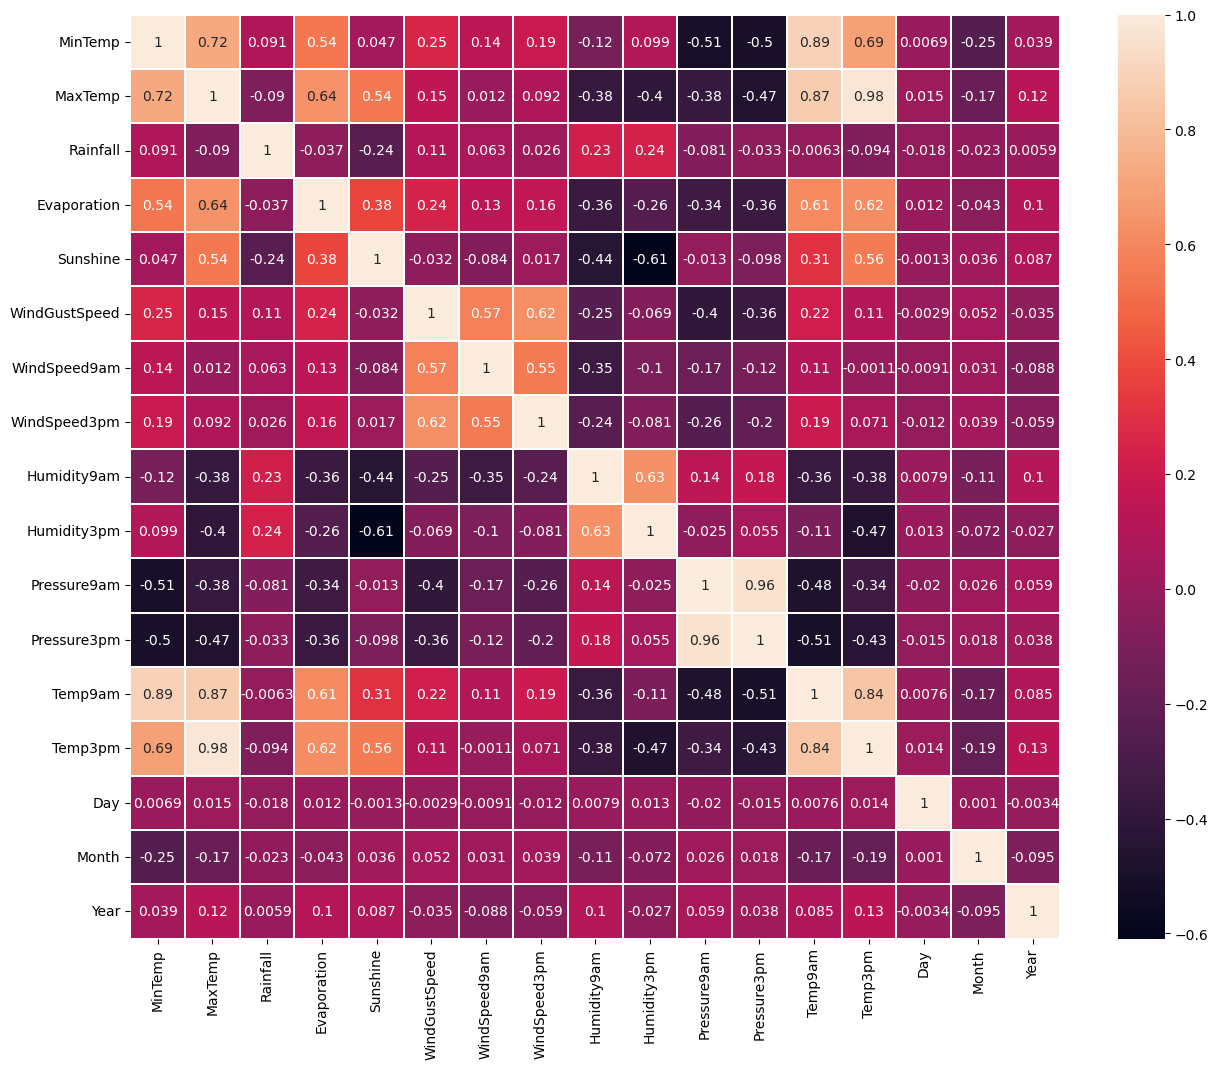

In [407]:
corr=data[continous_columns].corr()
plt.figure(figsize=(15,12))
sns.heatmap(corr,annot=True,linewidths=0.1)
plt.show()

In [410]:
#Let us see the vif scores first to see the score as there are some multi collinearity seen here
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()

In [411]:
continous_scaled=scaler.fit_transform(data[continous_columns])
continous_scaled=pd.DataFrame(continous_scaled,columns=continous_columns)
continous_scaled

MinTemp   MaxTemp  Rainfall  Evaporation  Sunshine  WindGustSpeed  \
0     0.051812 -0.137499 -0.213792     0.363044  1.151836       0.351187   
1    -1.060077  0.229613 -0.271624     0.402819  1.168743       0.351187   
2    -0.040845  0.329735 -0.271624    -0.114253  0.915140       0.502583   
3    -0.726510  0.713534 -0.271624     0.747534  1.337811      -1.162766   
4     0.811604  1.431070 -0.175238     1.662354  1.056031       0.124094   
...        ...       ...       ...          ...       ...            ...   
8109 -1.912526 -0.054064 -0.271624    -0.949524  0.458656      -0.632883   
8110 -1.764274  0.262987 -0.271624    -0.976041  0.486834      -1.314162   
8111 -1.430707  0.529978 -0.271624    -0.472226  0.340308      -0.178697   
8112 -0.985951  0.546664 -0.271624    -0.671100  0.216325      -0.859976   
8113  0.329785 -1.228822 -0.271624    -0.180545 -1.992833      -0.496627   

      WindSpeed9am  WindSpeed3pm  Humidity9am  Humidity3pm  Pressure9am  \
0         0.705254      0.639574     0.166581    -1.629279    -1.605301   
1        -0.990288      0.423302    -1.464603    -1.464200    -1.154085   
2         0.599283      0.855845    -1.827088    -1.189068    -1.620860   
3        -0.248488     -0.982463    -1.404188    -1.959437    -0.064943   
4        -0.672374      0.207031     0.831137    -1.023989    -1.122966   
...            ...           ...          ...          ...          ...   
8109     -0.036545     -0.766192    -1.041703    -1.519226     1.024199   
8110     -0.036545     -0.982463    -0.739632    -1.684305     0.853048   
8111     -0.460431     -0.982463    -0.920875    -1.519226     0.464069   
8112     -0.036545     -1.198735    -1.041703    -1.519226     0.215122   
8113      0.387340     -0.117377    -0.377147    -0.858910     0.339595   

      Pressure3pm   Temp9am   Temp3pm       Day     Month      Year  
0       -1.339027 -0.135698 -0.087026 -1.673681  1.641111 -1.660303  
1       -1.228594 -0.081906  0.341436 -1.560018  1.641111 -1.660303  
2       -1.086608  0.599467  0.152913 -1.446354  1.641111 -1.660303  
3       -0.439784  0.079472  0.718483 -1.332691  1.641111 -1.660303  
4       -1.512565  0.025680  1.266915 -1.219028  1.641111 -1.660303  
...           ...       ...       ...       ...       ...       ...  
8109     0.743429 -1.354996  0.015805  0.599582 -0.117663  1.997613  
8110     0.554115 -1.211549  0.375713  0.713245 -0.117663  1.997613  
8111     0.191263 -0.924655  0.649929  0.826909 -0.117663  1.997613  
8112     0.143934 -0.458453  0.632790  0.940572 -0.117663  1.997613  
8113     0.364801 -0.476384 -0.241272  1.054235 -0.117663  1.997613  

[8114 rows x 17 columns]

In [412]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [413]:
for i in range(17):
    print(variance_inflation_factor(continous_scaled,i))
    print(continous_columns[i])
    print('*'*10)

9.253725896760695
MinTemp
**********
32.80062456836184
MaxTemp
**********
1.1377078174124717
Rainfall
**********
1.929861215010467
Evaporation
**********
2.4758605574005412
Sunshine
**********
2.2105059231125566
WindGustSpeed
**********
1.9464502874718062
WindSpeed9am
**********
1.910190263221291
WindSpeed3pm
**********
3.9181312203401855
Humidity9am
**********
5.733882649719598
Humidity3pm
**********
19.215670012494666
Pressure9am
**********
18.91763374624234
Pressure3pm
**********
18.116516850904617
Temp9am
**********
40.50630034397758
Temp3pm
**********
1.0046602407758545
Day
**********
1.1670110405571874
Month
**********
1.1068171680721253
Year
**********


In [414]:
#So definately multicollinearity is here but we will ignore this and make the model with this only

In [416]:
data

Raintommorow1  Raintommorow2  Raintoday1  Raintoday2  cloud1  cloud2  \
0               1.0            0.0         1.0         0.0     0.0     0.0   
1               1.0            0.0         1.0         0.0     0.0     0.0   
2               1.0            0.0         1.0         0.0     0.0     0.0   
3               1.0            0.0         1.0         0.0     0.0     0.0   
4               1.0            0.0         1.0         0.0     0.0     0.0   
...             ...            ...         ...         ...     ...     ...   
8109            1.0            0.0         1.0         0.0     0.0     0.0   
8110            1.0            0.0         1.0         0.0     0.0     0.0   
8111            1.0            0.0         1.0         0.0     0.0     0.0   
8112            1.0            0.0         1.0         0.0     0.0     0.0   
8113            0.0            1.0         1.0         0.0     0.0     0.0   

      cloud3  cloud4  cloud5  cloud6  cloud7  cloud8  cloud9  cloud1  cloud2  \
0        0.0     0.0     0.0     1.0     0.0     0.0     0.0     0.0     0.0   
1        0.0     0.0     0.0     1.0     0.0     0.0     0.0     0.0     1.0   
2        1.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0   
3        0.0     0.0     1.0     0.0     0.0     0.0     0.0     1.0     0.0   
4        0.0     0.0     0.0     0.0     0.0     0.0     1.0     0.0     0.0   
...      ...     ...     ...     ...     ...     ...     ...     ...     ...   
8109     1.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0   
8110     1.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0   
8111     0.0     1.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0   
8112     1.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0   
8113     0.0     0.0     0.0     0.0     0.0     0.0     1.0     0.0     0.0   

      cloud3  cloud4  cloud5  cloud6  cloud7  cloud8  cloud9  wind1  wind2  \
0        0.0     0.0     0.0     0.0     0.0     0.0     1.0    0.0    0.0   
1        0.0     0.0     0.0     0.0     0.0     0.0     0.0    0.0    0.0   
2        1.0     0.0     0.0     0.0     0.0     0.0     0.0    0.0    0.0   
3        0.0     0.0     0.0     0.0     0.0     0.0     0.0    1.0    0.0   
4        0.0     0.0     0.0     0.0     0.0     1.0     0.0    0.0    0.0   
...      ...     ...     ...     ...     ...     ...     ...    ...    ...   
8109     0.0     0.0     0.0     0.0     1.0     0.0     0.0    0.0    1.0   
8110     0.0     0.0     0.0     0.0     1.0     0.0     0.0    0.0    0.0   
8111     0.0     0.0     0.0     0.0     0.0     1.0     0.0    0.0    0.0   
8112     0.0     1.0     0.0     0.0     0.0     0.0     0.0    0.0    0.0   
8113     0.0     0.0     0.0     0.0     0.0     0.0     1.0    0.0    0.0   

      wind3  wind4  wind5  wind6  wind7  wind8  wind9  wind10  wind11  wind12  \
0       0.0    0.0    0.0    0.0    0.0    0.0    0.0     0.0     0.0     0.0   
1       0.0    0.0    0.0    0.0    0.0    0.0    0.0     0.0     0.0     0.0   
2       0.0    0.0    0.0    0.0    0.0    0.0    0.0     0.0     0.0     0.0   
3       0.0    0.0    0.0    0.0    0.0    0.0    0.0     0.0     0.0     0.0   
4       0.0    0.0    0.0    0.0    0.0    1.0    0.0     0.0     0.0     0.0   
...     ...    ...    ...    ...    ...    ...    ...     ...     ...     ...   
8109    0.0    0.0    0.0    0.0    0.0    0.0    0.0     0.0     0.0     0.0   
8110    0.0    1.0    0.0    0.0    0.0    0.0    0.0     0.0     0.0     0.0   
8111    0.0    0.0    0.0    0.0    0.0    0.0    0.0     0.0     0.0     0.0   
8112    0.0    1.0    0.0    0.0    0.0    0.0    0.0     0.0     0.0     0.0   
8113    1.0    0.0    0.0    0.0    0.0    0.0    0.0     0.0     0.0     0.0   

      wind13  wind14  wind15  wind16  wind1  wind2  wind3  wind4  wind5  \
0        0.0     0.0     1.0     0.0    0.0    0.0    0.0    0.0    0.0   
1        0.0     0.0     0.0     1.0    0.0    0

In [417]:
x=data.drop(columns='Rainfall')
y=data['Rainfall']

In [418]:
x

Raintommorow1  Raintommorow2  Raintoday1  Raintoday2  cloud1  cloud2  \
0               1.0            0.0         1.0         0.0     0.0     0.0   
1               1.0            0.0         1.0         0.0     0.0     0.0   
2               1.0            0.0         1.0         0.0     0.0     0.0   
3               1.0            0.0         1.0         0.0     0.0     0.0   
4               1.0            0.0         1.0         0.0     0.0     0.0   
...             ...            ...         ...         ...     ...     ...   
8109            1.0            0.0         1.0         0.0     0.0     0.0   
8110            1.0            0.0         1.0         0.0     0.0     0.0   
8111            1.0            0.0         1.0         0.0     0.0     0.0   
8112            1.0            0.0         1.0         0.0     0.0     0.0   
8113            0.0            1.0         1.0         0.0     0.0     0.0   

      cloud3  cloud4  cloud5  cloud6  cloud7  cloud8  cloud9  cloud1  cloud2  \
0        0.0     0.0     0.0     1.0     0.0     0.0     0.0     0.0     0.0   
1        0.0     0.0     0.0     1.0     0.0     0.0     0.0     0.0     1.0   
2        1.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0   
3        0.0     0.0     1.0     0.0     0.0     0.0     0.0     1.0     0.0   
4        0.0     0.0     0.0     0.0     0.0     0.0     1.0     0.0     0.0   
...      ...     ...     ...     ...     ...     ...     ...     ...     ...   
8109     1.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0   
8110     1.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0   
8111     0.0     1.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0   
8112     1.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0   
8113     0.0     0.0     0.0     0.0     0.0     0.0     1.0     0.0     0.0   

      cloud3  cloud4  cloud5  cloud6  cloud7  cloud8  cloud9  wind1  wind2  \
0        0.0     0.0     0.0     0.0     0.0     0.0     1.0    0.0    0.0   
1        0.0     0.0     0.0     0.0     0.0     0.0     0.0    0.0    0.0   
2        1.0     0.0     0.0     0.0     0.0     0.0     0.0    0.0    0.0   
3        0.0     0.0     0.0     0.0     0.0     0.0     0.0    1.0    0.0   
4        0.0     0.0     0.0     0.0     0.0     1.0     0.0    0.0    0.0   
...      ...     ...     ...     ...     ...     ...     ...    ...    ...   
8109     0.0     0.0     0.0     0.0     1.0     0.0     0.0    0.0    1.0   
8110     0.0     0.0     0.0     0.0     1.0     0.0     0.0    0.0    0.0   
8111     0.0     0.0     0.0     0.0     0.0     1.0     0.0    0.0    0.0   
8112     0.0     1.0     0.0     0.0     0.0     0.0     0.0    0.0    0.0   
8113     0.0     0.0     0.0     0.0     0.0     0.0     1.0    0.0    0.0   

      wind3  wind4  wind5  wind6  wind7  wind8  wind9  wind10  wind11  wind12  \
0       0.0    0.0    0.0    0.0    0.0    0.0    0.0     0.0     0.0     0.0   
1       0.0    0.0    0.0    0.0    0.0    0.0    0.0     0.0     0.0     0.0   
2       0.0    0.0    0.0    0.0    0.0    0.0    0.0     0.0     0.0     0.0   
3       0.0    0.0    0.0    0.0    0.0    0.0    0.0     0.0     0.0     0.0   
4       0.0    0.0    0.0    0.0    0.0    1.0    0.0     0.0     0.0     0.0   
...     ...    ...    ...    ...    ...    ...    ...     ...     ...     ...   
8109    0.0    0.0    0.0    0.0    0.0    0.0    0.0     0.0     0.0     0.0   
8110    0.0    1.0    0.0    0.0    0.0    0.0    0.0     0.0     0.0     0.0   
8111    0.0    0.0    0.0    0.0    0.0    0.0    0.0     0.0     0.0     0.0   
8112    0.0    1.0    0.0    0.0    0.0    0.0    0.0     0.0     0.0     0.0   
8113    1.0    0.0    0.0    0.0    0.0    0.0    0.0     0.0     0.0     0.0   

      wind13  wind14  wind15  wind16  wind1  wind2  wind3  wind4  wind5  \
0        0.0     0.0     1.0     0.0    0.0    0.0    0.0    0.0    0.0   
1        0.0     0.0     0.0     1.0    0.0    0

In [420]:
#At first drop we should add he scaled continous columns

In [423]:
x

Raintommorow1  Raintommorow2  Raintoday1  Raintoday2  cloud1  cloud2  \
0               1.0            0.0         1.0         0.0     0.0     0.0   
1               1.0            0.0         1.0         0.0     0.0     0.0   
2               1.0            0.0         1.0         0.0     0.0     0.0   
3               1.0            0.0         1.0         0.0     0.0     0.0   
4               1.0            0.0         1.0         0.0     0.0     0.0   
...             ...            ...         ...         ...     ...     ...   
8109            1.0            0.0         1.0         0.0     0.0     0.0   
8110            1.0            0.0         1.0         0.0     0.0     0.0   
8111            1.0            0.0         1.0         0.0     0.0     0.0   
8112            1.0            0.0         1.0         0.0     0.0     0.0   
8113            0.0            1.0         1.0         0.0     0.0     0.0   

      cloud3  cloud4  cloud5  cloud6  cloud7  cloud8  cloud9  cloud1  cloud2  \
0        0.0     0.0     0.0     1.0     0.0     0.0     0.0     0.0     0.0   
1        0.0     0.0     0.0     1.0     0.0     0.0     0.0     0.0     1.0   
2        1.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0   
3        0.0     0.0     1.0     0.0     0.0     0.0     0.0     1.0     0.0   
4        0.0     0.0     0.0     0.0     0.0     0.0     1.0     0.0     0.0   
...      ...     ...     ...     ...     ...     ...     ...     ...     ...   
8109     1.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0   
8110     1.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0   
8111     0.0     1.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0   
8112     1.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0   
8113     0.0     0.0     0.0     0.0     0.0     0.0     1.0     0.0     0.0   

      cloud3  cloud4  cloud5  cloud6  cloud7  cloud8  cloud9  wind1  wind2  \
0        0.0     0.0     0.0     0.0     0.0     0.0     1.0    0.0    0.0   
1        0.0     0.0     0.0     0.0     0.0     0.0     0.0    0.0    0.0   
2        1.0     0.0     0.0     0.0     0.0     0.0     0.0    0.0    0.0   
3        0.0     0.0     0.0     0.0     0.0     0.0     0.0    1.0    0.0   
4        0.0     0.0     0.0     0.0     0.0     1.0     0.0    0.0    0.0   
...      ...     ...     ...     ...     ...     ...     ...    ...    ...   
8109     0.0     0.0     0.0     0.0     1.0     0.0     0.0    0.0    1.0   
8110     0.0     0.0     0.0     0.0     1.0     0.0     0.0    0.0    0.0   
8111     0.0     0.0     0.0     0.0     0.0     1.0     0.0    0.0    0.0   
8112     0.0     1.0     0.0     0.0     0.0     0.0     0.0    0.0    0.0   
8113     0.0     0.0     0.0     0.0     0.0     0.0     1.0    0.0    0.0   

      wind3  wind4  wind5  wind6  wind7  wind8  wind9  wind10  wind11  wind12  \
0       0.0    0.0    0.0    0.0    0.0    0.0    0.0     0.0     0.0     0.0   
1       0.0    0.0    0.0    0.0    0.0    0.0    0.0     0.0     0.0     0.0   
2       0.0    0.0    0.0    0.0    0.0    0.0    0.0     0.0     0.0     0.0   
3       0.0    0.0    0.0    0.0    0.0    0.0    0.0     0.0     0.0     0.0   
4       0.0    0.0    0.0    0.0    0.0    1.0    0.0     0.0     0.0     0.0   
...     ...    ...    ...    ...    ...    ...    ...     ...     ...     ...   
8109    0.0    0.0    0.0    0.0    0.0    0.0    0.0     0.0     0.0     0.0   
8110    0.0    1.0    0.0    0.0    0.0    0.0    0.0     0.0     0.0     0.0   
8111    0.0    0.0    0.0    0.0    0.0    0.0    0.0     0.0     0.0     0.0   
8112    0.0    1.0    0.0    0.0    0.0    0.0    0.0     0.0     0.0     0.0   
8113    1.0    0.0    0.0    0.0    0.0    0.0    0.0     0.0     0.0     0.0   

      wind13  wind14  wind15  wind16  wind1  wind2  wind3  wind4  wind5  \
0        0.0     0.0     1.0     0.0    0.0    0.0    0.0    0.0    0.0   
1        0.0     0.0     0.0     1.0    0.0    0

In [425]:
continous_columns.remove('Rainfall')

In [427]:
x=x.drop(columns=continous_columns)

In [429]:
continous_scaled=continous_scaled.drop(columns='Rainfall')

In [430]:
continous_scaled

MinTemp   MaxTemp  Evaporation  Sunshine  WindGustSpeed  WindSpeed9am  \
0     0.051812 -0.137499     0.363044  1.151836       0.351187      0.705254   
1    -1.060077  0.229613     0.402819  1.168743       0.351187     -0.990288   
2    -0.040845  0.329735    -0.114253  0.915140       0.502583      0.599283   
3    -0.726510  0.713534     0.747534  1.337811      -1.162766     -0.248488   
4     0.811604  1.431070     1.662354  1.056031       0.124094     -0.672374   
...        ...       ...          ...       ...            ...           ...   
8109 -1.912526 -0.054064    -0.949524  0.458656      -0.632883     -0.036545   
8110 -1.764274  0.262987    -0.976041  0.486834      -1.314162     -0.036545   
8111 -1.430707  0.529978    -0.472226  0.340308      -0.178697     -0.460431   
8112 -0.985951  0.546664    -0.671100  0.216325      -0.859976     -0.036545   
8113  0.329785 -1.228822    -0.180545 -1.992833      -0.496627      0.387340   

      WindSpeed3pm  Humidity9am  Humidity3pm  Pressure9am  Pressure3pm  \
0         0.639574     0.166581    -1.629279    -1.605301    -1.339027   
1         0.423302    -1.464603    -1.464200    -1.154085    -1.228594   
2         0.855845    -1.827088    -1.189068    -1.620860    -1.086608   
3        -0.982463    -1.404188    -1.959437    -0.064943    -0.439784   
4         0.207031     0.831137    -1.023989    -1.122966    -1.512565   
...            ...          ...          ...          ...          ...   
8109     -0.766192    -1.041703    -1.519226     1.024199     0.743429   
8110     -0.982463    -0.739632    -1.684305     0.853048     0.554115   
8111     -0.982463    -0.920875    -1.519226     0.464069     0.191263   
8112     -1.198735    -1.041703    -1.519226     0.215122     0.143934   
8113     -0.117377    -0.377147    -0.858910     0.339595     0.364801   

       Temp9am   Temp3pm       Day     Month      Year  
0    -0.135698 -0.087026 -1.673681  1.641111 -1.660303  
1    -0.081906  0.341436 -1.560018  1.641111 -1.660303  
2     0.599467  0.152913 -1.446354  1.641111 -1.660303  
3     0.079472  0.718483 -1.332691  1.641111 -1.660303  
4     0.025680  1.266915 -1.219028  1.641111 -1.660303  
...        ...       ...       ...       ...       ...  
8109 -1.354996  0.015805  0.599582 -0.117663  1.997613  
8110 -1.211549  0.375713  0.713245 -0.117663  1.997613  
8111 -0.924655  0.649929  0.826909 -0.117663  1.997613  
8112 -0.458453  0.632790  0.940572 -0.117663  1.997613  
8113 -0.476384 -0.241272  1.054235 -0.117663  1.997613  

[8114 rows x 16 columns]

In [432]:
x=pd.concat([x,continous_scaled],axis=1) #Succesfully added the continous columns to this

In [433]:
#Now we can make the model

In [434]:
x.shape

(8114, 97)

In [435]:
#Importing the necessary libraries
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor,ExtraTreesRegressor
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import GradientBoostingRegressor,AdaBoostRegressor,BaggingRegressor
from sklearn.metrics import r2_score,mean_absolute_error,mean_squared_error
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import Ridge
from sklearn.linear_model import LassoCV #ridge and the lassocv also act as a feature selector
from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import cross_val_score    

In [436]:
maxACC=0
maxrs=0
for i in range(1,200):
    lr=LinearRegression()
    x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=i)
    lr.fit(x_train,y_train)
    pred=lr.predict(x_test)
    acc=r2_score(y_test,pred)
    if acc>maxACC:
        maxACC=acc
        maxrs=i
print(maxACC,maxrs)

0.3346575786829328 159


In [437]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=maxrs)

In [438]:
rr=RandomForestRegressor()
er=ExtraTreesRegressor()
lr=LinearRegression()
gb=GradientBoostingRegressor()
ad=AdaBoostRegressor()
bg=BaggingRegressor()
ri=Ridge()
ls=LassoCV()
ds=DecisionTreeRegressor()

In [439]:
models=[rr,er,lr,gb,ad,bg,ri,ls,ds] #These are the different models which will be tested and the best one will be kept

In [440]:
accuracy={}
for model in models:
    model.fit(x_train,y_train)
    pred=model.predict(x_test)
    accuracy[model]=r2_score(y_test,pred)
accuracy

{RandomForestRegressor(): 0.4883661851652109,
 ExtraTreesRegressor(): 0.24919204304121978,
 LinearRegression(): 0.3346575786829328,
 GradientBoostingRegressor(): 0.3271891206442854,
 AdaBoostRegressor(): -6.530922308299244,
 BaggingRegressor(): 0.25937205311009104,
 Ridge(): 0.33028810772807804,
 LassoCV(): 0.35000990058179227,
 DecisionTreeRegressor(): -1.341820700637999}

In [ ]:
#None of the model is able to give us a good score that means we have to use the transformed columns now

In [445]:
y1=pt.fit_transform([y])

In [449]:
data['Rainfall']

0       0.6
1       0.0
2       0.0
3       0.0
4       1.0
       ... 
8109    0.0
8110    0.0
8111    0.0
8112    0.0
8113    0.0
Name: Rainfall, Length: 8114, dtype: float64

In [451]:
plt.figure(figsize=(5,3))
sns.distplot(x=data['Rainfall'])
plt.show()

In [452]:
plt.figure(figsize=(5,3))
sns.distplot(x=pt.fit_transform(data[['Rainfall']]))
plt.show()

In [455]:
y1=pt.fit_transform(data[['Rainfall']])

In [456]:
plt.figure(figsize=(5,3))
sns.distplot(x=y1)
plt.show()

In [ ]:
#Let us see now whether  there is any improvent in the accuracy or not

In [463]:
y1

array([[ 0.56766683],
       [-0.68920658],
       [-0.68920658],
       ...,
       [-0.68920658],
       [-0.68920658],
       [-0.68920658]])

In [464]:
len(y1)

8114

In [465]:
maxACC=0
maxrs=0
for i in range(1,200):
    lr=LinearRegression()
    x_train,x_test,y_train,y_test=train_test_split(x,y1,test_size=0.3,random_state=i)
    lr.fit(x_train,y_train)
    pred=lr.predict(x_test)
    acc=r2_score(y_test,pred)
    if acc>maxACC:
        maxACC=acc
        maxrs=i
print(maxACC,maxrs)

0.909199685120894 101


In [467]:
#Great a very high accuracy has been achieved now let us see for other models now
x_train,x_test,y_train,y_test=train_test_split(x,y1,test_size=0.3,random_state=maxrs)

In [468]:
accuracy={}
for model in models:
    model.fit(x_train,y_train)
    pred=model.predict(x_test)
    accuracy[model]=r2_score(y_test,pred)
accuracy

{RandomForestRegressor(): 0.9341263317395482,
 ExtraTreesRegressor(): 0.9377983628014464,
 LinearRegression(): 0.909199685120894,
 GradientBoostingRegressor(): 0.9139111282167562,
 AdaBoostRegressor(): 0.8827815449150549,
 BaggingRegressor(): 0.9261789289130161,
 Ridge(): 0.9092944098607051,
 LassoCV(): 0.9098714906433563,
 DecisionTreeRegressor(): 0.8792809187174865}

#Great all the models have been performing really well now
#Let us do the cross validation after that we can do the tuning of the best model

In [470]:
from sklearn.model_selection import cross_val_score
for model in models:
    print(model,',',cross_val_score(model,x,y1,cv=5).mean())

RandomForestRegressor() , 0.9118444410496936
ExtraTreesRegressor() , 0.9170276176739298
LinearRegression() , -1.0450156360791995e+24
GradientBoostingRegressor() , 0.8982289995543269
AdaBoostRegressor() , 0.8639063011782537
BaggingRegressor() , 0.9060717402467663
Ridge() , 0.894214666011037
LassoCV() , 0.8949585566943625
DecisionTreeRegressor() , 0.8313328185249386


#The extratree regressor and the random forest has been the best models as of now  
We will proceed with the tuning for the extra tree regressor

In [472]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import ExtraTreesRegressor

# Define the parameter grid
param_grid = {
    'n_estimators': [50, 100],
    'max_depth': [None, 10],
    'min_samples_split': [2, 5],
    'min_samples_leaf': [1, 2],
    'max_features': ['auto', 'sqrt'],
    'bootstrap': [True, False]
}
# Create an ExtraTreeRegressor instance
extra_tree = ExtraTreesRegressor()

# Perform grid search with cross-validation
grid_search = GridSearchCV(extra_tree, param_grid, cv=5, scoring='neg_mean_squared_error')

# Fit the grid search to the data
grid_search.fit(x,y1)

# Get the best parameters and best score
best_params = grid_search.best_params_
best_score = grid_search.best_score_

print("Best Parameters:", best_params)

Best Parameters: {'bootstrap': False, 'max_depth': None, 'max_features': 'sqrt', 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 100}


In [473]:
model_extratree=ExtraTreesRegressor(bootstrap=False,max_depth=None,max_features='sqrt',
                                   min_samples_leaf=1,min_samples_split=2)

In [480]:
model_extratree.fit(x_train,y_train)
pred=model_extratree.predict(x_test)
r2_score(y_test,pred)

0.9406908464419683

In [482]:
y_pred=model.predict(x_train)
r2_score(y_train,y_pred)

1.0

So the best model as of now has been the extratree regressor where we used the transformed label to fit in the model
But the point is that the model predicted the transformed label rather than the acutual label so we will have to get the actual label also. And the tuning we did improved the accuracy by 1%.

In [490]:
pt.inverse_transform(y_test)

array([[0. ],
       [0.6],
       [0. ],
       ...,
       [0. ],
       [0. ],
       [3.4]])

In [ ]:
pt.inverse_transform()

In [495]:
pred=pred.reshape(y_test.shape)

In [496]:
pred.shape

(2435, 1)

In [497]:
pred

array([[-0.54134299],
       [-0.62092274],
       [-0.68920658],
       ...,
       [-0.23270882],
       [-0.48779224],
       [ 1.48604436]])

In [498]:
pt.inverse_transform(pred)

array([[4.22314432e-02],
       [1.89735727e-02],
       [2.22044605e-16],
       ...,
       [1.46347211e-01],
       [5.86293399e-02],
       [2.76247833e+00]])

In [499]:
pt.inverse_transform(y_test)

array([[0. ],
       [0.6],
       [0. ],
       ...,
       [0. ],
       [0. ],
       [3.4]])

In [514]:
prediction={'Actual':pt.inverse_transform(y_test),
          'Predicted':pt.inverse_transform(pred)}

In [515]:
prediction['Actual']

array([[0. ],
       [0.6],
       [0. ],
       ...,
       [0. ],
       [0. ],
       [3.4]])

In [516]:
prediction['Predicted']

array([[4.22314432e-02],
       [1.89735727e-02],
       [2.22044605e-16],
       ...,
       [1.46347211e-01],
       [5.86293399e-02],
       [2.76247833e+00]])

So this is the predicted and the acutual

In [518]:
mean_absolute_error(y_test,pred)

0.145737294686584

In [519]:
mean_squared_error(y_test,pred)

0.06003450685504675

In [521]:
import joblib 
joblib.dump(model_extratree,'model.PKL')
#Saved the model

In [522]:
#One thing to be noted is that we made the model without considering the multi collinearity
#Let us make the model considering all the multi collinearity

In [523]:
x

Raintommorow1  Raintommorow2  Raintoday1  Raintoday2  cloud1  cloud2  \
0               1.0            0.0         1.0         0.0     0.0     0.0   
1               1.0            0.0         1.0         0.0     0.0     0.0   
2               1.0            0.0         1.0         0.0     0.0     0.0   
3               1.0            0.0         1.0         0.0     0.0     0.0   
4               1.0            0.0         1.0         0.0     0.0     0.0   
...             ...            ...         ...         ...     ...     ...   
8109            1.0            0.0         1.0         0.0     0.0     0.0   
8110            1.0            0.0         1.0         0.0     0.0     0.0   
8111            1.0            0.0         1.0         0.0     0.0     0.0   
8112            1.0            0.0         1.0         0.0     0.0     0.0   
8113            0.0            1.0         1.0         0.0     0.0     0.0   

      cloud3  cloud4  cloud5  cloud6  cloud7  cloud8  cloud9  cloud1  cloud2  \
0        0.0     0.0     0.0     1.0     0.0     0.0     0.0     0.0     0.0   
1        0.0     0.0     0.0     1.0     0.0     0.0     0.0     0.0     1.0   
2        1.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0   
3        0.0     0.0     1.0     0.0     0.0     0.0     0.0     1.0     0.0   
4        0.0     0.0     0.0     0.0     0.0     0.0     1.0     0.0     0.0   
...      ...     ...     ...     ...     ...     ...     ...     ...     ...   
8109     1.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0   
8110     1.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0   
8111     0.0     1.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0   
8112     1.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0   
8113     0.0     0.0     0.0     0.0     0.0     0.0     1.0     0.0     0.0   

      cloud3  cloud4  cloud5  cloud6  cloud7  cloud8  cloud9  wind1  wind2  \
0        0.0     0.0     0.0     0.0     0.0     0.0     1.0    0.0    0.0   
1        0.0     0.0     0.0     0.0     0.0     0.0     0.0    0.0    0.0   
2        1.0     0.0     0.0     0.0     0.0     0.0     0.0    0.0    0.0   
3        0.0     0.0     0.0     0.0     0.0     0.0     0.0    1.0    0.0   
4        0.0     0.0     0.0     0.0     0.0     1.0     0.0    0.0    0.0   
...      ...     ...     ...     ...     ...     ...     ...    ...    ...   
8109     0.0     0.0     0.0     0.0     1.0     0.0     0.0    0.0    1.0   
8110     0.0     0.0     0.0     0.0     1.0     0.0     0.0    0.0    0.0   
8111     0.0     0.0     0.0     0.0     0.0     1.0     0.0    0.0    0.0   
8112     0.0     1.0     0.0     0.0     0.0     0.0     0.0    0.0    0.0   
8113     0.0     0.0     0.0     0.0     0.0     0.0     1.0    0.0    0.0   

      wind3  wind4  wind5  wind6  wind7  wind8  wind9  wind10  wind11  wind12  \
0       0.0    0.0    0.0    0.0    0.0    0.0    0.0     0.0     0.0     0.0   
1       0.0    0.0    0.0    0.0    0.0    0.0    0.0     0.0     0.0     0.0   
2       0.0    0.0    0.0    0.0    0.0    0.0    0.0     0.0     0.0     0.0   
3       0.0    0.0    0.0    0.0    0.0    0.0    0.0     0.0     0.0     0.0   
4       0.0    0.0    0.0    0.0    0.0    1.0    0.0     0.0     0.0     0.0   
...     ...    ...    ...    ...    ...    ...    ...     ...     ...     ...   
8109    0.0    0.0    0.0    0.0    0.0    0.0    0.0     0.0     0.0     0.0   
8110    0.0    1.0    0.0    0.0    0.0    0.0    0.0     0.0     0.0     0.0   
8111    0.0    0.0    0.0    0.0    0.0    0.0    0.0     0.0     0.0     0.0   
8112    0.0    1.0    0.0    0.0    0.0    0.0    0.0     0.0     0.0     0.0   
8113    1.0    0.0    0.0    0.0    0.0    0.0    0.0     0.0     0.0     0.0   

      wind13  wind14  wind15  wind16  wind1  wind2  wind3  wind4  wind5  \
0        0.0     0.0     1.0     0.0    0.0    0.0    0.0    0.0    0.0   
1        0.0     0.0     0.0     1.0    0.0    0

In [525]:
y1=pd.DataFrame(y1,columns=['Rainfall transformed'])
y1

Rainfall transformed
0                 0.567667
1                -0.689207
2                -0.689207
3                -0.689207
4                 0.924310
...                    ...
8109             -0.689207
8110             -0.689207
8111             -0.689207
8112             -0.689207
8113             -0.689207

[8114 rows x 1 columns]

In [527]:
x[continous_columns]

MinTemp   MaxTemp  Evaporation  Sunshine  WindGustSpeed  WindSpeed9am  \
0     0.051812 -0.137499     0.363044  1.151836       0.351187      0.705254   
1    -1.060077  0.229613     0.402819  1.168743       0.351187     -0.990288   
2    -0.040845  0.329735    -0.114253  0.915140       0.502583      0.599283   
3    -0.726510  0.713534     0.747534  1.337811      -1.162766     -0.248488   
4     0.811604  1.431070     1.662354  1.056031       0.124094     -0.672374   
...        ...       ...          ...       ...            ...           ...   
8109 -1.912526 -0.054064    -0.949524  0.458656      -0.632883     -0.036545   
8110 -1.764274  0.262987    -0.976041  0.486834      -1.314162     -0.036545   
8111 -1.430707  0.529978    -0.472226  0.340308      -0.178697     -0.460431   
8112 -0.985951  0.546664    -0.671100  0.216325      -0.859976     -0.036545   
8113  0.329785 -1.228822    -0.180545 -1.992833      -0.496627      0.387340   

      WindSpeed3pm  Humidity9am  Humidity3pm  Pressure9am  Pressure3pm  \
0         0.639574     0.166581    -1.629279    -1.605301    -1.339027   
1         0.423302    -1.464603    -1.464200    -1.154085    -1.228594   
2         0.855845    -1.827088    -1.189068    -1.620860    -1.086608   
3        -0.982463    -1.404188    -1.959437    -0.064943    -0.439784   
4         0.207031     0.831137    -1.023989    -1.122966    -1.512565   
...            ...          ...          ...          ...          ...   
8109     -0.766192    -1.041703    -1.519226     1.024199     0.743429   
8110     -0.982463    -0.739632    -1.684305     0.853048     0.554115   
8111     -0.982463    -0.920875    -1.519226     0.464069     0.191263   
8112     -1.198735    -1.041703    -1.519226     0.215122     0.143934   
8113     -0.117377    -0.377147    -0.858910     0.339595     0.364801   

       Temp9am   Temp3pm       Day     Month      Year  
0    -0.135698 -0.087026 -1.673681  1.641111 -1.660303  
1    -0.081906  0.341436 -1.560018  1.641111 -1.660303  
2     0.599467  0.152913 -1.446354  1.641111 -1.660303  
3     0.079472  0.718483 -1.332691  1.641111 -1.660303  
4     0.025680  1.266915 -1.219028  1.641111 -1.660303  
...        ...       ...       ...       ...       ...  
8109 -1.354996  0.015805  0.599582 -0.117663  1.997613  
8110 -1.211549  0.375713  0.713245 -0.117663  1.997613  
8111 -0.924655  0.649929  0.826909 -0.117663  1.997613  
8112 -0.458453  0.632790  0.940572 -0.117663  1.997613  
8113 -0.476384 -0.241272  1.054235 -0.117663  1.997613  

[8114 rows x 16 columns]

In [528]:
for i in range(16):
    print(variance_inflation_factor(x[continous_columns],i))
    print(continous_columns[i])
    print('*'*10)

9.252837908964905
MinTemp
**********
32.73090536892464
MaxTemp
**********
1.9294410776775095
Evaporation
**********
2.4599901805804576
Sunshine
**********
2.1873447383032563
WindGustSpeed
**********
1.9408583174661864
WindSpeed9am
**********
1.9030893776759987
WindSpeed3pm
**********
3.8613100720348514
Humidity9am
**********
5.730577540556965
Humidity3pm
**********
19.069145472694974
Pressure9am
**********
18.77911104949929
Pressure3pm
**********
18.102132485830676
Temp9am
**********
40.4283802919821
Temp3pm
**********
1.0040478797297334
Day
**********
1.1662330668008527
Month
**********
1.106801012384967
Year
**********


In [530]:
#Let us drop the temp3pm because it has the highest vif score
x=x.drop(columns='Temp3pm')

In [531]:
continous_columns.remove('Temp3pm')

In [532]:
for i in range(15):
    print(variance_inflation_factor(x[continous_columns],i))
    print(continous_columns[i])
    print('*'*10)

9.202763495449805
MinTemp
**********
11.609709685679839
MaxTemp
**********
1.928177679926067
Evaporation
**********
2.45981357880362
Sunshine
**********
2.1730325370264243
WindGustSpeed
**********
1.937220497709091
WindSpeed9am
**********
1.897747282283028
WindSpeed3pm
**********
3.291083488937564
Humidity9am
**********
3.6507349856828943
Humidity3pm
**********
18.075528723790864
Pressure9am
**********
17.953197851846628
Pressure3pm
**********
16.515782264452024
Temp9am
**********
1.0030501717531317
Day
**********
1.1453400992436378
Month
**********
1.106779089836848
Year
**********


In [534]:
#The pressure9am also has a high vif so let us drop that also
x=x.drop(columns='Pressure9am')

In [536]:
continous_columns.remove('Pressure9am')

In [537]:
for i in range(14):
    print(variance_inflation_factor(x[continous_columns],i))
    print(continous_columns[i])
    print('*'*10)

8.943591425009554
MinTemp
**********
10.417616535537231
MaxTemp
**********
1.9008320579624138
Evaporation
**********
2.4571633486314326
Sunshine
**********
2.1610743973258026
WindGustSpeed
**********
1.9372201194196599
WindSpeed9am
**********
1.8827357749213876
WindSpeed3pm
**********
3.288095753692977
Humidity9am
**********
3.6453719459667537
Humidity3pm
**********
1.557448057873261
Pressure3pm
**********
16.41002737121872
Temp9am
**********
1.0018306948266582
Day
**********
1.1430264626234559
Month
**********
1.1052657936414259
Year
**********


In [539]:
#Now let us make the model and see if there is any improvement or not

In [543]:
maxACC=0
maxrs=0
for i in range(1,200):
    lr=LinearRegression()
    x_train,x_test,y_train,y_test=train_test_split(x,y1,test_size=0.3,random_state=i)
    lr.fit(x_train,y_train)
    pred=lr.predict(x_test)
    acc=r2_score(y_test,pred)
    if acc>maxACC:
        maxACC=acc
        maxrs=i
print(maxACC,maxrs)

0.9090789410635806 101


In [544]:
x_train,x_test,y_train,y_test=train_test_split(x,y1,test_size=0.3,random_state=maxrs)

In [545]:
accuracy={}
for model in models:
    model.fit(x_train,y_train)
    pred=model.predict(x_test)
    accuracy[model]=r2_score(y_test,pred)
accuracy

{RandomForestRegressor(): 0.933190905969098,
 ExtraTreesRegressor(): 0.9363606223314787,
 LinearRegression(): 0.9090789410635806,
 GradientBoostingRegressor(): 0.9127068750640287,
 AdaBoostRegressor(): 0.8632350481075676,
 BaggingRegressor(): 0.9260692922305342,
 Ridge(): 0.9089810221242481,
 LassoCV(): 0.9095247813315183,
 DecisionTreeRegressor(): 0.8681598390118548}

In [546]:
#let us do the tuning for the extratree again
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import ExtraTreesRegressor

# Define the parameter grid
param_grid = {
    'n_estimators': [50, 100],
    'max_depth': [None, 10],
    'min_samples_split': [2, 5],
    'min_samples_leaf': [1, 2],
    'max_features': ['auto', 'sqrt'],
    'bootstrap': [True, False]
}
# Create an ExtraTreeRegressor instance
extra_tree = ExtraTreesRegressor()

# Perform grid search with cross-validation
grid_search = GridSearchCV(extra_tree, param_grid, cv=5, scoring='neg_mean_squared_error')

# Fit the grid search to the data
grid_search.fit(x,y1)

# Get the best parameters and best score
best_params = grid_search.best_params_
best_score = grid_search.best_score_

print("Best Parameters:", best_params)

Best Parameters: {'bootstrap': False, 'max_depth': None, 'max_features': 'sqrt', 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 100}


In [547]:
model_extratree_var=ExtraTreesRegressor(bootstrap=False,max_depth=None,max_features='sqrt',min_samples_leaf=1,
                                       min_samples_split=2,n_estimators=100)

In [555]:
model_extratree_var.fit(x_train,y_train)
pred=model_extratree.predict(x_test)
r2_score(y_test,pred)

0.9399703854826311

In [557]:
y_pred=model_extratree_var.predict(x_train)
r2_score(y_train,y_pred)

1.0

#SO this is also having a identical accuracy so we will stop here and not make more model by deleting more columns

In [560]:
#One last time we will make the model with all columns and features and not considering the outliers also
full_dataset

Raintommorow1  Raintommorow2  Raintoday1  Raintoday2  cloud1  cloud2  \
0               1.0            0.0         1.0         0.0     0.0     0.0   
1               1.0            0.0         1.0         0.0     0.0     0.0   
2               1.0            0.0         1.0         0.0     0.0     0.0   
3               1.0            0.0         1.0         0.0     0.0     0.0   
4               1.0            0.0         1.0         0.0     0.0     0.0   
...             ...            ...         ...         ...     ...     ...   
8420            1.0            0.0         1.0         0.0     0.0     0.0   
8421            1.0            0.0         1.0         0.0     0.0     0.0   
8422            1.0            0.0         1.0         0.0     0.0     0.0   
8423            1.0            0.0         1.0         0.0     0.0     0.0   
8424            0.0            1.0         1.0         0.0     0.0     0.0   

      cloud3  cloud4  cloud5  cloud6  cloud7  cloud8  cloud9  cloud1  cloud2  \
0        0.0     0.0     0.0     1.0     0.0     0.0     0.0     0.0     0.0   
1        0.0     0.0     0.0     1.0     0.0     0.0     0.0     0.0     1.0   
2        1.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0   
3        0.0     0.0     1.0     0.0     0.0     0.0     0.0     1.0     0.0   
4        0.0     0.0     0.0     0.0     0.0     0.0     1.0     0.0     0.0   
...      ...     ...     ...     ...     ...     ...     ...     ...     ...   
8420     1.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0   
8421     1.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0   
8422     0.0     1.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0   
8423     1.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0   
8424     0.0     0.0     0.0     0.0     0.0     0.0     1.0     0.0     0.0   

      cloud3  cloud4  cloud5  cloud6  cloud7  cloud8  cloud9  wind1  wind2  \
0        0.0     0.0     0.0     0.0     0.0     0.0     1.0    0.0    0.0   
1        0.0     0.0     0.0     0.0     0.0     0.0     0.0    0.0    0.0   
2        1.0     0.0     0.0     0.0     0.0     0.0     0.0    0.0    0.0   
3        0.0     0.0     0.0     0.0     0.0     0.0     0.0    1.0    0.0   
4        0.0     0.0     0.0     0.0     0.0     1.0     0.0    0.0    0.0   
...      ...     ...     ...     ...     ...     ...     ...    ...    ...   
8420     0.0     0.0     0.0     0.0     1.0     0.0     0.0    0.0    1.0   
8421     0.0     0.0     0.0     0.0     1.0     0.0     0.0    0.0    0.0   
8422     0.0     0.0     0.0     0.0     0.0     1.0     0.0    0.0    0.0   
8423     0.0     1.0     0.0     0.0     0.0     0.0     0.0    0.0    0.0   
8424     0.0     0.0     0.0     0.0     0.0     0.0     1.0    0.0    0.0   

      wind3  wind4  wind5  wind6  wind7  wind8  wind9  wind10  wind11  wind12  \
0       0.0    0.0    0.0    0.0    0.0    0.0    0.0     0.0     0.0     0.0   
1       0.0    0.0    0.0    0.0    0.0    0.0    0.0     0.0     0.0     0.0   
2       0.0    0.0    0.0    0.0    0.0    0.0    0.0     0.0     0.0     0.0   
3       0.0    0.0    0.0    0.0    0.0    0.0    0.0     0.0     0.0     0.0   
4       0.0    0.0    0.0    0.0    0.0    1.0    0.0     0.0     0.0     0.0   
...     ...    ...    ...    ...    ...    ...    ...     ...     ...     ...   
8420    0.0    0.0    0.0    0.0    0.0    0.0    0.0     0.0     0.0     0.0   
8421    0.0    1.0    0.0    0.0    0.0    0.0    0.0     0.0     0.0     0.0   
8422    0.0    0.0    0.0    0.0    0.0    0.0    0.0     0.0     0.0     0.0   
8423    0.0    1.0    0.0    0.0    0.0    0.0    0.0     0.0     0.0     0.0   
8424    1.0    0.0    0.0    0.0    0.0    0.0    0.0     0.0     0.0     0.0   

      wind13  wind14  wind15  wind16  wind1  wind2  wind3  wind4  wind5  \
0        0.0     0.0     1.0     0.0    0.0    0.0    0.0    0.0    0.0   
1        0.0     0.0     0.0     1.0    0.0    0

In [561]:
x=full_dataset.drop(columns='Rainfall')
y=full_dataset['Rainfall']

In [563]:
x.columns

Index(['Raintommorow1', 'Raintommorow2', 'Raintoday1', 'Raintoday2', 'cloud1',
       'cloud2', 'cloud3', 'cloud4', 'cloud5', 'cloud6', 'cloud7', 'cloud8',
       'cloud9', 'cloud1', 'cloud2', 'cloud3', 'cloud4', 'cloud5', 'cloud6',
       'cloud7', 'cloud8', 'cloud9', 'wind1', 'wind2', 'wind3', 'wind4',
       'wind5', 'wind6', 'wind7', 'wind8', 'wind9', 'wind10', 'wind11',
       'wind12', 'wind13', 'wind14', 'wind15', 'wind16', 'wind1', 'wind2',
       'wind3', 'wind4', 'wind5', 'wind6', 'wind7', 'wind8', 'wind9', 'wind10',
       'wind11', 'wind12', 'wind13', 'wind14', 'wind15', 'wind16', 'wind1',
       'wind2', 'wind3', 'wind4', 'wind5', 'wind6', 'wind7', 'wind8', 'wind9',
       'wind10', 'wind11', 'wind12', 'wind13', 'wind14', 'wind15', 'wind16',
       'loc1', 'loc2', 'loc3', 'loc4', 'loc5', 'loc6', 'loc7', 'loc8', 'loc9',
       'loc10', 'loc11', 'MinTemp', 'MaxTemp', 'Evaporation', 'Sunshine',
       'WindGustSpeed', 'WindSpeed9am', 'WindSpeed3pm', 'Humidity9am',
       'Hum

In [564]:
continous_columns= ['MinTemp', 'MaxTemp', 'Evaporation', 'Sunshine',
       'WindGustSpeed', 'WindSpeed9am', 'WindSpeed3pm', 'Humidity9am',
       'Humidity3pm', 'Pressure9am', 'Pressure3pm', 'Temp9am', 'Temp3pm',
       'Day', 'Month', 'Year', 'RainTomorrow']
len(continous_columns)

17

In [566]:
continous_scaled=scaler.fit_transform(x[continous_columns])
continous_scaled=pd.DataFrame(continous_scaled,columns=continous_columns)
continous_scaled

MinTemp   MaxTemp  Evaporation  Sunshine  WindGustSpeed  WindSpeed9am  \
0     0.037180 -0.157524     0.165064  1.146691       0.271767      0.606621   
1    -1.075120  0.201592     0.191236  1.163536       0.271767     -0.971085   
2    -0.055512  0.299533    -0.148999  0.910866       0.413045      0.508014   
3    -0.741430  0.674974     0.418059  1.331982      -1.141013     -0.280839   
4     0.797252  1.376883     1.020013  1.051238       0.059850     -0.675265   
...        ...       ...          ...       ...            ...           ...   
8420 -1.927883 -0.075907    -0.698609  0.456061      -0.646540     -0.083625   
8421 -1.779576  0.234239    -0.716057  0.484136      -1.282291     -0.083625   
8422 -1.445886  0.495415    -0.384546  0.338149      -0.222706     -0.478052   
8423 -1.000966  0.511739    -0.515405  0.214622      -0.858457     -0.083625   
8424  0.315255 -1.225080    -0.192618 -1.986410      -0.519390      0.310801   

      WindSpeed3pm  Humidity9am  Humidity3pm  Pressure9am  Pressure3pm  \
0         0.563687     0.189096    -1.593208    -1.530821    -1.266729   
1         0.357916    -1.419122    -1.429780    -1.091991    -1.159556   
2         0.769459    -1.776503    -1.157400    -1.545953    -1.021761   
3        -0.979600    -1.359558    -1.920065    -0.032747    -0.394031   
4         0.152144     0.844296    -0.993972    -1.061727    -1.435144   
...            ...          ...          ...          ...          ...   
8420     -0.773828    -1.002176    -1.484256     1.026497     0.754255   
8421     -0.979600    -0.704358    -1.647685     0.860044     0.570529   
8422     -0.979600    -0.883049    -1.484256     0.481743     0.218388   
8423     -1.185371    -1.002176    -1.484256     0.239630     0.172457   
8424     -0.156513    -0.346976    -0.830544     0.360686     0.386803   

       Temp9am   Temp3pm       Day     Month      Year  RainTomorrow  
0    -0.155161 -0.106057 -1.677733  1.616696 -1.658896     -0.571091  
1    -0.101774  0.313168 -1.563926  1.616696 -1.658896     -0.571091  
2     0.574464  0.128709 -1.450120  1.616696 -1.658896     -0.571091  
3     0.058388  0.682086 -1.336313  1.616696 -1.658896     -0.571091  
4     0.005001  1.218694 -1.222506  1.616696 -1.658896     -0.571091  
...        ...       ...       ...       ...       ...           ...  
8420 -1.365272 -0.005443  0.598400 -0.128611  1.980423     -0.571091  
8421 -1.222906  0.346706  0.712207 -0.128611  1.980423     -0.571091  
8422 -0.938174  0.615010  0.826013 -0.128611  1.980423     -0.571091  
8423 -0.475485  0.598241  0.939820 -0.128611  1.980423     -0.571091  
8424 -0.493280 -0.256977  1.053627 -0.128611  1.980423      1.751034  

[8425 rows x 17 columns]

In [568]:
x=x.drop(columns=continous_columns)

In [570]:
x=pd.concat([x,continous_scaled],axis=1)

In [571]:
x

Raintommorow1  Raintommorow2  Raintoday1  Raintoday2  cloud1  cloud2  \
0               1.0            0.0         1.0         0.0     0.0     0.0   
1               1.0            0.0         1.0         0.0     0.0     0.0   
2               1.0            0.0         1.0         0.0     0.0     0.0   
3               1.0            0.0         1.0         0.0     0.0     0.0   
4               1.0            0.0         1.0         0.0     0.0     0.0   
...             ...            ...         ...         ...     ...     ...   
8420            1.0            0.0         1.0         0.0     0.0     0.0   
8421            1.0            0.0         1.0         0.0     0.0     0.0   
8422            1.0            0.0         1.0         0.0     0.0     0.0   
8423            1.0            0.0         1.0         0.0     0.0     0.0   
8424            0.0            1.0         1.0         0.0     0.0     0.0   

      cloud3  cloud4  cloud5  cloud6  cloud7  cloud8  cloud9  cloud1  cloud2  \
0        0.0     0.0     0.0     1.0     0.0     0.0     0.0     0.0     0.0   
1        0.0     0.0     0.0     1.0     0.0     0.0     0.0     0.0     1.0   
2        1.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0   
3        0.0     0.0     1.0     0.0     0.0     0.0     0.0     1.0     0.0   
4        0.0     0.0     0.0     0.0     0.0     0.0     1.0     0.0     0.0   
...      ...     ...     ...     ...     ...     ...     ...     ...     ...   
8420     1.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0   
8421     1.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0   
8422     0.0     1.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0   
8423     1.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0   
8424     0.0     0.0     0.0     0.0     0.0     0.0     1.0     0.0     0.0   

      cloud3  cloud4  cloud5  cloud6  cloud7  cloud8  cloud9  wind1  wind2  \
0        0.0     0.0     0.0     0.0     0.0     0.0     1.0    0.0    0.0   
1        0.0     0.0     0.0     0.0     0.0     0.0     0.0    0.0    0.0   
2        1.0     0.0     0.0     0.0     0.0     0.0     0.0    0.0    0.0   
3        0.0     0.0     0.0     0.0     0.0     0.0     0.0    1.0    0.0   
4        0.0     0.0     0.0     0.0     0.0     1.0     0.0    0.0    0.0   
...      ...     ...     ...     ...     ...     ...     ...    ...    ...   
8420     0.0     0.0     0.0     0.0     1.0     0.0     0.0    0.0    1.0   
8421     0.0     0.0     0.0     0.0     1.0     0.0     0.0    0.0    0.0   
8422     0.0     0.0     0.0     0.0     0.0     1.0     0.0    0.0    0.0   
8423     0.0     1.0     0.0     0.0     0.0     0.0     0.0    0.0    0.0   
8424     0.0     0.0     0.0     0.0     0.0     0.0     1.0    0.0    0.0   

      wind3  wind4  wind5  wind6  wind7  wind8  wind9  wind10  wind11  wind12  \
0       0.0    0.0    0.0    0.0    0.0    0.0    0.0     0.0     0.0     0.0   
1       0.0    0.0    0.0    0.0    0.0    0.0    0.0     0.0     0.0     0.0   
2       0.0    0.0    0.0    0.0    0.0    0.0    0.0     0.0     0.0     0.0   
3       0.0    0.0    0.0    0.0    0.0    0.0    0.0     0.0     0.0     0.0   
4       0.0    0.0    0.0    0.0    0.0    1.0    0.0     0.0     0.0     0.0   
...     ...    ...    ...    ...    ...    ...    ...     ...     ...     ...   
8420    0.0    0.0    0.0    0.0    0.0    0.0    0.0     0.0     0.0     0.0   
8421    0.0    1.0    0.0    0.0    0.0    0.0    0.0     0.0     0.0     0.0   
8422    0.0    0.0    0.0    0.0    0.0    0.0    0.0     0.0     0.0     0.0   
8423    0.0    1.0    0.0    0.0    0.0    0.0    0.0     0.0     0.0     0.0   
8424    1.0    0.0    0.0    0.0    0.0    0.0    0.0     0.0     0.0     0.0   

      wind13  wind14  wind15  wind16  wind1  wind2  wind3  wind4  wind5  \
0        0.0     0.0     1.0     0.0    0.0    0.0    0.0    0.0    0.0   
1        0.0     0.0     0.0     1.0    0.0    0

In [572]:
y

0       0.6
1       0.0
2       0.0
3       0.0
4       1.0
       ... 
8420    0.0
8421    0.0
8422    0.0
8423    0.0
8424    0.0
Name: Rainfall, Length: 8425, dtype: float64

In [577]:
#We will use the transformed dataset
pt.fit_transform(full_dataset[['Rainfall']])

array([[ 0.57485842],
       [-0.68589795],
       [-0.68589795],
       ...,
       [-0.68589795],
       [-0.68589795],
       [-0.68589795]])

<Axes: ylabel='Density'>

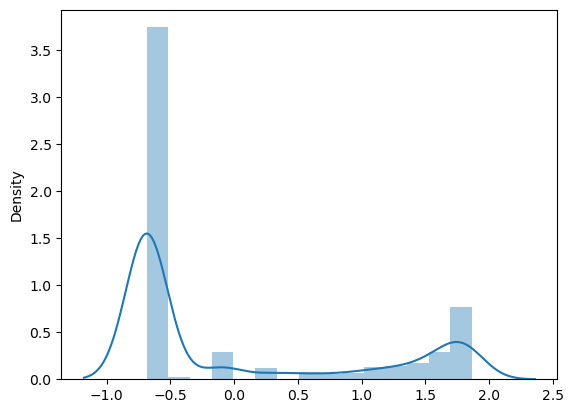

In [578]:
sns.distplot(pt.fit_transform(full_dataset[['Rainfall']]))

<Axes: xlabel='Rainfall', ylabel='Density'>

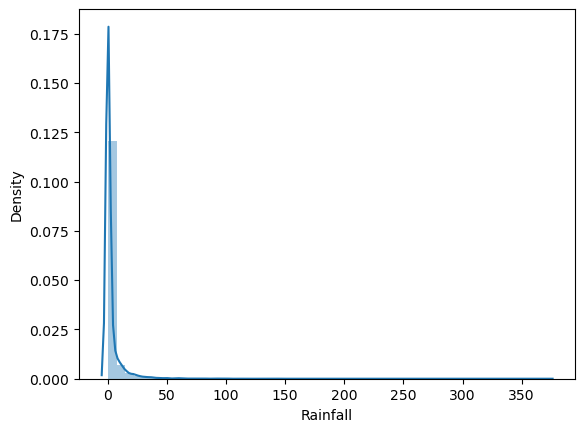

In [579]:
sns.distplot(full_dataset['Rainfall'])

In [580]:
y1=pt.fit_transform(full_dataset[['Rainfall']])

<Axes: ylabel='Density'>

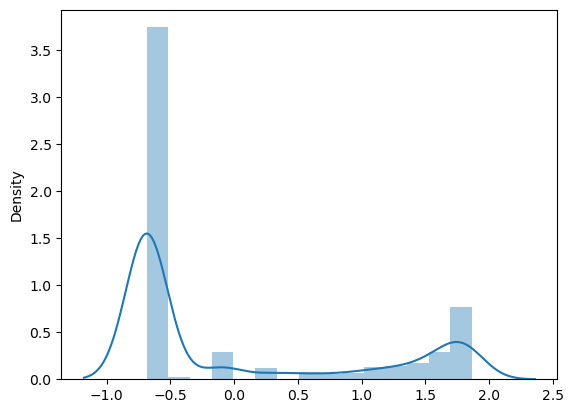

In [582]:
sns.distplot(y1)

In [584]:
#Let us make the model with transformed labels
maxACC=0
maxrs=0
for i in range(1,200):
    lr=LinearRegression()
    x_train,x_test,y_train,y_test=train_test_split(x,y1,test_size=0.3,random_state=i)
    lr.fit(x_train,y_train)
    pred=lr.predict(x_test)
    acc=r2_score(y_test,pred)
    if acc>maxACC:
        maxACC=acc
        maxrs=i
print(maxACC,maxrs)

0.9084626607695586 162


In [585]:
x_train,x_test,y_train,y_test=train_test_split(x,y1,test_size=0.3,random_state=maxrs)

In [587]:
accuracy={}
for model in models:
    model.fit(x_train,y_train)
    pred=model.predict(x_test)
    accuracy[model]=r2_score(y_test,pred)
accuracy

{RandomForestRegressor(): 0.9305141598340145,
 ExtraTreesRegressor(): 0.9329578173544352,
 LinearRegression(): 0.9084626607695586,
 GradientBoostingRegressor(): 0.9133519277804318,
 AdaBoostRegressor(): 0.8621616506453855,
 BaggingRegressor(): 0.9248718140823444,
 Ridge(): 0.9083487066875884,
 LassoCV(): 0.9091482399970473,
 DecisionTreeRegressor(): 0.84418500361939}

In [591]:
#let us do the tuning for the extratree which has been by far the best model
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import ExtraTreesRegressor

# Define the parameter grid
param_grid = {
    'n_estimators': [50, 100],
    'max_depth': [None, 10],
    'min_samples_split': [2, 5],
    'min_samples_leaf': [1, 2],
    'max_features': ['auto', 'sqrt'],
    'bootstrap': [True, False]
}
# Create an ExtraTreeRegressor instance
extra_tree = ExtraTreesRegressor()

# Perform grid search with cross-validation
grid_search = GridSearchCV(extra_tree, param_grid, cv=5, scoring='neg_mean_squared_error')

# Fit the grid search to the data
grid_search.fit(x,y1)

# Get the best parameters and best score
best_params = grid_search.best_params_
best_score = grid_search.best_score_

print("Best Parameters:", best_params)

Best Parameters: {'bootstrap': False, 'max_depth': None, 'max_features': 'sqrt', 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 100}


In [594]:
model=ExtraTreesRegressor(bootstrap=False,max_depth=None,max_features='sqrt',min_samples_leaf=1,
                         min_samples_split=2,n_estimators=100)

In [600]:
model.fit(x_train,y_train)
pred=model.predict(x_test)
r2_score(y_test,pred)

0.9329368184640247

So it gave an accuracy which is 1% less than the best model we had.

In [602]:
y_pred=model.predict(x_train)
r2_score(y_train,y_pred)

1.0

So our regressrion model for the rainfall prediction has been done now below are the conclusions.

Conclusions.
1.At fist we treated the nulls in the columns and did the analysis of their relation with the labels. In this way we deleted the 
  non significant rows which had no contribution for predicting the labels.
1. We made the models for this rainfall label using 3 different techniques and ways.
   1.We treated the outliers and delete them and made the model using this way and the best performing model was the
   extratree regressor which had an accuracy of 0.94 after the tuning.
   2. We treated the outliers and delete them and apart from this we also treated the columns with high variance inflation
    factor score and which had a very high correlation score. This time also the extra tree regressor was the best model this
    time it had a accuracy of 0.935 which is 0.5% less than the best model.
   3.In the 3rd way we did not considered any multicollinearity and variance and used all the columns and rows and this time the
   extra tree had the best accuracy 0f 0.93 which is 1% less than the best model.
2. The best performing model with the best accuracy was:-
   The extratree regressor with an r2 score of 0.94, the mean_absolue error of 0.14 and the mean_squared error of 0.06.

In [603]:
print('*'*100)
print('THANKS')
print('*'*100)

****************************************************************************************************
THANKS
****************************************************************************************************


Now let us make the classification label.

In [614]:
full_dataset

Raintommorow1  Raintommorow2  Raintoday1  Raintoday2  cloud1  cloud2  \
0               1.0            0.0         1.0         0.0     0.0     0.0   
1               1.0            0.0         1.0         0.0     0.0     0.0   
2               1.0            0.0         1.0         0.0     0.0     0.0   
3               1.0            0.0         1.0         0.0     0.0     0.0   
4               1.0            0.0         1.0         0.0     0.0     0.0   
...             ...            ...         ...         ...     ...     ...   
8420            1.0            0.0         1.0         0.0     0.0     0.0   
8421            1.0            0.0         1.0         0.0     0.0     0.0   
8422            1.0            0.0         1.0         0.0     0.0     0.0   
8423            1.0            0.0         1.0         0.0     0.0     0.0   
8424            0.0            1.0         1.0         0.0     0.0     0.0   

      cloud3  cloud4  cloud5  cloud6  cloud7  cloud8  cloud9  cloud1  cloud2  \
0        0.0     0.0     0.0     1.0     0.0     0.0     0.0     0.0     0.0   
1        0.0     0.0     0.0     1.0     0.0     0.0     0.0     0.0     1.0   
2        1.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0   
3        0.0     0.0     1.0     0.0     0.0     0.0     0.0     1.0     0.0   
4        0.0     0.0     0.0     0.0     0.0     0.0     1.0     0.0     0.0   
...      ...     ...     ...     ...     ...     ...     ...     ...     ...   
8420     1.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0   
8421     1.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0   
8422     0.0     1.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0   
8423     1.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0   
8424     0.0     0.0     0.0     0.0     0.0     0.0     1.0     0.0     0.0   

      cloud3  cloud4  cloud5  cloud6  cloud7  cloud8  cloud9  wind1  wind2  \
0        0.0     0.0     0.0     0.0     0.0     0.0     1.0    0.0    0.0   
1        0.0     0.0     0.0     0.0     0.0     0.0     0.0    0.0    0.0   
2        1.0     0.0     0.0     0.0     0.0     0.0     0.0    0.0    0.0   
3        0.0     0.0     0.0     0.0     0.0     0.0     0.0    1.0    0.0   
4        0.0     0.0     0.0     0.0     0.0     1.0     0.0    0.0    0.0   
...      ...     ...     ...     ...     ...     ...     ...    ...    ...   
8420     0.0     0.0     0.0     0.0     1.0     0.0     0.0    0.0    1.0   
8421     0.0     0.0     0.0     0.0     1.0     0.0     0.0    0.0    0.0   
8422     0.0     0.0     0.0     0.0     0.0     1.0     0.0    0.0    0.0   
8423     0.0     1.0     0.0     0.0     0.0     0.0     0.0    0.0    0.0   
8424     0.0     0.0     0.0     0.0     0.0     0.0     1.0    0.0    0.0   

      wind3  wind4  wind5  wind6  wind7  wind8  wind9  wind10  wind11  wind12  \
0       0.0    0.0    0.0    0.0    0.0    0.0    0.0     0.0     0.0     0.0   
1       0.0    0.0    0.0    0.0    0.0    0.0    0.0     0.0     0.0     0.0   
2       0.0    0.0    0.0    0.0    0.0    0.0    0.0     0.0     0.0     0.0   
3       0.0    0.0    0.0    0.0    0.0    0.0    0.0     0.0     0.0     0.0   
4       0.0    0.0    0.0    0.0    0.0    1.0    0.0     0.0     0.0     0.0   
...     ...    ...    ...    ...    ...    ...    ...     ...     ...     ...   
8420    0.0    0.0    0.0    0.0    0.0    0.0    0.0     0.0     0.0     0.0   
8421    0.0    1.0    0.0    0.0    0.0    0.0    0.0     0.0     0.0     0.0   
8422    0.0    0.0    0.0    0.0    0.0    0.0    0.0     0.0     0.0     0.0   
8423    0.0    1.0    0.0    0.0    0.0    0.0    0.0     0.0     0.0     0.0   
8424    1.0    0.0    0.0    0.0    0.0    0.0    0.0     0.0     0.0     0.0   

      wind13  wind14  wind15  wind16  wind1  wind2  wind3  wind4  wind5  \
0        0.0     0.0     1.0     0.0    0.0    0.0    0.0    0.0    0.0   
1        0.0     0.0     0.0     1.0    0.0    0

In [616]:
label_categorical

0       0.0
1       0.0
2       0.0
3       0.0
4       0.0
       ... 
8109    0.0
8110    0.0
8111    0.0
8112    0.0
8113    1.0
Name: RainTomorrow, Length: 8114, dtype: float64

In [617]:
data

Raintommorow1  Raintommorow2  Raintoday1  Raintoday2  cloud1  cloud2  \
0               1.0            0.0         1.0         0.0     0.0     0.0   
1               1.0            0.0         1.0         0.0     0.0     0.0   
2               1.0            0.0         1.0         0.0     0.0     0.0   
3               1.0            0.0         1.0         0.0     0.0     0.0   
4               1.0            0.0         1.0         0.0     0.0     0.0   
...             ...            ...         ...         ...     ...     ...   
8109            1.0            0.0         1.0         0.0     0.0     0.0   
8110            1.0            0.0         1.0         0.0     0.0     0.0   
8111            1.0            0.0         1.0         0.0     0.0     0.0   
8112            1.0            0.0         1.0         0.0     0.0     0.0   
8113            0.0            1.0         1.0         0.0     0.0     0.0   

      cloud3  cloud4  cloud5  cloud6  cloud7  cloud8  cloud9  cloud1  cloud2  \
0        0.0     0.0     0.0     1.0     0.0     0.0     0.0     0.0     0.0   
1        0.0     0.0     0.0     1.0     0.0     0.0     0.0     0.0     1.0   
2        1.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0   
3        0.0     0.0     1.0     0.0     0.0     0.0     0.0     1.0     0.0   
4        0.0     0.0     0.0     0.0     0.0     0.0     1.0     0.0     0.0   
...      ...     ...     ...     ...     ...     ...     ...     ...     ...   
8109     1.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0   
8110     1.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0   
8111     0.0     1.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0   
8112     1.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0   
8113     0.0     0.0     0.0     0.0     0.0     0.0     1.0     0.0     0.0   

      cloud3  cloud4  cloud5  cloud6  cloud7  cloud8  cloud9  wind1  wind2  \
0        0.0     0.0     0.0     0.0     0.0     0.0     1.0    0.0    0.0   
1        0.0     0.0     0.0     0.0     0.0     0.0     0.0    0.0    0.0   
2        1.0     0.0     0.0     0.0     0.0     0.0     0.0    0.0    0.0   
3        0.0     0.0     0.0     0.0     0.0     0.0     0.0    1.0    0.0   
4        0.0     0.0     0.0     0.0     0.0     1.0     0.0    0.0    0.0   
...      ...     ...     ...     ...     ...     ...     ...    ...    ...   
8109     0.0     0.0     0.0     0.0     1.0     0.0     0.0    0.0    1.0   
8110     0.0     0.0     0.0     0.0     1.0     0.0     0.0    0.0    0.0   
8111     0.0     0.0     0.0     0.0     0.0     1.0     0.0    0.0    0.0   
8112     0.0     1.0     0.0     0.0     0.0     0.0     0.0    0.0    0.0   
8113     0.0     0.0     0.0     0.0     0.0     0.0     1.0    0.0    0.0   

      wind3  wind4  wind5  wind6  wind7  wind8  wind9  wind10  wind11  wind12  \
0       0.0    0.0    0.0    0.0    0.0    0.0    0.0     0.0     0.0     0.0   
1       0.0    0.0    0.0    0.0    0.0    0.0    0.0     0.0     0.0     0.0   
2       0.0    0.0    0.0    0.0    0.0    0.0    0.0     0.0     0.0     0.0   
3       0.0    0.0    0.0    0.0    0.0    0.0    0.0     0.0     0.0     0.0   
4       0.0    0.0    0.0    0.0    0.0    1.0    0.0     0.0     0.0     0.0   
...     ...    ...    ...    ...    ...    ...    ...     ...     ...     ...   
8109    0.0    0.0    0.0    0.0    0.0    0.0    0.0     0.0     0.0     0.0   
8110    0.0    1.0    0.0    0.0    0.0    0.0    0.0     0.0     0.0     0.0   
8111    0.0    0.0    0.0    0.0    0.0    0.0    0.0     0.0     0.0     0.0   
8112    0.0    1.0    0.0    0.0    0.0    0.0    0.0     0.0     0.0     0.0   
8113    1.0    0.0    0.0    0.0    0.0    0.0    0.0     0.0     0.0     0.0   

      wind13  wind14  wind15  wind16  wind1  wind2  wind3  wind4  wind5  \
0        0.0     0.0     1.0     0.0    0.0    0.0    0.0    0.0    0.0   
1        0.0     0.0     0.0     1.0    0.0    0

#So for making the categorical model fist of all we will have to delete the one hit encoded raintommorow1 and raintommorow2

In [619]:
data=data.drop(columns=['Raintommorow1','Raintommorow2'])
data

Raintoday1  Raintoday2  cloud1  cloud2  cloud3  cloud4  cloud5  cloud6  \
0            1.0         0.0     0.0     0.0     0.0     0.0     0.0     1.0   
1            1.0         0.0     0.0     0.0     0.0     0.0     0.0     1.0   
2            1.0         0.0     0.0     0.0     1.0     0.0     0.0     0.0   
3            1.0         0.0     0.0     0.0     0.0     0.0     1.0     0.0   
4            1.0         0.0     0.0     0.0     0.0     0.0     0.0     0.0   
...          ...         ...     ...     ...     ...     ...     ...     ...   
8109         1.0         0.0     0.0     0.0     1.0     0.0     0.0     0.0   
8110         1.0         0.0     0.0     0.0     1.0     0.0     0.0     0.0   
8111         1.0         0.0     0.0     0.0     0.0     1.0     0.0     0.0   
8112         1.0         0.0     0.0     0.0     1.0     0.0     0.0     0.0   
8113         1.0         0.0     0.0     0.0     0.0     0.0     0.0     0.0   

      cloud7  cloud8  cloud9  cloud1  cloud2  cloud3  cloud4  cloud5  cloud6  \
0        0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0   
1        0.0     0.0     0.0     0.0     1.0     0.0     0.0     0.0     0.0   
2        0.0     0.0     0.0     0.0     0.0     1.0     0.0     0.0     0.0   
3        0.0     0.0     0.0     1.0     0.0     0.0     0.0     0.0     0.0   
4        0.0     0.0     1.0     0.0     0.0     0.0     0.0     0.0     0.0   
...      ...     ...     ...     ...     ...     ...     ...     ...     ...   
8109     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0   
8110     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0   
8111     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0   
8112     0.0     0.0     0.0     0.0     0.0     0.0     1.0     0.0     0.0   
8113     0.0     0.0     1.0     0.0     0.0     0.0     0.0     0.0     0.0   

      cloud7  cloud8  cloud9  wind1  wind2  wind3  wind4  wind5  wind6  wind7  \
0        0.0     0.0     1.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0   
1        0.0     0.0     0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0   
2        0.0     0.0     0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0   
3        0.0     0.0     0.0    1.0    0.0    0.0    0.0    0.0    0.0    0.0   
4        0.0     1.0     0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0   
...      ...     ...     ...    ...    ...    ...    ...    ...    ...    ...   
8109     1.0     0.0     0.0    0.0    1.0    0.0    0.0    0.0    0.0    0.0   
8110     1.0     0.0     0.0    0.0    0.0    0.0    1.0    0.0    0.0    0.0   
8111     0.0     1.0     0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0   
8112     0.0     0.0     0.0    0.0    0.0    0.0    1.0    0.0    0.0    0.0   
8113     0.0     0.0     1.0    0.0    0.0    1.0    0.0    0.0    0.0    0.0   

      wind8  wind9  wind10  wind11  wind12  wind13  wind14  wind15  wind16  \
0       0.0    0.0     0.0     0.0     0.0     0.0     0.0     1.0     0.0   
1       0.0    0.0     0.0     0.0     0.0     0.0     0.0     0.0     1.0   
2       0.0    0.0     0.0     0.0     0.0     0.0     0.0     0.0     1.0   
3       0.0    0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0   
4       1.0    0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0   
...     ...    ...     ...     ...     ...     ...     ...     ...     ...   
8109    0.0    0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0   
8110    0.0    0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0   
8111    0.0    0.0     0.0     0.0     0.0     0.0     0.0     1.0     0.0   
8112    0.0    0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0   
8113    0.0    0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0   

      wind1  wind2  wind3  wind4  wind5  wind6  wind7  wind8  wind9  wind10  \
0       0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0     0.0   
1       0.0    0

So here we do not have to split anything because these all are the features for our model and the label has been separated already. We will use the transformed  rainfall columns here also as it has a better accuracy.

In [623]:
data['Rainfall']=pt.fit_transform(data[['Rainfall']])

In [624]:
data

Raintoday1  Raintoday2  cloud1  cloud2  cloud3  cloud4  cloud5  cloud6  \
0            1.0         0.0     0.0     0.0     0.0     0.0     0.0     1.0   
1            1.0         0.0     0.0     0.0     0.0     0.0     0.0     1.0   
2            1.0         0.0     0.0     0.0     1.0     0.0     0.0     0.0   
3            1.0         0.0     0.0     0.0     0.0     0.0     1.0     0.0   
4            1.0         0.0     0.0     0.0     0.0     0.0     0.0     0.0   
...          ...         ...     ...     ...     ...     ...     ...     ...   
8109         1.0         0.0     0.0     0.0     1.0     0.0     0.0     0.0   
8110         1.0         0.0     0.0     0.0     1.0     0.0     0.0     0.0   
8111         1.0         0.0     0.0     0.0     0.0     1.0     0.0     0.0   
8112         1.0         0.0     0.0     0.0     1.0     0.0     0.0     0.0   
8113         1.0         0.0     0.0     0.0     0.0     0.0     0.0     0.0   

      cloud7  cloud8  cloud9  cloud1  cloud2  cloud3  cloud4  cloud5  cloud6  \
0        0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0   
1        0.0     0.0     0.0     0.0     1.0     0.0     0.0     0.0     0.0   
2        0.0     0.0     0.0     0.0     0.0     1.0     0.0     0.0     0.0   
3        0.0     0.0     0.0     1.0     0.0     0.0     0.0     0.0     0.0   
4        0.0     0.0     1.0     0.0     0.0     0.0     0.0     0.0     0.0   
...      ...     ...     ...     ...     ...     ...     ...     ...     ...   
8109     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0   
8110     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0   
8111     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0   
8112     0.0     0.0     0.0     0.0     0.0     0.0     1.0     0.0     0.0   
8113     0.0     0.0     1.0     0.0     0.0     0.0     0.0     0.0     0.0   

      cloud7  cloud8  cloud9  wind1  wind2  wind3  wind4  wind5  wind6  wind7  \
0        0.0     0.0     1.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0   
1        0.0     0.0     0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0   
2        0.0     0.0     0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0   
3        0.0     0.0     0.0    1.0    0.0    0.0    0.0    0.0    0.0    0.0   
4        0.0     1.0     0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0   
...      ...     ...     ...    ...    ...    ...    ...    ...    ...    ...   
8109     1.0     0.0     0.0    0.0    1.0    0.0    0.0    0.0    0.0    0.0   
8110     1.0     0.0     0.0    0.0    0.0    0.0    1.0    0.0    0.0    0.0   
8111     0.0     1.0     0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0   
8112     0.0     0.0     0.0    0.0    0.0    0.0    1.0    0.0    0.0    0.0   
8113     0.0     0.0     1.0    0.0    0.0    1.0    0.0    0.0    0.0    0.0   

      wind8  wind9  wind10  wind11  wind12  wind13  wind14  wind15  wind16  \
0       0.0    0.0     0.0     0.0     0.0     0.0     0.0     1.0     0.0   
1       0.0    0.0     0.0     0.0     0.0     0.0     0.0     0.0     1.0   
2       0.0    0.0     0.0     0.0     0.0     0.0     0.0     0.0     1.0   
3       0.0    0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0   
4       1.0    0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0   
...     ...    ...     ...     ...     ...     ...     ...     ...     ...   
8109    0.0    0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0   
8110    0.0    0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0   
8111    0.0    0.0     0.0     0.0     0.0     0.0     0.0     1.0     0.0   
8112    0.0    0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0   
8113    0.0    0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0   

      wind1  wind2  wind3  wind4  wind5  wind6  wind7  wind8  wind9  wind10  \
0       0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0     0.0   
1       0.0    0

In [626]:
#After this we have to standarsize the continous columns
data.columns

Index(['Raintoday1', 'Raintoday2', 'cloud1', 'cloud2', 'cloud3', 'cloud4',
       'cloud5', 'cloud6', 'cloud7', 'cloud8', 'cloud9', 'cloud1', 'cloud2',
       'cloud3', 'cloud4', 'cloud5', 'cloud6', 'cloud7', 'cloud8', 'cloud9',
       'wind1', 'wind2', 'wind3', 'wind4', 'wind5', 'wind6', 'wind7', 'wind8',
       'wind9', 'wind10', 'wind11', 'wind12', 'wind13', 'wind14', 'wind15',
       'wind16', 'wind1', 'wind2', 'wind3', 'wind4', 'wind5', 'wind6', 'wind7',
       'wind8', 'wind9', 'wind10', 'wind11', 'wind12', 'wind13', 'wind14',
       'wind15', 'wind16', 'wind1', 'wind2', 'wind3', 'wind4', 'wind5',
       'wind6', 'wind7', 'wind8', 'wind9', 'wind10', 'wind11', 'wind12',
       'wind13', 'wind14', 'wind15', 'wind16', 'loc1', 'loc2', 'loc3', 'loc4',
       'loc5', 'loc6', 'loc7', 'loc8', 'loc9', 'loc10', 'loc11', 'MinTemp',
       'MaxTemp', 'Rainfall', 'Evaporation', 'Sunshine', 'WindGustSpeed',
       'WindSpeed9am', 'WindSpeed3pm', 'Humidity9am', 'Humidity3pm',
       'Pressure9a

In [627]:
continous_columns=['MinTemp',
       'MaxTemp', 'Rainfall', 'Evaporation', 'Sunshine', 'WindGustSpeed',
       'WindSpeed9am', 'WindSpeed3pm', 'Humidity9am', 'Humidity3pm',
       'Pressure9am', 'Pressure3pm', 'Temp9am', 'Temp3pm', 'Day', 'Month',
       'Year']

In [628]:
len(continous_columns)

17

In [629]:
continous_scaled=scaler.fit_transform(data[continous_columns])
continous_scaled=pd.DataFrame(continous_scaled,columns=continous_columns)
continous_scaled

MinTemp   MaxTemp  Rainfall  Evaporation  Sunshine  WindGustSpeed  \
0     0.051812 -0.137499  0.567667     0.363044  1.151836       0.351187   
1    -1.060077  0.229613 -0.689207     0.402819  1.168743       0.351187   
2    -0.040845  0.329735 -0.689207    -0.114253  0.915140       0.502583   
3    -0.726510  0.713534 -0.689207     0.747534  1.337811      -1.162766   
4     0.811604  1.431070  0.924310     1.662354  1.056031       0.124094   
...        ...       ...       ...          ...       ...            ...   
8109 -1.912526 -0.054064 -0.689207    -0.949524  0.458656      -0.632883   
8110 -1.764274  0.262987 -0.689207    -0.976041  0.486834      -1.314162   
8111 -1.430707  0.529978 -0.689207    -0.472226  0.340308      -0.178697   
8112 -0.985951  0.546664 -0.689207    -0.671100  0.216325      -0.859976   
8113  0.329785 -1.228822 -0.689207    -0.180545 -1.992833      -0.496627   

      WindSpeed9am  WindSpeed3pm  Humidity9am  Humidity3pm  Pressure9am  \
0         0.705254      0.639574     0.166581    -1.629279    -1.605301   
1        -0.990288      0.423302    -1.464603    -1.464200    -1.154085   
2         0.599283      0.855845    -1.827088    -1.189068    -1.620860   
3        -0.248488     -0.982463    -1.404188    -1.959437    -0.064943   
4        -0.672374      0.207031     0.831137    -1.023989    -1.122966   
...            ...           ...          ...          ...          ...   
8109     -0.036545     -0.766192    -1.041703    -1.519226     1.024199   
8110     -0.036545     -0.982463    -0.739632    -1.684305     0.853048   
8111     -0.460431     -0.982463    -0.920875    -1.519226     0.464069   
8112     -0.036545     -1.198735    -1.041703    -1.519226     0.215122   
8113      0.387340     -0.117377    -0.377147    -0.858910     0.339595   

      Pressure3pm   Temp9am   Temp3pm       Day     Month      Year  
0       -1.339027 -0.135698 -0.087026 -1.673681  1.641111 -1.660303  
1       -1.228594 -0.081906  0.341436 -1.560018  1.641111 -1.660303  
2       -1.086608  0.599467  0.152913 -1.446354  1.641111 -1.660303  
3       -0.439784  0.079472  0.718483 -1.332691  1.641111 -1.660303  
4       -1.512565  0.025680  1.266915 -1.219028  1.641111 -1.660303  
...           ...       ...       ...       ...       ...       ...  
8109     0.743429 -1.354996  0.015805  0.599582 -0.117663  1.997613  
8110     0.554115 -1.211549  0.375713  0.713245 -0.117663  1.997613  
8111     0.191263 -0.924655  0.649929  0.826909 -0.117663  1.997613  
8112     0.143934 -0.458453  0.632790  0.940572 -0.117663  1.997613  
8113     0.364801 -0.476384 -0.241272  1.054235 -0.117663  1.997613  

[8114 rows x 17 columns]

In [632]:
data=data.drop(columns=continous_columns)

In [634]:
data=pd.concat([data,continous_scaled],axis=1)

In [635]:
data

Raintoday1  Raintoday2  cloud1  cloud2  cloud3  cloud4  cloud5  cloud6  \
0            1.0         0.0     0.0     0.0     0.0     0.0     0.0     1.0   
1            1.0         0.0     0.0     0.0     0.0     0.0     0.0     1.0   
2            1.0         0.0     0.0     0.0     1.0     0.0     0.0     0.0   
3            1.0         0.0     0.0     0.0     0.0     0.0     1.0     0.0   
4            1.0         0.0     0.0     0.0     0.0     0.0     0.0     0.0   
...          ...         ...     ...     ...     ...     ...     ...     ...   
8109         1.0         0.0     0.0     0.0     1.0     0.0     0.0     0.0   
8110         1.0         0.0     0.0     0.0     1.0     0.0     0.0     0.0   
8111         1.0         0.0     0.0     0.0     0.0     1.0     0.0     0.0   
8112         1.0         0.0     0.0     0.0     1.0     0.0     0.0     0.0   
8113         1.0         0.0     0.0     0.0     0.0     0.0     0.0     0.0   

      cloud7  cloud8  cloud9  cloud1  cloud2  cloud3  cloud4  cloud5  cloud6  \
0        0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0   
1        0.0     0.0     0.0     0.0     1.0     0.0     0.0     0.0     0.0   
2        0.0     0.0     0.0     0.0     0.0     1.0     0.0     0.0     0.0   
3        0.0     0.0     0.0     1.0     0.0     0.0     0.0     0.0     0.0   
4        0.0     0.0     1.0     0.0     0.0     0.0     0.0     0.0     0.0   
...      ...     ...     ...     ...     ...     ...     ...     ...     ...   
8109     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0   
8110     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0   
8111     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0   
8112     0.0     0.0     0.0     0.0     0.0     0.0     1.0     0.0     0.0   
8113     0.0     0.0     1.0     0.0     0.0     0.0     0.0     0.0     0.0   

      cloud7  cloud8  cloud9  wind1  wind2  wind3  wind4  wind5  wind6  wind7  \
0        0.0     0.0     1.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0   
1        0.0     0.0     0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0   
2        0.0     0.0     0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0   
3        0.0     0.0     0.0    1.0    0.0    0.0    0.0    0.0    0.0    0.0   
4        0.0     1.0     0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0   
...      ...     ...     ...    ...    ...    ...    ...    ...    ...    ...   
8109     1.0     0.0     0.0    0.0    1.0    0.0    0.0    0.0    0.0    0.0   
8110     1.0     0.0     0.0    0.0    0.0    0.0    1.0    0.0    0.0    0.0   
8111     0.0     1.0     0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0   
8112     0.0     0.0     0.0    0.0    0.0    0.0    1.0    0.0    0.0    0.0   
8113     0.0     0.0     1.0    0.0    0.0    1.0    0.0    0.0    0.0    0.0   

      wind8  wind9  wind10  wind11  wind12  wind13  wind14  wind15  wind16  \
0       0.0    0.0     0.0     0.0     0.0     0.0     0.0     1.0     0.0   
1       0.0    0.0     0.0     0.0     0.0     0.0     0.0     0.0     1.0   
2       0.0    0.0     0.0     0.0     0.0     0.0     0.0     0.0     1.0   
3       0.0    0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0   
4       1.0    0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0   
...     ...    ...     ...     ...     ...     ...     ...     ...     ...   
8109    0.0    0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0   
8110    0.0    0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0   
8111    0.0    0.0     0.0     0.0     0.0     0.0     0.0     1.0     0.0   
8112    0.0    0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0   
8113    0.0    0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0   

      wind1  wind2  wind3  wind4  wind5  wind6  wind7  wind8  wind9  wind10  \
0       0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0     0.0   
1       0.0    0

In [642]:
full_dataset

Raintommorow1  Raintommorow2  Raintoday1  Raintoday2  cloud1  cloud2  \
0               1.0            0.0         1.0         0.0     0.0     0.0   
1               1.0            0.0         1.0         0.0     0.0     0.0   
2               1.0            0.0         1.0         0.0     0.0     0.0   
3               1.0            0.0         1.0         0.0     0.0     0.0   
4               1.0            0.0         1.0         0.0     0.0     0.0   
...             ...            ...         ...         ...     ...     ...   
8420            1.0            0.0         1.0         0.0     0.0     0.0   
8421            1.0            0.0         1.0         0.0     0.0     0.0   
8422            1.0            0.0         1.0         0.0     0.0     0.0   
8423            1.0            0.0         1.0         0.0     0.0     0.0   
8424            0.0            1.0         1.0         0.0     0.0     0.0   

      cloud3  cloud4  cloud5  cloud6  cloud7  cloud8  cloud9  cloud1  cloud2  \
0        0.0     0.0     0.0     1.0     0.0     0.0     0.0     0.0     0.0   
1        0.0     0.0     0.0     1.0     0.0     0.0     0.0     0.0     1.0   
2        1.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0   
3        0.0     0.0     1.0     0.0     0.0     0.0     0.0     1.0     0.0   
4        0.0     0.0     0.0     0.0     0.0     0.0     1.0     0.0     0.0   
...      ...     ...     ...     ...     ...     ...     ...     ...     ...   
8420     1.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0   
8421     1.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0   
8422     0.0     1.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0   
8423     1.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0   
8424     0.0     0.0     0.0     0.0     0.0     0.0     1.0     0.0     0.0   

      cloud3  cloud4  cloud5  cloud6  cloud7  cloud8  cloud9  wind1  wind2  \
0        0.0     0.0     0.0     0.0     0.0     0.0     1.0    0.0    0.0   
1        0.0     0.0     0.0     0.0     0.0     0.0     0.0    0.0    0.0   
2        1.0     0.0     0.0     0.0     0.0     0.0     0.0    0.0    0.0   
3        0.0     0.0     0.0     0.0     0.0     0.0     0.0    1.0    0.0   
4        0.0     0.0     0.0     0.0     0.0     1.0     0.0    0.0    0.0   
...      ...     ...     ...     ...     ...     ...     ...    ...    ...   
8420     0.0     0.0     0.0     0.0     1.0     0.0     0.0    0.0    1.0   
8421     0.0     0.0     0.0     0.0     1.0     0.0     0.0    0.0    0.0   
8422     0.0     0.0     0.0     0.0     0.0     1.0     0.0    0.0    0.0   
8423     0.0     1.0     0.0     0.0     0.0     0.0     0.0    0.0    0.0   
8424     0.0     0.0     0.0     0.0     0.0     0.0     1.0    0.0    0.0   

      wind3  wind4  wind5  wind6  wind7  wind8  wind9  wind10  wind11  wind12  \
0       0.0    0.0    0.0    0.0    0.0    0.0    0.0     0.0     0.0     0.0   
1       0.0    0.0    0.0    0.0    0.0    0.0    0.0     0.0     0.0     0.0   
2       0.0    0.0    0.0    0.0    0.0    0.0    0.0     0.0     0.0     0.0   
3       0.0    0.0    0.0    0.0    0.0    0.0    0.0     0.0     0.0     0.0   
4       0.0    0.0    0.0    0.0    0.0    1.0    0.0     0.0     0.0     0.0   
...     ...    ...    ...    ...    ...    ...    ...     ...     ...     ...   
8420    0.0    0.0    0.0    0.0    0.0    0.0    0.0     0.0     0.0     0.0   
8421    0.0    1.0    0.0    0.0    0.0    0.0    0.0     0.0     0.0     0.0   
8422    0.0    0.0    0.0    0.0    0.0    0.0    0.0     0.0     0.0     0.0   
8423    0.0    1.0    0.0    0.0    0.0    0.0    0.0     0.0     0.0     0.0   
8424    1.0    0.0    0.0    0.0    0.0    0.0    0.0     0.0     0.0     0.0   

      wind13  wind14  wind15  wind16  wind1  wind2  wind3  wind4  wind5  \
0        0.0     0.0     1.0     0.0    0.0    0.0    0.0    0.0    0.0   
1        0.0     0.0     0.0     1.0    0.0    0

In [643]:
full_dataset.columns

Index(['Raintommorow1', 'Raintommorow2', 'Raintoday1', 'Raintoday2', 'cloud1',
       'cloud2', 'cloud3', 'cloud4', 'cloud5', 'cloud6', 'cloud7', 'cloud8',
       'cloud9', 'cloud1', 'cloud2', 'cloud3', 'cloud4', 'cloud5', 'cloud6',
       'cloud7', 'cloud8', 'cloud9', 'wind1', 'wind2', 'wind3', 'wind4',
       'wind5', 'wind6', 'wind7', 'wind8', 'wind9', 'wind10', 'wind11',
       'wind12', 'wind13', 'wind14', 'wind15', 'wind16', 'wind1', 'wind2',
       'wind3', 'wind4', 'wind5', 'wind6', 'wind7', 'wind8', 'wind9', 'wind10',
       'wind11', 'wind12', 'wind13', 'wind14', 'wind15', 'wind16', 'wind1',
       'wind2', 'wind3', 'wind4', 'wind5', 'wind6', 'wind7', 'wind8', 'wind9',
       'wind10', 'wind11', 'wind12', 'wind13', 'wind14', 'wind15', 'wind16',
       'loc1', 'loc2', 'loc3', 'loc4', 'loc5', 'loc6', 'loc7', 'loc8', 'loc9',
       'loc10', 'loc11', 'MinTemp', 'MaxTemp', 'Rainfall', 'Evaporation',
       'Sunshine', 'WindGustSpeed', 'WindSpeed9am', 'WindSpeed3pm',
       'Humidi

In [660]:
continous_columns=['MinTemp', 'MaxTemp',  'Evaporation',
       'Sunshine', 'WindGustSpeed', 'WindSpeed9am', 'WindSpeed3pm',
       'Humidity9am', 'Humidity3pm', 'Pressure9am', 'Pressure3pm', 'Temp9am',
       'Temp3pm', 'Day', 'Month', 'Year']

In [661]:
len(continous_columns)

16

In [662]:
Zscore=np.abs(zscore(full_dataset[continous_columns]))

In [663]:
index=np.where(Zscore>3)[0]

In [665]:
len(index)

224

In [670]:
index

array([  54,   59,  323,  341,  369,  376,  385,  389,  396,  401,  408,
        432,  711,  732,  760,  765, 1123, 1566, 1576, 1600, 1613, 1643,
       1648, 1689, 1709, 1946, 1960, 1981, 1981, 1990, 2005, 2025, 2193,
       2214, 2418, 2427, 2429, 2433, 2438, 2447, 2461, 2482, 2498, 2500,
       2514, 2522, 2723, 2736, 2752, 2789, 2802, 2837, 2877, 2893, 2895,
       2910, 2913, 2922, 2922, 3000, 3007, 3021, 3023, 3037, 3044, 3051,
       3088, 3099, 3100, 3114, 3114, 3142, 3142, 3152, 3164, 3198, 3281,
       3286, 3339, 3433, 3434, 3442, 3451, 3502, 3515, 3531, 3568, 3581,
       3616, 3656, 3672, 3674, 3689, 3692, 3701, 3701, 3779, 3786, 3800,
       3802, 3816, 3823, 3830, 3867, 3878, 3879, 3893, 3893, 3921, 3921,
       3931, 3943, 3977, 4060, 4065, 4118, 4212, 4213, 4221, 4230, 4277,
       4279, 4297, 4301, 4313, 4339, 4346, 4353, 4354, 4369, 4399, 4399,
       4400, 4417, 4549, 4647, 4647, 4668, 4693, 4694, 4700, 4756, 4800,
       4836, 4868, 4869, 4870, 4902, 4957, 4992, 50

In [668]:
Zscore.iloc[7580]

MinTemp          1.204545
MaxTemp          2.353589
Evaporation      3.382486
Sunshine         1.590260
WindGustSpeed    1.343678
WindSpeed9am     2.302853
WindSpeed3pm     0.640139
Humidity9am      1.517330
Humidity3pm      1.680983
Pressure9am      1.393432
Pressure3pm      1.719078
Temp9am          1.490950
Temp3pm          2.506058
Day              0.599927
Month            1.589127
Year             0.780002
Name: 7993, dtype: float64

In [671]:
full_dataset

Raintommorow1  Raintommorow2  Raintoday1  Raintoday2  cloud1  cloud2  \
0               1.0            0.0         1.0         0.0     0.0     0.0   
1               1.0            0.0         1.0         0.0     0.0     0.0   
2               1.0            0.0         1.0         0.0     0.0     0.0   
3               1.0            0.0         1.0         0.0     0.0     0.0   
4               1.0            0.0         1.0         0.0     0.0     0.0   
...             ...            ...         ...         ...     ...     ...   
8420            1.0            0.0         1.0         0.0     0.0     0.0   
8421            1.0            0.0         1.0         0.0     0.0     0.0   
8422            1.0            0.0         1.0         0.0     0.0     0.0   
8423            1.0            0.0         1.0         0.0     0.0     0.0   
8424            0.0            1.0         1.0         0.0     0.0     0.0   

      cloud3  cloud4  cloud5  cloud6  cloud7  cloud8  cloud9  cloud1  cloud2  \
0        0.0     0.0     0.0     1.0     0.0     0.0     0.0     0.0     0.0   
1        0.0     0.0     0.0     1.0     0.0     0.0     0.0     0.0     1.0   
2        1.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0   
3        0.0     0.0     1.0     0.0     0.0     0.0     0.0     1.0     0.0   
4        0.0     0.0     0.0     0.0     0.0     0.0     1.0     0.0     0.0   
...      ...     ...     ...     ...     ...     ...     ...     ...     ...   
8420     1.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0   
8421     1.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0   
8422     0.0     1.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0   
8423     1.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0   
8424     0.0     0.0     0.0     0.0     0.0     0.0     1.0     0.0     0.0   

      cloud3  cloud4  cloud5  cloud6  cloud7  cloud8  cloud9  wind1  wind2  \
0        0.0     0.0     0.0     0.0     0.0     0.0     1.0    0.0    0.0   
1        0.0     0.0     0.0     0.0     0.0     0.0     0.0    0.0    0.0   
2        1.0     0.0     0.0     0.0     0.0     0.0     0.0    0.0    0.0   
3        0.0     0.0     0.0     0.0     0.0     0.0     0.0    1.0    0.0   
4        0.0     0.0     0.0     0.0     0.0     1.0     0.0    0.0    0.0   
...      ...     ...     ...     ...     ...     ...     ...    ...    ...   
8420     0.0     0.0     0.0     0.0     1.0     0.0     0.0    0.0    1.0   
8421     0.0     0.0     0.0     0.0     1.0     0.0     0.0    0.0    0.0   
8422     0.0     0.0     0.0     0.0     0.0     1.0     0.0    0.0    0.0   
8423     0.0     1.0     0.0     0.0     0.0     0.0     0.0    0.0    0.0   
8424     0.0     0.0     0.0     0.0     0.0     0.0     1.0    0.0    0.0   

      wind3  wind4  wind5  wind6  wind7  wind8  wind9  wind10  wind11  wind12  \
0       0.0    0.0    0.0    0.0    0.0    0.0    0.0     0.0     0.0     0.0   
1       0.0    0.0    0.0    0.0    0.0    0.0    0.0     0.0     0.0     0.0   
2       0.0    0.0    0.0    0.0    0.0    0.0    0.0     0.0     0.0     0.0   
3       0.0    0.0    0.0    0.0    0.0    0.0    0.0     0.0     0.0     0.0   
4       0.0    0.0    0.0    0.0    0.0    1.0    0.0     0.0     0.0     0.0   
...     ...    ...    ...    ...    ...    ...    ...     ...     ...     ...   
8420    0.0    0.0    0.0    0.0    0.0    0.0    0.0     0.0     0.0     0.0   
8421    0.0    1.0    0.0    0.0    0.0    0.0    0.0     0.0     0.0     0.0   
8422    0.0    0.0    0.0    0.0    0.0    0.0    0.0     0.0     0.0     0.0   
8423    0.0    1.0    0.0    0.0    0.0    0.0    0.0     0.0     0.0     0.0   
8424    1.0    0.0    0.0    0.0    0.0    0.0    0.0     0.0     0.0     0.0   

      wind13  wind14  wind15  wind16  wind1  wind2  wind3  wind4  wind5  \
0        0.0     0.0     1.0     0.0    0.0    0.0    0.0    0.0    0.0   
1        0.0     0.0     0.0     1.0    0.0    0

In [672]:
full_dataset=full_dataset.drop(columns=['Raintommorow1','Raintommorow2'])

In [675]:
full_dataset.reset_index(drop=True,inplace=True)

In [676]:
full_dataset

Raintoday1  Raintoday2  cloud1  cloud2  cloud3  cloud4  cloud5  cloud6  \
0            1.0         0.0     0.0     0.0     0.0     0.0     0.0     1.0   
1            1.0         0.0     0.0     0.0     0.0     0.0     0.0     1.0   
2            1.0         0.0     0.0     0.0     1.0     0.0     0.0     0.0   
3            1.0         0.0     0.0     0.0     0.0     0.0     1.0     0.0   
4            1.0         0.0     0.0     0.0     0.0     0.0     0.0     0.0   
...          ...         ...     ...     ...     ...     ...     ...     ...   
8002         1.0         0.0     0.0     0.0     1.0     0.0     0.0     0.0   
8003         1.0         0.0     0.0     0.0     1.0     0.0     0.0     0.0   
8004         1.0         0.0     0.0     0.0     0.0     1.0     0.0     0.0   
8005         1.0         0.0     0.0     0.0     1.0     0.0     0.0     0.0   
8006         1.0         0.0     0.0     0.0     0.0     0.0     0.0     0.0   

      cloud7  cloud8  cloud9  cloud1  cloud2  cloud3  cloud4  cloud5  cloud6  \
0        0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0   
1        0.0     0.0     0.0     0.0     1.0     0.0     0.0     0.0     0.0   
2        0.0     0.0     0.0     0.0     0.0     1.0     0.0     0.0     0.0   
3        0.0     0.0     0.0     1.0     0.0     0.0     0.0     0.0     0.0   
4        0.0     0.0     1.0     0.0     0.0     0.0     0.0     0.0     0.0   
...      ...     ...     ...     ...     ...     ...     ...     ...     ...   
8002     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0   
8003     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0   
8004     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0   
8005     0.0     0.0     0.0     0.0     0.0     0.0     1.0     0.0     0.0   
8006     0.0     0.0     1.0     0.0     0.0     0.0     0.0     0.0     0.0   

      cloud7  cloud8  cloud9  wind1  wind2  wind3  wind4  wind5  wind6  wind7  \
0        0.0     0.0     1.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0   
1        0.0     0.0     0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0   
2        0.0     0.0     0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0   
3        0.0     0.0     0.0    1.0    0.0    0.0    0.0    0.0    0.0    0.0   
4        0.0     1.0     0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0   
...      ...     ...     ...    ...    ...    ...    ...    ...    ...    ...   
8002     1.0     0.0     0.0    0.0    1.0    0.0    0.0    0.0    0.0    0.0   
8003     1.0     0.0     0.0    0.0    0.0    0.0    1.0    0.0    0.0    0.0   
8004     0.0     1.0     0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0   
8005     0.0     0.0     0.0    0.0    0.0    0.0    1.0    0.0    0.0    0.0   
8006     0.0     0.0     1.0    0.0    0.0    1.0    0.0    0.0    0.0    0.0   

      wind8  wind9  wind10  wind11  wind12  wind13  wind14  wind15  wind16  \
0       0.0    0.0     0.0     0.0     0.0     0.0     0.0     1.0     0.0   
1       0.0    0.0     0.0     0.0     0.0     0.0     0.0     0.0     1.0   
2       0.0    0.0     0.0     0.0     0.0     0.0     0.0     0.0     1.0   
3       0.0    0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0   
4       1.0    0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0   
...     ...    ...     ...     ...     ...     ...     ...     ...     ...   
8002    0.0    0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0   
8003    0.0    0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0   
8004    0.0    0.0     0.0     0.0     0.0     0.0     0.0     1.0     0.0   
8005    0.0    0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0   
8006    0.0    0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0   

      wind1  wind2  wind3  wind4  wind5  wind6  wind7  wind8  wind9  wind10  \
0       0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0     0.0   
1       0.0    0

In [677]:
label=full_dataset['RainTomorrow']

In [678]:
label.value_counts()

RainTomorrow
0.0    6109
1.0    1898
Name: count, dtype: int64

We will take care of the imbalance later on

And we will be using the transformed rainfall columns

In [681]:
full_dataset['Rainfall']=pt.fit_transform(full_dataset[['Rainfall']])

In [682]:
full_dataset

Raintoday1  Raintoday2  cloud1  cloud2  cloud3  cloud4  cloud5  cloud6  \
0            1.0         0.0     0.0     0.0     0.0     0.0     0.0     1.0   
1            1.0         0.0     0.0     0.0     0.0     0.0     0.0     1.0   
2            1.0         0.0     0.0     0.0     1.0     0.0     0.0     0.0   
3            1.0         0.0     0.0     0.0     0.0     0.0     1.0     0.0   
4            1.0         0.0     0.0     0.0     0.0     0.0     0.0     0.0   
...          ...         ...     ...     ...     ...     ...     ...     ...   
8002         1.0         0.0     0.0     0.0     1.0     0.0     0.0     0.0   
8003         1.0         0.0     0.0     0.0     1.0     0.0     0.0     0.0   
8004         1.0         0.0     0.0     0.0     0.0     1.0     0.0     0.0   
8005         1.0         0.0     0.0     0.0     1.0     0.0     0.0     0.0   
8006         1.0         0.0     0.0     0.0     0.0     0.0     0.0     0.0   

      cloud7  cloud8  cloud9  cloud1  cloud2  cloud3  cloud4  cloud5  cloud6  \
0        0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0   
1        0.0     0.0     0.0     0.0     1.0     0.0     0.0     0.0     0.0   
2        0.0     0.0     0.0     0.0     0.0     1.0     0.0     0.0     0.0   
3        0.0     0.0     0.0     1.0     0.0     0.0     0.0     0.0     0.0   
4        0.0     0.0     1.0     0.0     0.0     0.0     0.0     0.0     0.0   
...      ...     ...     ...     ...     ...     ...     ...     ...     ...   
8002     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0   
8003     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0   
8004     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0   
8005     0.0     0.0     0.0     0.0     0.0     0.0     1.0     0.0     0.0   
8006     0.0     0.0     1.0     0.0     0.0     0.0     0.0     0.0     0.0   

      cloud7  cloud8  cloud9  wind1  wind2  wind3  wind4  wind5  wind6  wind7  \
0        0.0     0.0     1.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0   
1        0.0     0.0     0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0   
2        0.0     0.0     0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0   
3        0.0     0.0     0.0    1.0    0.0    0.0    0.0    0.0    0.0    0.0   
4        0.0     1.0     0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0   
...      ...     ...     ...    ...    ...    ...    ...    ...    ...    ...   
8002     1.0     0.0     0.0    0.0    1.0    0.0    0.0    0.0    0.0    0.0   
8003     1.0     0.0     0.0    0.0    0.0    0.0    1.0    0.0    0.0    0.0   
8004     0.0     1.0     0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0   
8005     0.0     0.0     0.0    0.0    0.0    0.0    1.0    0.0    0.0    0.0   
8006     0.0     0.0     1.0    0.0    0.0    1.0    0.0    0.0    0.0    0.0   

      wind8  wind9  wind10  wind11  wind12  wind13  wind14  wind15  wind16  \
0       0.0    0.0     0.0     0.0     0.0     0.0     0.0     1.0     0.0   
1       0.0    0.0     0.0     0.0     0.0     0.0     0.0     0.0     1.0   
2       0.0    0.0     0.0     0.0     0.0     0.0     0.0     0.0     1.0   
3       0.0    0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0   
4       1.0    0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0   
...     ...    ...     ...     ...     ...     ...     ...     ...     ...   
8002    0.0    0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0   
8003    0.0    0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0   
8004    0.0    0.0     0.0     0.0     0.0     0.0     0.0     1.0     0.0   
8005    0.0    0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0   
8006    0.0    0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0   

      wind1  wind2  wind3  wind4  wind5  wind6  wind7  wind8  wind9  wind10  \
0       0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0     0.0   
1       0.0    0

In [684]:
full_dataset=full_dataset.drop(columns='RainTomorrow')
full_dataset

Raintoday1  Raintoday2  cloud1  cloud2  cloud3  cloud4  cloud5  cloud6  \
0            1.0         0.0     0.0     0.0     0.0     0.0     0.0     1.0   
1            1.0         0.0     0.0     0.0     0.0     0.0     0.0     1.0   
2            1.0         0.0     0.0     0.0     1.0     0.0     0.0     0.0   
3            1.0         0.0     0.0     0.0     0.0     0.0     1.0     0.0   
4            1.0         0.0     0.0     0.0     0.0     0.0     0.0     0.0   
...          ...         ...     ...     ...     ...     ...     ...     ...   
8002         1.0         0.0     0.0     0.0     1.0     0.0     0.0     0.0   
8003         1.0         0.0     0.0     0.0     1.0     0.0     0.0     0.0   
8004         1.0         0.0     0.0     0.0     0.0     1.0     0.0     0.0   
8005         1.0         0.0     0.0     0.0     1.0     0.0     0.0     0.0   
8006         1.0         0.0     0.0     0.0     0.0     0.0     0.0     0.0   

      cloud7  cloud8  cloud9  cloud1  cloud2  cloud3  cloud4  cloud5  cloud6  \
0        0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0   
1        0.0     0.0     0.0     0.0     1.0     0.0     0.0     0.0     0.0   
2        0.0     0.0     0.0     0.0     0.0     1.0     0.0     0.0     0.0   
3        0.0     0.0     0.0     1.0     0.0     0.0     0.0     0.0     0.0   
4        0.0     0.0     1.0     0.0     0.0     0.0     0.0     0.0     0.0   
...      ...     ...     ...     ...     ...     ...     ...     ...     ...   
8002     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0   
8003     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0   
8004     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0   
8005     0.0     0.0     0.0     0.0     0.0     0.0     1.0     0.0     0.0   
8006     0.0     0.0     1.0     0.0     0.0     0.0     0.0     0.0     0.0   

      cloud7  cloud8  cloud9  wind1  wind2  wind3  wind4  wind5  wind6  wind7  \
0        0.0     0.0     1.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0   
1        0.0     0.0     0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0   
2        0.0     0.0     0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0   
3        0.0     0.0     0.0    1.0    0.0    0.0    0.0    0.0    0.0    0.0   
4        0.0     1.0     0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0   
...      ...     ...     ...    ...    ...    ...    ...    ...    ...    ...   
8002     1.0     0.0     0.0    0.0    1.0    0.0    0.0    0.0    0.0    0.0   
8003     1.0     0.0     0.0    0.0    0.0    0.0    1.0    0.0    0.0    0.0   
8004     0.0     1.0     0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0   
8005     0.0     0.0     0.0    0.0    0.0    0.0    1.0    0.0    0.0    0.0   
8006     0.0     0.0     1.0    0.0    0.0    1.0    0.0    0.0    0.0    0.0   

      wind8  wind9  wind10  wind11  wind12  wind13  wind14  wind15  wind16  \
0       0.0    0.0     0.0     0.0     0.0     0.0     0.0     1.0     0.0   
1       0.0    0.0     0.0     0.0     0.0     0.0     0.0     0.0     1.0   
2       0.0    0.0     0.0     0.0     0.0     0.0     0.0     0.0     1.0   
3       0.0    0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0   
4       1.0    0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0   
...     ...    ...     ...     ...     ...     ...     ...     ...     ...   
8002    0.0    0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0   
8003    0.0    0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0   
8004    0.0    0.0     0.0     0.0     0.0     0.0     0.0     1.0     0.0   
8005    0.0    0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0   
8006    0.0    0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0   

      wind1  wind2  wind3  wind4  wind5  wind6  wind7  wind8  wind9  wind10  \
0       0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0     0.0   
1       0.0    0

In [685]:
#Now let us scale the columns
full_dataset.columns

Index(['Raintoday1', 'Raintoday2', 'cloud1', 'cloud2', 'cloud3', 'cloud4',
       'cloud5', 'cloud6', 'cloud7', 'cloud8', 'cloud9', 'cloud1', 'cloud2',
       'cloud3', 'cloud4', 'cloud5', 'cloud6', 'cloud7', 'cloud8', 'cloud9',
       'wind1', 'wind2', 'wind3', 'wind4', 'wind5', 'wind6', 'wind7', 'wind8',
       'wind9', 'wind10', 'wind11', 'wind12', 'wind13', 'wind14', 'wind15',
       'wind16', 'wind1', 'wind2', 'wind3', 'wind4', 'wind5', 'wind6', 'wind7',
       'wind8', 'wind9', 'wind10', 'wind11', 'wind12', 'wind13', 'wind14',
       'wind15', 'wind16', 'wind1', 'wind2', 'wind3', 'wind4', 'wind5',
       'wind6', 'wind7', 'wind8', 'wind9', 'wind10', 'wind11', 'wind12',
       'wind13', 'wind14', 'wind15', 'wind16', 'loc1', 'loc2', 'loc3', 'loc4',
       'loc5', 'loc6', 'loc7', 'loc8', 'loc9', 'loc10', 'loc11', 'MinTemp',
       'MaxTemp', 'Rainfall', 'Evaporation', 'Sunshine', 'WindGustSpeed',
       'WindSpeed9am', 'WindSpeed3pm', 'Humidity9am', 'Humidity3pm',
       'Pressure9a

In [686]:
continous_columns=['MinTemp',
       'MaxTemp', 'Rainfall', 'Evaporation', 'Sunshine', 'WindGustSpeed',
       'WindSpeed9am', 'WindSpeed3pm', 'Humidity9am', 'Humidity3pm',
       'Pressure9am', 'Pressure3pm', 'Temp9am', 'Temp3pm', 'Day', 'Month',
       'Year']

In [687]:
len(continous_columns)

17

In [690]:
continous_scaled=scaler.fit_transform(full_dataset[continous_columns])
continous_scaled=pd.DataFrame(continous_scaled,columns=continous_columns)
continous_scaled

MinTemp   MaxTemp  Rainfall  Evaporation  Sunshine  WindGustSpeed  \
0     0.058388 -0.141159  0.659920     0.365415  1.145723       0.358239   
1    -1.050797  0.224737 -0.681208     0.405113  1.162821       0.358239   
2    -0.034044  0.324527 -0.681208    -0.110965  0.906358       0.509845   
3    -0.718041  0.707055 -0.681208     0.749165  1.333796      -1.157822   
4     0.816330  1.422216  1.019713     1.662226  1.048837       0.130830   
...        ...       ...       ...          ...       ...            ...   
8002 -1.901171 -0.058001 -0.681208    -0.944629  0.444724      -0.627201   
8003 -1.753280  0.258000 -0.681208    -0.971095  0.473220      -1.309428   
8004 -1.420525  0.524107 -0.681208    -0.468249  0.325041      -0.172383   
8005 -0.976851  0.540738 -0.681208    -0.666741  0.199659      -0.854610   
8006  0.335684 -1.228870 -0.681208    -0.177129 -2.034422      -0.490755   

      WindSpeed9am  WindSpeed3pm  Humidity9am  Humidity3pm  Pressure9am  \
0         0.710661      0.640139     0.180983    -1.625561    -1.611669   
1        -0.987678      0.423708    -1.456676    -1.459293    -1.159607   
2         0.604515      0.856571    -1.820600    -1.182181    -1.627258   
3        -0.244654     -0.983097    -1.396022    -1.958096    -0.068422   
4        -0.669239      0.207276     0.848178    -1.015913    -1.128430   
...            ...           ...          ...          ...          ...   
8002     -0.032362     -0.766665    -1.032097    -1.514716     1.022762   
8003     -0.032362     -0.983097    -0.728827    -1.680983     0.851290   
8004     -0.456947     -0.983097    -0.910789    -1.514716     0.461581   
8005     -0.032362     -1.199528    -1.032097    -1.514716     0.212168   
8006      0.392222     -0.117371    -0.364903    -0.849646     0.336875   

      Pressure3pm   Temp9am   Temp3pm       Day     Month      Year  
0       -1.340250 -0.134455 -0.091157 -1.674996  1.638935 -1.662180  
1       -1.229758 -0.080870  0.336017 -1.561250  1.638935 -1.662180  
2       -1.087698  0.597870  0.148060 -1.447504  1.638935 -1.662180  
3       -0.440533  0.079884  0.711929 -1.333758  1.638935 -1.662180  
4       -1.513879  0.026299  1.258711 -1.220012  1.638935 -1.662180  
...           ...       ...       ...       ...       ...       ...  
8002     0.743305 -1.349044  0.011365  0.599927 -0.121826  2.001093  
8003     0.553891 -1.206151  0.370191  0.713673 -0.121826  2.001093  
8004     0.190847 -0.920366  0.643582  0.827419 -0.121826  2.001093  
8005     0.143494 -0.455964  0.626495  0.941165 -0.121826  2.001093  
8006     0.364477 -0.473826 -0.244939  1.054911 -0.121826  2.001093  

[8007 rows x 17 columns]

In [693]:
full_dataset=full_dataset.drop(columns=continous_columns)
full_dataset

Raintoday1  Raintoday2  cloud1  cloud2  cloud3  cloud4  cloud5  cloud6  \
0            1.0         0.0     0.0     0.0     0.0     0.0     0.0     1.0   
1            1.0         0.0     0.0     0.0     0.0     0.0     0.0     1.0   
2            1.0         0.0     0.0     0.0     1.0     0.0     0.0     0.0   
3            1.0         0.0     0.0     0.0     0.0     0.0     1.0     0.0   
4            1.0         0.0     0.0     0.0     0.0     0.0     0.0     0.0   
...          ...         ...     ...     ...     ...     ...     ...     ...   
8002         1.0         0.0     0.0     0.0     1.0     0.0     0.0     0.0   
8003         1.0         0.0     0.0     0.0     1.0     0.0     0.0     0.0   
8004         1.0         0.0     0.0     0.0     0.0     1.0     0.0     0.0   
8005         1.0         0.0     0.0     0.0     1.0     0.0     0.0     0.0   
8006         1.0         0.0     0.0     0.0     0.0     0.0     0.0     0.0   

      cloud7  cloud8  cloud9  cloud1  cloud2  cloud3  cloud4  cloud5  cloud6  \
0        0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0   
1        0.0     0.0     0.0     0.0     1.0     0.0     0.0     0.0     0.0   
2        0.0     0.0     0.0     0.0     0.0     1.0     0.0     0.0     0.0   
3        0.0     0.0     0.0     1.0     0.0     0.0     0.0     0.0     0.0   
4        0.0     0.0     1.0     0.0     0.0     0.0     0.0     0.0     0.0   
...      ...     ...     ...     ...     ...     ...     ...     ...     ...   
8002     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0   
8003     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0   
8004     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0   
8005     0.0     0.0     0.0     0.0     0.0     0.0     1.0     0.0     0.0   
8006     0.0     0.0     1.0     0.0     0.0     0.0     0.0     0.0     0.0   

      cloud7  cloud8  cloud9  wind1  wind2  wind3  wind4  wind5  wind6  wind7  \
0        0.0     0.0     1.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0   
1        0.0     0.0     0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0   
2        0.0     0.0     0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0   
3        0.0     0.0     0.0    1.0    0.0    0.0    0.0    0.0    0.0    0.0   
4        0.0     1.0     0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0   
...      ...     ...     ...    ...    ...    ...    ...    ...    ...    ...   
8002     1.0     0.0     0.0    0.0    1.0    0.0    0.0    0.0    0.0    0.0   
8003     1.0     0.0     0.0    0.0    0.0    0.0    1.0    0.0    0.0    0.0   
8004     0.0     1.0     0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0   
8005     0.0     0.0     0.0    0.0    0.0    0.0    1.0    0.0    0.0    0.0   
8006     0.0     0.0     1.0    0.0    0.0    1.0    0.0    0.0    0.0    0.0   

      wind8  wind9  wind10  wind11  wind12  wind13  wind14  wind15  wind16  \
0       0.0    0.0     0.0     0.0     0.0     0.0     0.0     1.0     0.0   
1       0.0    0.0     0.0     0.0     0.0     0.0     0.0     0.0     1.0   
2       0.0    0.0     0.0     0.0     0.0     0.0     0.0     0.0     1.0   
3       0.0    0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0   
4       1.0    0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0   
...     ...    ...     ...     ...     ...     ...     ...     ...     ...   
8002    0.0    0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0   
8003    0.0    0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0   
8004    0.0    0.0     0.0     0.0     0.0     0.0     0.0     1.0     0.0   
8005    0.0    0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0   
8006    0.0    0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0   

      wind1  wind2  wind3  wind4  wind5  wind6  wind7  wind8  wind9  wind10  \
0       0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0     0.0   
1       0.0    0

In [695]:
x=pd.concat([full_dataset,continous_scaled],axis=1)

In [696]:
x

Raintoday1  Raintoday2  cloud1  cloud2  cloud3  cloud4  cloud5  cloud6  \
0            1.0         0.0     0.0     0.0     0.0     0.0     0.0     1.0   
1            1.0         0.0     0.0     0.0     0.0     0.0     0.0     1.0   
2            1.0         0.0     0.0     0.0     1.0     0.0     0.0     0.0   
3            1.0         0.0     0.0     0.0     0.0     0.0     1.0     0.0   
4            1.0         0.0     0.0     0.0     0.0     0.0     0.0     0.0   
...          ...         ...     ...     ...     ...     ...     ...     ...   
8002         1.0         0.0     0.0     0.0     1.0     0.0     0.0     0.0   
8003         1.0         0.0     0.0     0.0     1.0     0.0     0.0     0.0   
8004         1.0         0.0     0.0     0.0     0.0     1.0     0.0     0.0   
8005         1.0         0.0     0.0     0.0     1.0     0.0     0.0     0.0   
8006         1.0         0.0     0.0     0.0     0.0     0.0     0.0     0.0   

      cloud7  cloud8  cloud9  cloud1  cloud2  cloud3  cloud4  cloud5  cloud6  \
0        0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0   
1        0.0     0.0     0.0     0.0     1.0     0.0     0.0     0.0     0.0   
2        0.0     0.0     0.0     0.0     0.0     1.0     0.0     0.0     0.0   
3        0.0     0.0     0.0     1.0     0.0     0.0     0.0     0.0     0.0   
4        0.0     0.0     1.0     0.0     0.0     0.0     0.0     0.0     0.0   
...      ...     ...     ...     ...     ...     ...     ...     ...     ...   
8002     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0   
8003     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0   
8004     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0   
8005     0.0     0.0     0.0     0.0     0.0     0.0     1.0     0.0     0.0   
8006     0.0     0.0     1.0     0.0     0.0     0.0     0.0     0.0     0.0   

      cloud7  cloud8  cloud9  wind1  wind2  wind3  wind4  wind5  wind6  wind7  \
0        0.0     0.0     1.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0   
1        0.0     0.0     0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0   
2        0.0     0.0     0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0   
3        0.0     0.0     0.0    1.0    0.0    0.0    0.0    0.0    0.0    0.0   
4        0.0     1.0     0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0   
...      ...     ...     ...    ...    ...    ...    ...    ...    ...    ...   
8002     1.0     0.0     0.0    0.0    1.0    0.0    0.0    0.0    0.0    0.0   
8003     1.0     0.0     0.0    0.0    0.0    0.0    1.0    0.0    0.0    0.0   
8004     0.0     1.0     0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0   
8005     0.0     0.0     0.0    0.0    0.0    0.0    1.0    0.0    0.0    0.0   
8006     0.0     0.0     1.0    0.0    0.0    1.0    0.0    0.0    0.0    0.0   

      wind8  wind9  wind10  wind11  wind12  wind13  wind14  wind15  wind16  \
0       0.0    0.0     0.0     0.0     0.0     0.0     0.0     1.0     0.0   
1       0.0    0.0     0.0     0.0     0.0     0.0     0.0     0.0     1.0   
2       0.0    0.0     0.0     0.0     0.0     0.0     0.0     0.0     1.0   
3       0.0    0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0   
4       1.0    0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0   
...     ...    ...     ...     ...     ...     ...     ...     ...     ...   
8002    0.0    0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0   
8003    0.0    0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0   
8004    0.0    0.0     0.0     0.0     0.0     0.0     0.0     1.0     0.0   
8005    0.0    0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0   
8006    0.0    0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0   

      wind1  wind2  wind3  wind4  wind5  wind6  wind7  wind8  wind9  wind10  \
0       0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0     0.0   
1       0.0    0

In [698]:
y=label
y.value_counts()

RainTomorrow
0.0    6109
1.0    1898
Name: count, dtype: int64

In [699]:
#Now all the preprocessing has been now let us make the model
#now let us import the libraries to make our model
from sklearn.model_selection import train_test_split,cross_val_score
from sklearn.metrics import accuracy_score,classification_report
from sklearn.ensemble import RandomForestClassifier,ExtraTreesClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import GradientBoostingClassifier,AdaBoostClassifier,BaggingClassifier
from sklearn.metrics import accuracy_score,roc_curve,roc_auc_score,classification_report,confusion_matrix
from sklearn.model_selection import cross_val_score  
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score,classification_report

In [702]:
# we will use the linearregression to check the best random state
maxACC=0
maxrs=0
for i in range(1,200):
    lr=LogisticRegression()
    x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.25,random_state=i)
    lr.fit(x_train,y_train)
    pred=lr.predict(x_test)
    acc=accuracy_score(y_test,pred)
    if acc>maxACC:
        maxACC=acc
        maxrs=i
print(maxACC,maxrs)

0.8606393606393606 90


In [703]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.25,random_state=maxrs)

In [704]:
rfc=RandomForestClassifier()
et=ExtraTreesClassifier()
lg=LogisticRegression()
sv=SVC()
dc=DecisionTreeClassifier()
gbdt=GradientBoostingClassifier()
abc=AdaBoostClassifier()
bc=BaggingClassifier()
knn=KNeighborsClassifier()
#let us try the other model. The logistic regression is not meant to give a good score for classification but here it gave

In [705]:
models=[rfc,et,lg,sv,dc,gbdt,abc,bc]

In [706]:
for i in models:
    i.fit(x_train,y_train)
    pred=i.predict(x_test)
    print(i,'  ', accuracy_score(y_test,pred))

RandomForestClassifier()    0.9015984015984015
ExtraTreesClassifier()    0.9005994005994006
LogisticRegression()    0.8606393606393606
SVC()    0.8761238761238761
DecisionTreeClassifier()    0.8406593406593407
GradientBoostingClassifier()    0.8616383616383616
AdaBoostClassifier()    0.8481518481518482
BaggingClassifier()    0.8871128871128872


In [707]:
#Let us do the cross validation now
from sklearn.model_selection import cross_val_score
for i in models:
    print(i, '  ',cross_val_score(i,x,y,cv=5).mean())

RandomForestClassifier()    0.8285200962881344
ExtraTreesClassifier()    0.799540393371496
LogisticRegression()    0.7731874819186823
SVC()    0.8091629685254456
DecisionTreeClassifier()    0.760828711144174
GradientBoostingClassifier()    0.763318104087567
AdaBoostClassifier()    0.7484563720708265
BaggingClassifier()    0.8020404694007569


In [708]:
#We will do the tuning for the Randomforest here
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier

param_grid = {
    'n_estimators': [100, 200],
    'max_depth': [10, 20],
    'min_samples_split': [2, 5],
    'min_samples_leaf': [1, 2],
    'max_features': [ 'sqrt', 'log2'],
    'bootstrap': [True, False]
}

grid_search_rf = GridSearchCV(estimator=RandomForestClassifier(), param_grid=param_grid, cv=5, n_jobs=-1, verbose=2)
grid_search_rf.fit(x_train,y_train)

print(grid_search_rf.best_params_)

Fitting 5 folds for each of 64 candidates, totalling 320 fits
{'bootstrap': False, 'max_depth': 20, 'max_features': 'sqrt', 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 200}


In [717]:
model=RandomForestClassifier(bootstrap=False,max_depth=30,max_features='sqrt',min_samples_leaf=1,
                             min_samples_split=2,n_estimators=200)

In [719]:
model.fit(x_train,y_train)
pred=model.predict(x_test)
accuracy_score(y_test,pred)

0.9015984015984015

So here the best model is the randomforest which has an accuracy of 90%
Let us see this for th reshampled dataste and see if there a change or not

In [721]:
import joblib
joblib.dump(model,'classi.PKL') #Save this model

['classi.PKL']

In [724]:
y.value_counts()

RainTomorrow
0.0    6109
1.0    1898
Name: count, dtype: int64

In [725]:
from imblearn.over_sampling import SMOTE
sm=SMOTE()

In [726]:
x1,y1=sm.fit_resample(x,y)

In [727]:
y1.value_counts()

RainTomorrow
0.0    6109
1.0    6109
Name: count, dtype: int64

In [729]:
x1

Raintoday1  Raintoday2  cloud1  cloud2    cloud3    cloud4  cloud5  \
0             1.0         0.0     0.0     0.0  0.000000  0.000000     0.0   
1             1.0         0.0     0.0     0.0  0.000000  0.000000     0.0   
2             1.0         0.0     0.0     0.0  1.000000  0.000000     0.0   
3             1.0         0.0     0.0     0.0  0.000000  0.000000     1.0   
4             1.0         0.0     0.0     0.0  0.000000  0.000000     0.0   
...           ...         ...     ...     ...       ...       ...     ...   
12213         1.0         0.0     0.0     0.0  0.000000  0.000000     0.0   
12214         1.0         0.0     0.0     0.0  0.000000  0.000000     0.0   
12215         0.0         1.0     0.0     0.0  0.000000  0.037393     0.0   
12216         1.0         0.0     0.0     0.0  0.676601  0.000000     0.0   
12217         1.0         0.0     0.0     0.0  0.000000  0.000000     0.0   

         cloud6  cloud7  cloud8  cloud9  cloud1  cloud2  cloud3  cloud4  \
0      1.000000     0.0     0.0     0.0     0.0     0.0     0.0     0.0   
1      1.000000     0.0     0.0     0.0     0.0     1.0     0.0     0.0   
2      0.000000     0.0     0.0     0.0     0.0     0.0     1.0     0.0   
3      0.000000     0.0     0.0     0.0     1.0     0.0     0.0     0.0   
4      0.000000     0.0     0.0     1.0     0.0     0.0     0.0     0.0   
...         ...     ...     ...     ...     ...     ...     ...     ...   
12213  1.000000     0.0     0.0     0.0     1.0     0.0     0.0     0.0   
12214  0.000000     0.0     1.0     0.0     0.0     0.0     0.0     0.0   
12215  0.962607     0.0     0.0     0.0     0.0     0.0     0.0     0.0   
12216  0.323399     0.0     0.0     0.0     0.0     0.0     1.0     0.0   
12217  0.000000     0.0     0.0     1.0     0.0     0.0     0.0     0.0   

       cloud5    cloud6    cloud7  cloud8    cloud9     wind1  wind2  wind3  \
0         0.0  0.000000  0.000000     0.0  1.000000  0.000000    0.0    0.0   
1         0.0  0.000000  0.000000     0.0  0.000000  0.000000    0.0    0.0   
2         0.0  0.000000  0.000000     0.0  0.000000  0.000000    0.0    0.0   
3         0.0  0.000000  0.000000     0.0  0.000000  1.000000    0.0    0.0   
4         0.0  0.000000  0.000000     1.0  0.000000  0.000000    0.0    0.0   
...       ...       ...       ...     ...       ...       ...    ...    ...   
12213     0.0  0.000000  0.000000     0.0  0.000000  0.000000    0.0    0.0   
12214     0.0  0.000000  0.261393     0.0  0.738607  0.261393    0.0    0.0   
12215     0.0  0.962607  0.000000     0.0  0.037393  0.000000    0.0    0.0   
12216     0.0  0.000000  0.000000     0.0  0.000000  0.000000    0.0    0.0   
12217     0.0  0.222123  0.000000     0.0  0.777877  0.000000    0.0    0.0   

       wind4  wind5  wind6  wind7     wind8  wind9    wind10  wind11  wind12  \
0        0.0    0.0    0.0    0.0  0.000000    0.0  0.000000     0.0     0.0   
1        0.0    0.0    0.0    0.0  0.000000    0.0  0.000000     0.0     0.0   
2        0.0    0.0    0.0    0.0  0.000000    0.0  0.000000     0.0     0.0   
3        0.0    0.0    0.0    0.0  0.000000    0.0  0.000000     0.0     0.0   
4        0.0    0.0    0.0    0.0  1.000000    0.0  0.000000     0.0     0.0   
...      ...    ...    ...    ...       ...    ...       ...     ...     ...   
12213    0.0    0.0    0.0    0.0  1.000000    0.0  0.000000     0.0     0.0   
12214    0.0    0.0    0.0    0.0  0.000000    0.0  0.000000     0.0     0.0   
12215    0.0    0.0    0.0    0.0  0.000000    0.0  0.000000     0.0     0.0   
12216    0.0    0.0    0.0    0.0  0.676601    0.0  0.323399     0.0     0.0   
12217    0.0    0.0    0.0    0.0  0.000000    0.0  1.000000     0.0     0.0   

       wind13  wind14    wind15    wind16  wind1     wind2  wind3     wind4  \
0         0.0     0.0  1.000000  0.000000    0.0  0.000000    0.0  0.000000   
1         0.0     0.0  0.000000  1.000000    0.0  0.000000    0.0  0.000000   
2         0.0     0.0  0.000000  1

In [730]:
#The datapoint have changed let us see if there is any improvement or not

In [731]:
maxACC=0
maxrs=0
for i in range(1,200):
    lr=LogisticRegression()
    x_train,x_test,y_train,y_test=train_test_split(x1,y1,test_size=0.25,random_state=i)
    lr.fit(x_train,y_train)
    pred=lr.predict(x_test)
    acc=accuracy_score(y_test,pred)
    if acc>maxACC:
        maxACC=acc
        maxrs=i
print(maxACC,maxrs)

0.8006546644844518 123


In [732]:
x_train,x_test,y_train,y_test=train_test_split(x1,y1,test_size=0.25,random_state=maxrs)
#for the logistic regression the accuracy has decreased but let us see for others also

In [733]:
for i in models:
    i.fit(x_train,y_train)
    pred=i.predict(x_test)
    print(i,'  ', accuracy_score(y_test,pred))

RandomForestClassifier()    0.9495908346972177
ExtraTreesClassifier()    0.9630114566284779
LogisticRegression()    0.8006546644844518
SVC()    0.9076923076923077
DecisionTreeClassifier()    0.87430441898527
GradientBoostingClassifier()    0.8765957446808511
AdaBoostClassifier()    0.8386252045826514
BaggingClassifier()    0.9217675941080197


In [736]:
#Great the extratreeclassifier is having a great accuracy let us tune this
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import ExtraTreesClassifier

param_grid = {
    'n_estimators': [100, 200],
    'max_depth': [ 20, 30],
    'min_samples_split': [2, 5],
    'min_samples_leaf': [1, 2],
    'max_features': ['auto', 'sqrt']
}

grid_search = GridSearchCV(estimator=ExtraTreesClassifier(), param_grid=param_grid, cv=5, n_jobs=-1,verbose=2)
grid_search.fit(x1, y1)

print(grid_search.best_params_)

Fitting 5 folds for each of 32 candidates, totalling 160 fits
{'max_depth': 30, 'max_features': 'sqrt', 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 200}


In [750]:
model=ExtraTreesClassifier(max_depth=30,max_features='sqrt',min_samples_leaf=1,min_samples_split=2,
                          n_estimators=200)

In [751]:
model.fit(x_train,y_train)
pred=model.predict(x_test)
accuracy_score(y_test,pred)

0.9597381342062193

So this is the best model as of now for the classification and it has an accuracy of 96%.

In [752]:
joblib.dump(model,'extraPKL')

['extraPKL']

In [754]:
#One last time we will make the model considering the variance in the dataset
for i in range(17):
    print(variance_inflation_factor(x1[continous_columns],i))
    print(continous_columns[i])
    print('*'*10)

10.644339796984339
MinTemp
**********
31.232505212261078
MaxTemp
**********
1.7468251668775683
Rainfall
**********
2.0404532304293905
Evaporation
**********
2.772261189744391
Sunshine
**********
2.2072336462816353
WindGustSpeed
**********
2.0477727577601716
WindSpeed9am
**********
2.0047241606877773
WindSpeed3pm
**********
4.473857795306427
Humidity9am
**********
6.724888486196376
Humidity3pm
**********
19.962715320205103
Pressure9am
**********
19.1355159622622
Pressure3pm
**********
20.34738017130581
Temp9am
**********
40.20726241488604
Temp3pm
**********
1.0102257712426885
Day
**********
1.2072448582074446
Month
**********
1.140674666553672
Year
**********


In [756]:
#Deleting the columns with high vif scores
x1=x1.drop(columns=['Temp3pm','MaxTemp','Pressure9am'])

In [757]:
continous_columns.remove('Temp3pm')

In [758]:
continous_columns.remove('MaxTemp')

In [759]:
continous_columns.remove('Pressure9am')

In [760]:
len(continous_columns)

14

In [761]:
for i in range(14):
    print(variance_inflation_factor(x1[continous_columns],i))
    print(continous_columns[i])
    print('*'*10)

10.371901610368763
MinTemp
**********
1.6137447207452376
Rainfall
**********
1.9668663423773147
Evaporation
**********
2.5031894619195603
Sunshine
**********
2.1741486524095537
WindGustSpeed
**********
2.0410600021414496
WindSpeed9am
**********
1.9348625313868155
WindSpeed3pm
**********
3.2712275370093162
Humidity9am
**********
2.7066889134875987
Humidity3pm
**********
1.4772849570760296
Pressure3pm
**********
11.393094466379326
Temp9am
**********
1.0079237874921647
Day
**********
1.171608596247496
Month
**********
1.1400323018762981
Year
**********


All the correlation has been resolved as of now

In [763]:
maxACC=0
maxrs=0
for i in range(1,200):
    lr=LogisticRegression()
    x_train,x_test,y_train,y_test=train_test_split(x1,y1,test_size=0.25,random_state=i)
    lr.fit(x_train,y_train)
    pred=lr.predict(x_test)
    acc=accuracy_score(y_test,pred)
    if acc>maxACC:
        maxACC=acc
        maxrs=i
print(maxACC,maxrs)

0.8019639934533551 153


In [764]:
x_train,x_test,y_train,y_test=train_test_split(x1,y1,test_size=0.25,random_state=maxrs)

In [765]:
for i in models:
    i.fit(x_train,y_train)
    pred=i.predict(x_test)
    print(i,'  ', accuracy_score(y_test,pred))

RandomForestClassifier()    0.9374795417348609
ExtraTreesClassifier()    0.9531914893617022
LogisticRegression()    0.8019639934533551
SVC()    0.8998363338788871
DecisionTreeClassifier()    0.8828150572831424
GradientBoostingClassifier()    0.8749590834697217
AdaBoostClassifier()    0.8320785597381342
BaggingClassifier()    0.9204582651391162


In [766]:
#Tuning for the extratree classifier
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import ExtraTreesClassifier

param_grid = {
    'n_estimators': [100, 200],
    'max_depth': [ 20, 30],
    'min_samples_split': [2, 5],
    'min_samples_leaf': [1, 2],
    'max_features': ['auto', 'sqrt']
}

grid_search = GridSearchCV(estimator=ExtraTreesClassifier(), param_grid=param_grid, cv=5, n_jobs=-1,verbose=2)
grid_search.fit(x1, y1)

print(grid_search.best_params_)

Fitting 5 folds for each of 32 candidates, totalling 160 fits
{'max_depth': 30, 'max_features': 'sqrt', 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 100}


In [767]:
model=ExtraTreesClassifier(max_depth=30,max_features='sqrt',min_samples_leaf=1,
                          min_samples_split=2,n_estimators=100)

In [770]:
model.fit(x_train,y_train)
pred=model.predict(x_test)
accuracy_score(y_test,pred)

0.9522094926350245

So this time considering the variance inflation factor and multicollinearity the accuracy has been reduced by 0.8% which is indeed considerable.
This concludes this project and below are the conclusions for the classification part of this project where we predicted that whether rainfall will there next day or not.

Conclusions.(for classification part where we predicted whether there will be rain tommorow or not)
1. We made the models for this rainnextday label using 3 different techniques and ways.
   1.We treated the outliers and delete them and made the model using this way and the best performing model was the
   extratree classfifier which had an accuracy of 90% after the tuning.
   2. We treated the outliers and delete them and apart from this we also treated the columns with high variance inflation
    factor score and which had a very high correlation score. This time also the extra tree regressor was the best model this
    time it had a accuracy of 0.952 which is 5.2% more than the previous best one.
   3.In the last we used the smote to re sample the dataset as the label was imbalanced consisting of much more number of
   datapoints of one class as compared to the other. In this technique we used all the columns and did not considered the 
   mutlticollinearity or the variance inflation factor. Using this we had an accuracy of 96% which was by far the best and no   
   model was even near to it.
2. The best performing model with the best accuracy was:-
   The extratree classifier with resampled dataset and while using all the columns without taking multicollinearity and the
   variance inflation factor into consideration. It had an accuracy of 96% after the tuning we did.

Conclusions.(For regression part where we predicted the rainfall)
1.At fist we treated the nulls in the columns and did the analysis of their relation with the labels. In this way we deleted the 
  non significant rows which had no contribution for predicting the labels.
1. We made the models for this rainfall label using 3 different techniques and ways.
   1.We treated the outliers and delete them and made the model using this way and the best performing model was the
   extratree regressor which had an accuracy of 0.94 after the tuning.
   2. We treated the outliers and delete them and apart from this we also treated the columns with high variance inflation
    factor score and which had a very high correlation score. This time also the extra tree regressor was the best model this
    time it had a accuracy of 0.935 which is 0.5% less than the best model.
   3.In the 3rd way we did not considered any multicollinearity and variance and used all the columns and rows and this time the
   extra tree had the best accuracy 0f 0.93 which is 1% less than the best model.
2. The best performing model with the best accuracy was:-
   The extratree regressor with an r2 score of 0.94, the mean_absolue error of 0.14 and the mean_squared error of 0.06.

So this concludes this project where we had two labels to predict. One was the amount of rainfall and the other was whether there will be rain tommorow or not

In [773]:
print('*'*100)
print('THANKS')
print('*'*100)

****************************************************************************************************
THANKS
****************************************************************************************************
